In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv("C:\\Users\\abhay\\Downloads\\train_FD002.csv")


# Understanding the dataset

In [4]:
print(f"Dataset shape: {data.shape}")

Dataset shape: (53759, 27)


In [5]:
print(f"Sample data:\n{data.head()}")

Sample data:
   Engine  Cycles  Sensor1  Sensor2  Sensor3  Sensor4  Sensor5  Sensor6  \
0       1       1  34.9983   0.8400    100.0   449.44   555.32  1358.61   
1       1       2  41.9982   0.8408    100.0   445.00   549.90  1353.22   
2       1       3  24.9988   0.6218     60.0   462.54   537.31  1256.76   
3       1       4  42.0077   0.8416    100.0   445.00   549.51  1354.03   
4       1       5  25.0005   0.6203     60.0   462.54   537.07  1257.71   

   Sensor7  Sensor8  ...  Sensor16  Sensor17  Sensor18  Sensor19  Sensor20  \
0  1137.23     5.48  ...   2387.72   8048.56    9.3461      0.02       334   
1  1125.78     3.91  ...   2387.66   8072.30    9.3774      0.02       330   
2  1047.45     7.05  ...   2028.03   7864.87   10.8941      0.02       309   
3  1126.38     3.91  ...   2387.61   8068.66    9.3528      0.02       329   
4  1047.93     7.05  ...   2028.00   7861.23   10.8963      0.02       309   

   Sensor21  Sensor22  Sensor23  Sensor24  Remaining Cycles  
0    

In [6]:
print(f"Missing values:\n{data.isnull().sum()}")

Missing values:
Engine              0
Cycles              0
Sensor1             0
Sensor2             0
Sensor3             0
Sensor4             0
Sensor5             0
Sensor6             0
Sensor7             0
Sensor8             0
Sensor9             0
Sensor10            0
Sensor11            0
Sensor12            0
Sensor13            0
Sensor14            0
Sensor15            0
Sensor16            0
Sensor17            0
Sensor18            0
Sensor19            0
Sensor20            0
Sensor21            0
Sensor22            0
Sensor23            0
Sensor24            0
Remaining Cycles    0
dtype: int64


In [7]:
print(f"Data information:\n{data.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine            53759 non-null  int64  
 1   Cycles            53759 non-null  int64  
 2   Sensor1           53759 non-null  float64
 3   Sensor2           53759 non-null  float64
 4   Sensor3           53759 non-null  float64
 5   Sensor4           53759 non-null  float64
 6   Sensor5           53759 non-null  float64
 7   Sensor6           53759 non-null  float64
 8   Sensor7           53759 non-null  float64
 9   Sensor8           53759 non-null  float64
 10  Sensor9           53759 non-null  float64
 11  Sensor10          53759 non-null  float64
 12  Sensor11          53759 non-null  float64
 13  Sensor12          53759 non-null  float64
 14  Sensor13          53759 non-null  float64
 15  Sensor14          53759 non-null  float64
 16  Sensor15          53759 non-null  float6

In [8]:
# Descriptive statistics
print(f"Descriptive statistics:\n{data.describe()}")

Descriptive statistics:
             Engine        Cycles       Sensor1       Sensor2       Sensor3  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     131.082981    109.154746     23.998407      0.572056     94.046020   
std       74.463862     69.180569     14.747376      0.310016     14.237735   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       68.000000     52.000000     10.004600      0.250700    100.000000   
50%      131.000000    104.000000     25.001300      0.700000    100.000000   
75%      195.000000    157.000000     41.998000      0.840000    100.000000   
max      260.000000    378.000000     42.008000      0.842000    100.000000   

            Sensor4       Sensor5       Sensor6       Sensor7       Sensor8  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     472.910207    579.672399   1419.971013   1205.442024      8.031986   
std       26.389707     37.

# Data visualization

In [9]:
# Remove constant sensors
constant_sensors = [col for col in data.columns[2:-1] if data[col].nunique() == 1]
print(f"Constant sensors: {constant_sensors}")
data = data.drop(columns=constant_sensors)


Constant sensors: []


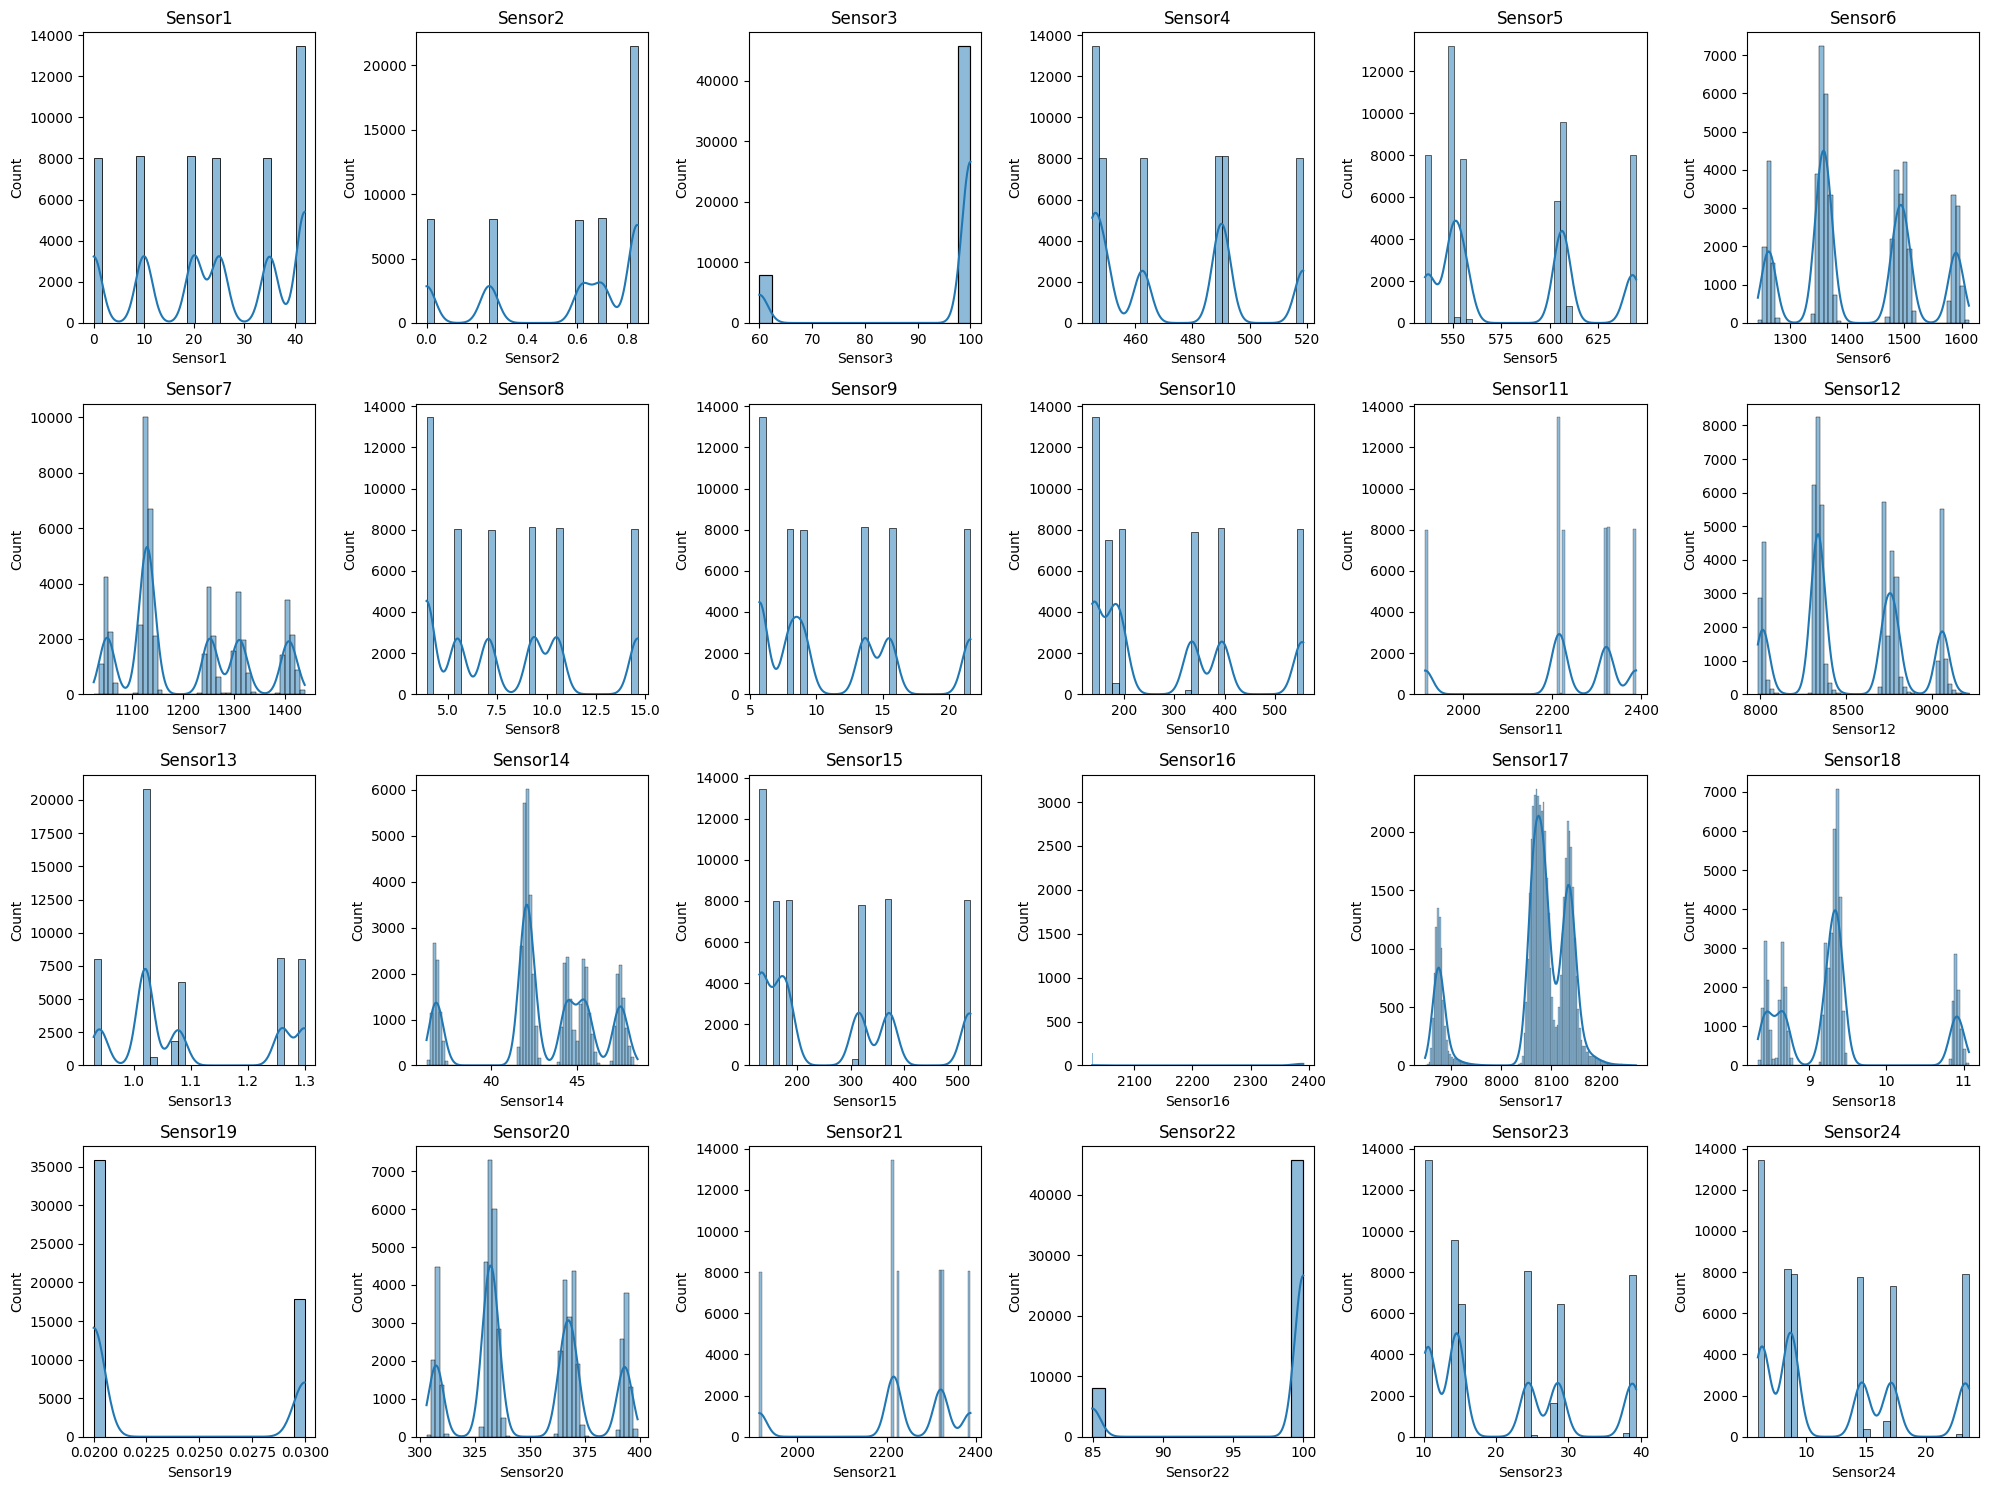

In [10]:
# Histograms for sensors
plt.figure(figsize=(20, 15))
for i, col in enumerate(data.columns[2:-1]):
    plt.subplot(4, 6, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

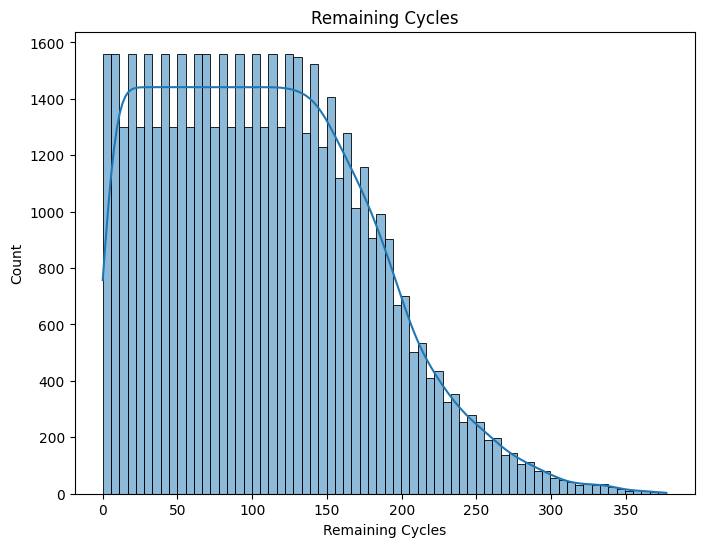

In [11]:
# Histogram for Remainig Cycles
plt.figure(figsize=(8, 6))
sns.histplot(data['Remaining Cycles'], kde=True)
plt.title('Remaining Cycles')
plt.show()

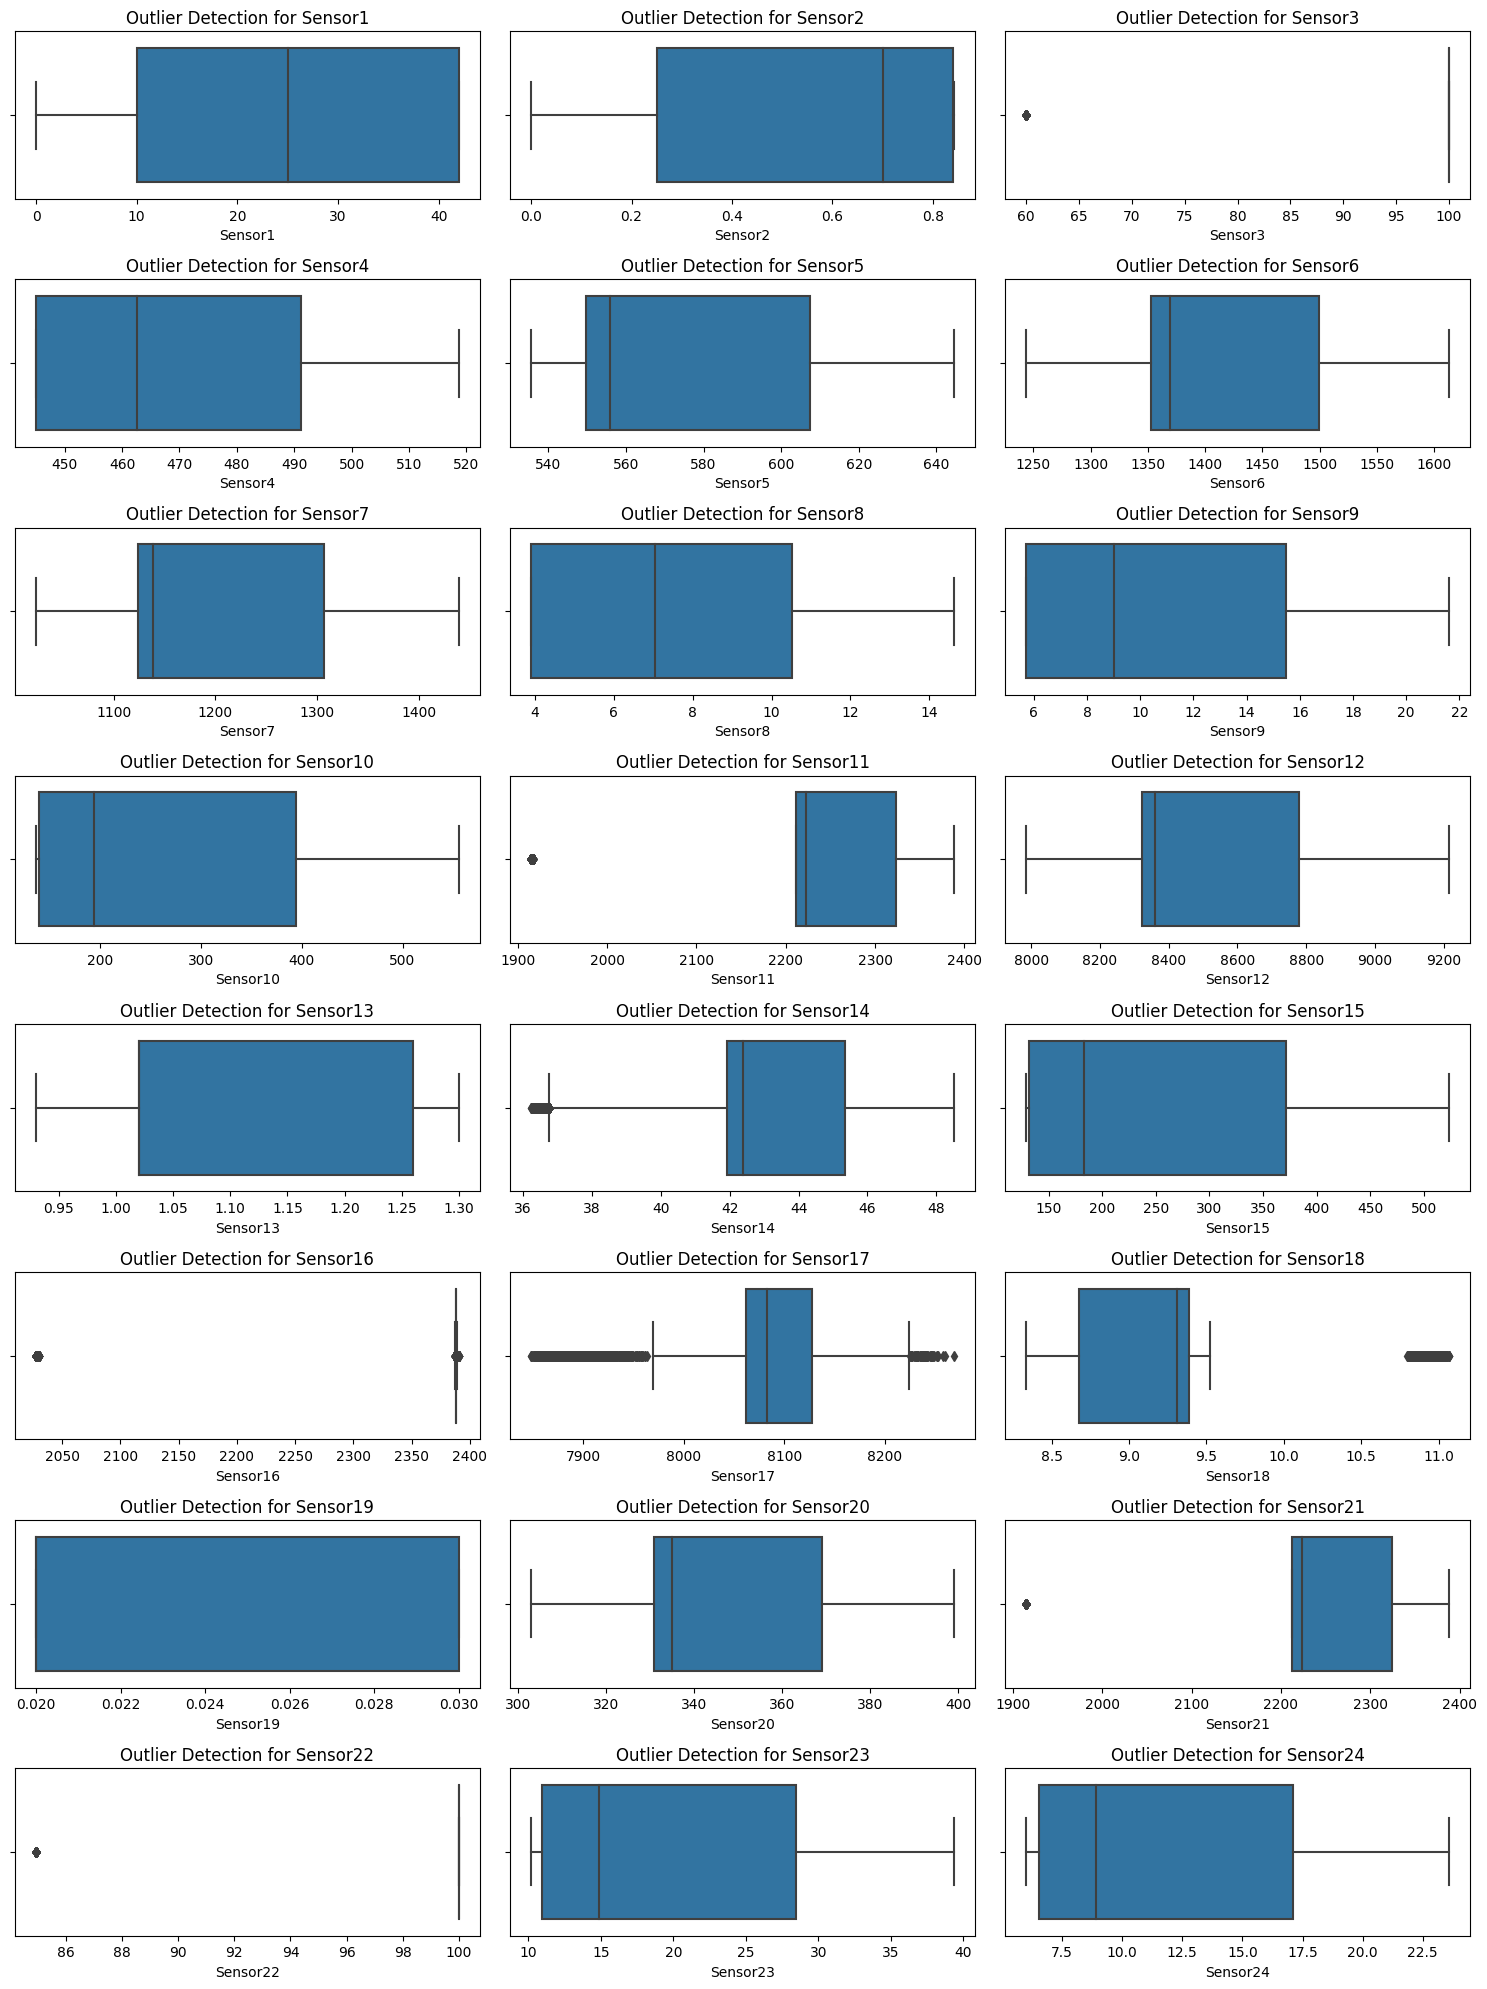

In [17]:
# Boxplots for sensors
fig, axs = plt.subplots(8, 3, figsize=(15, 20))
axs = axs.ravel()
for i, col in enumerate(data.columns[2:-1]):
    sns.boxplot(data=data, x=col, ax=axs[i])
    axs[i].set_title(f"Outlier Detection for {col}")
plt.tight_layout()
plt.show()

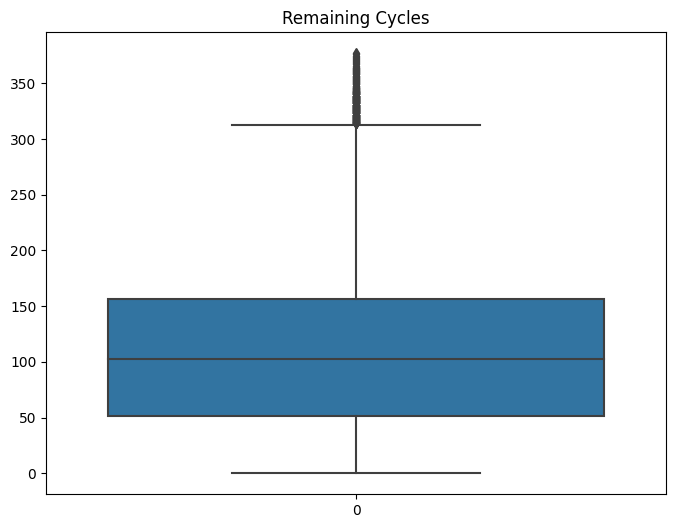

In [18]:
# Boxplot for Remaining Cycles
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['Remaining Cycles'])
plt.title('Remaining Cycles')
plt.show()

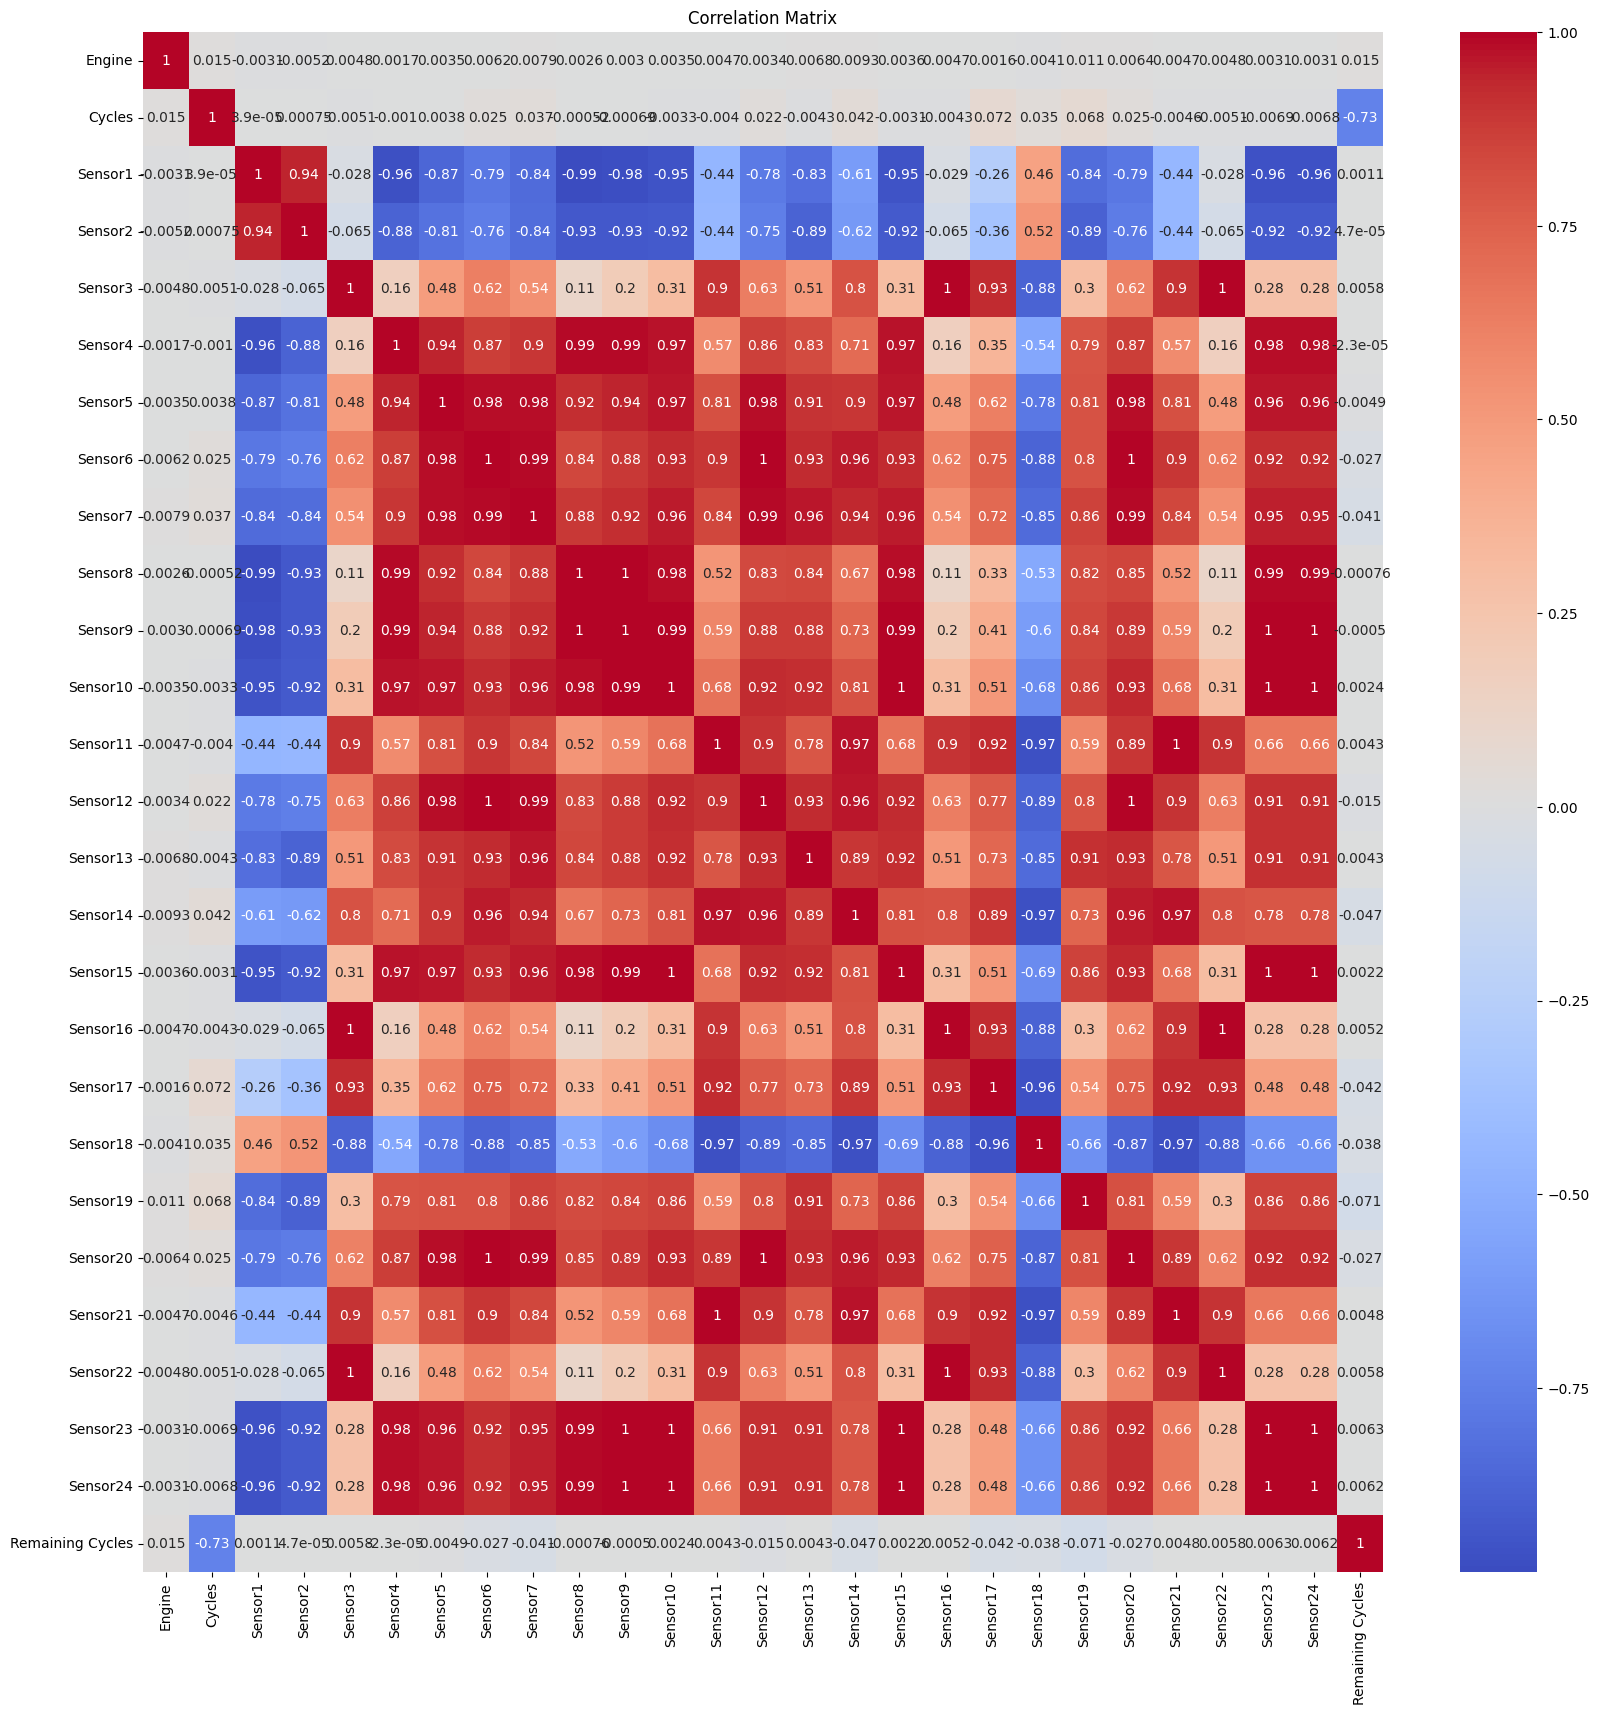

In [19]:
# Correlation matrix
plt.figure(figsize=(20, 20))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig('Correlation matrix.png')
plt.show()

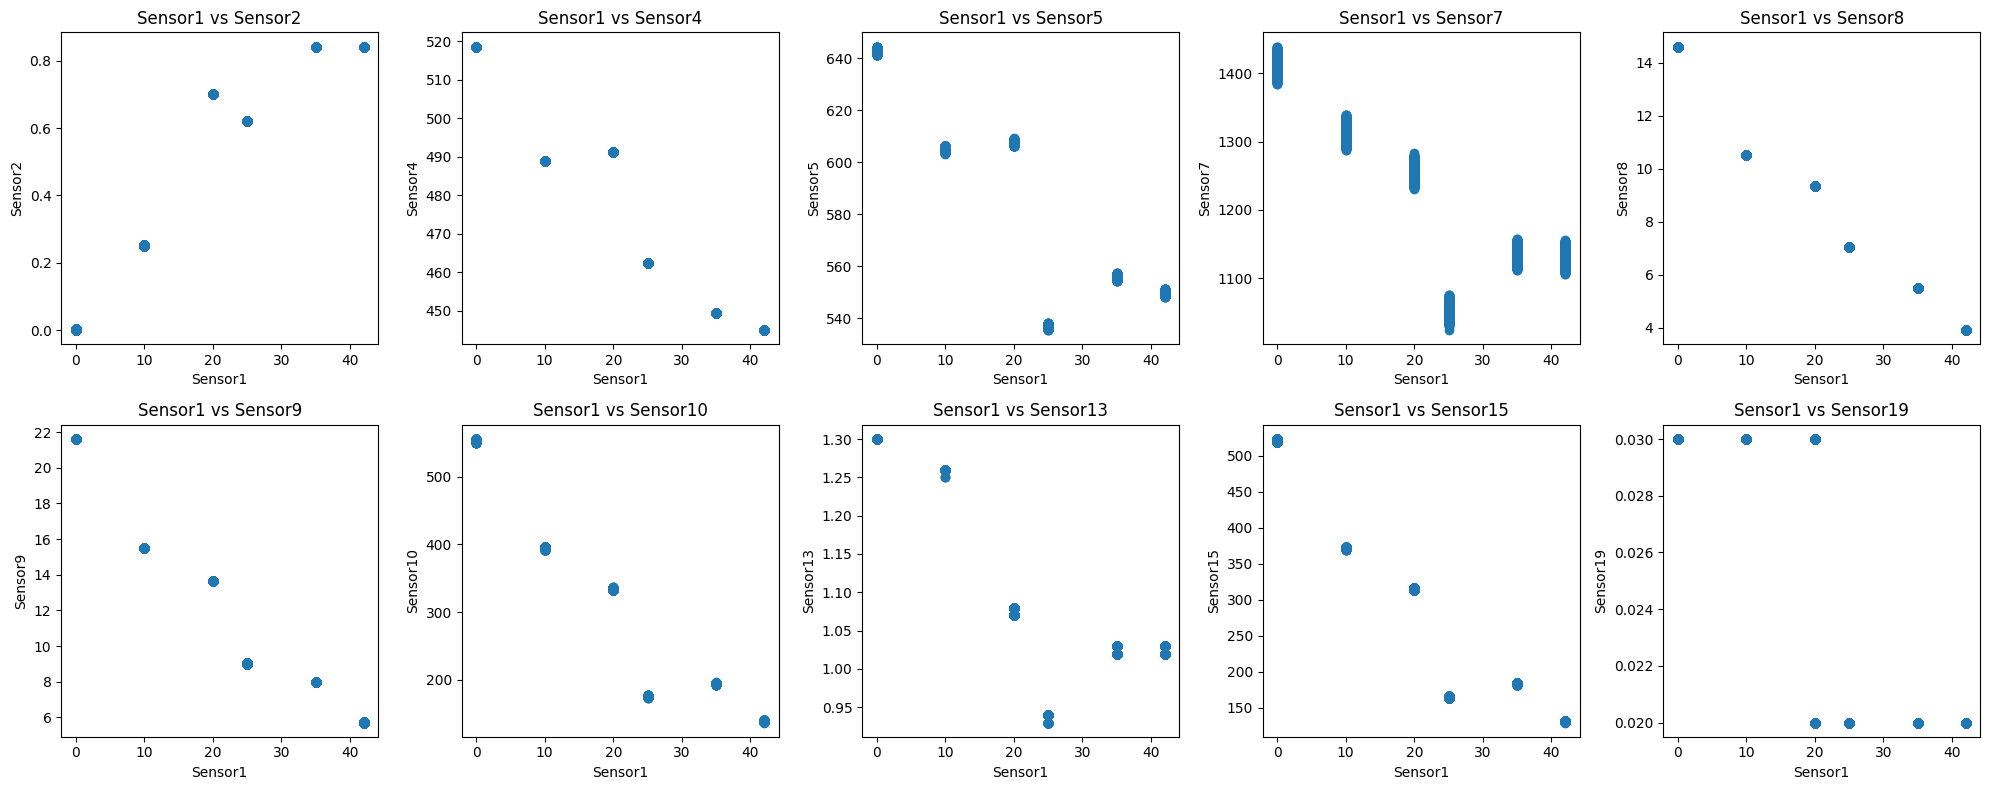

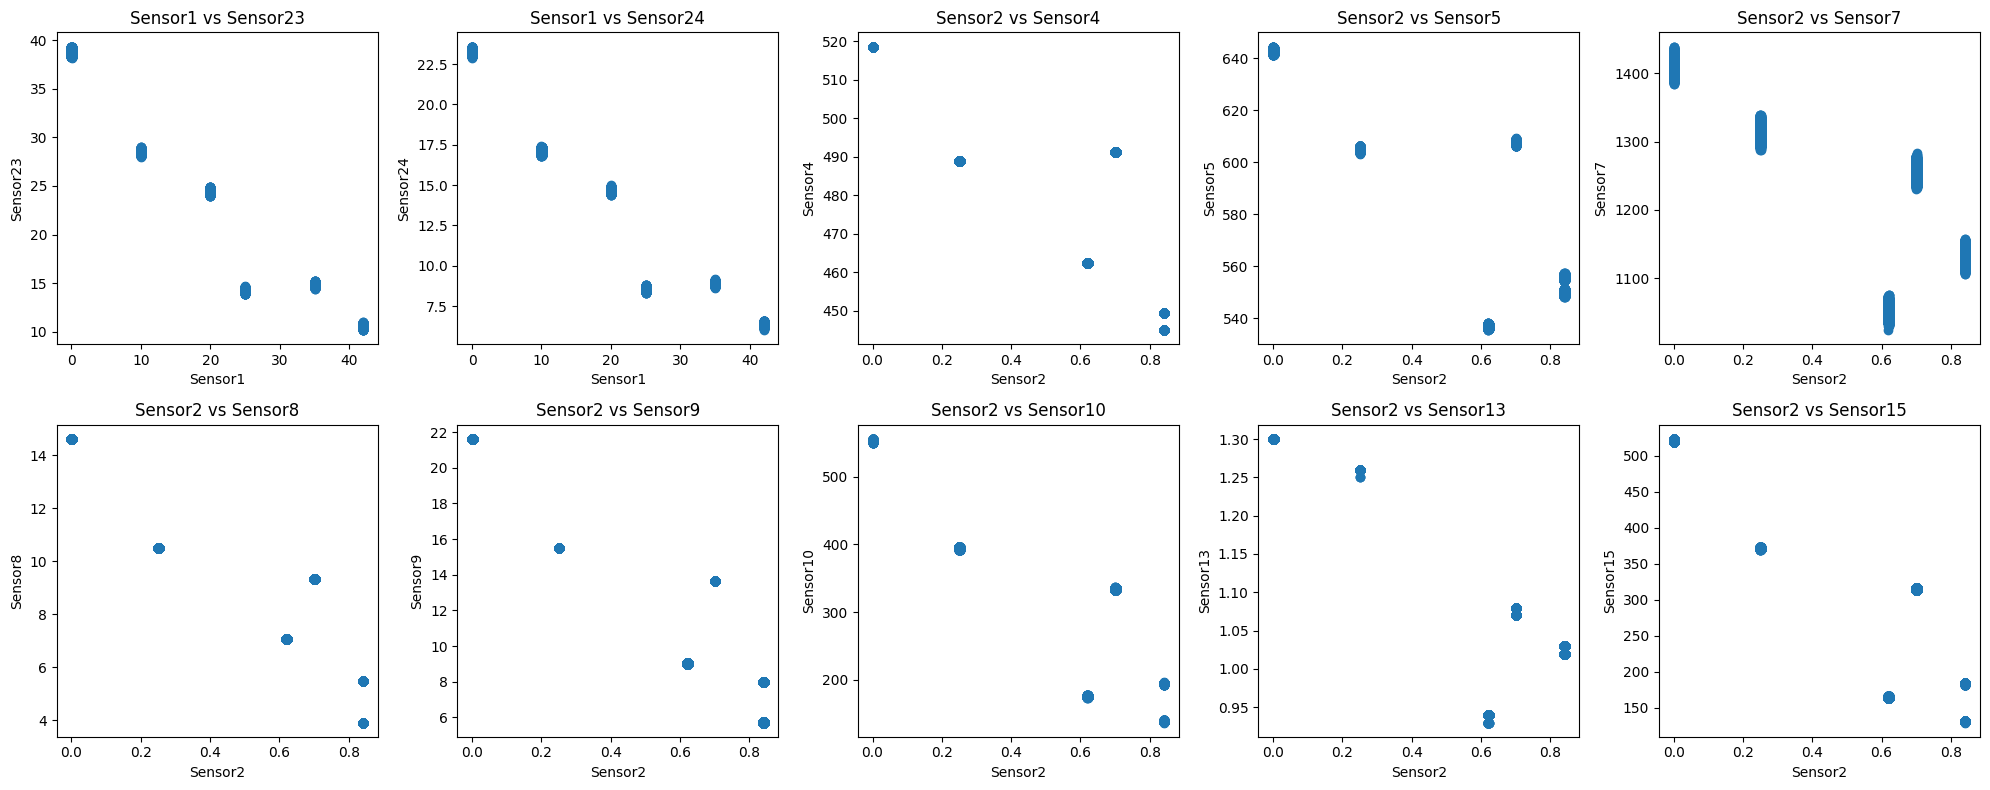

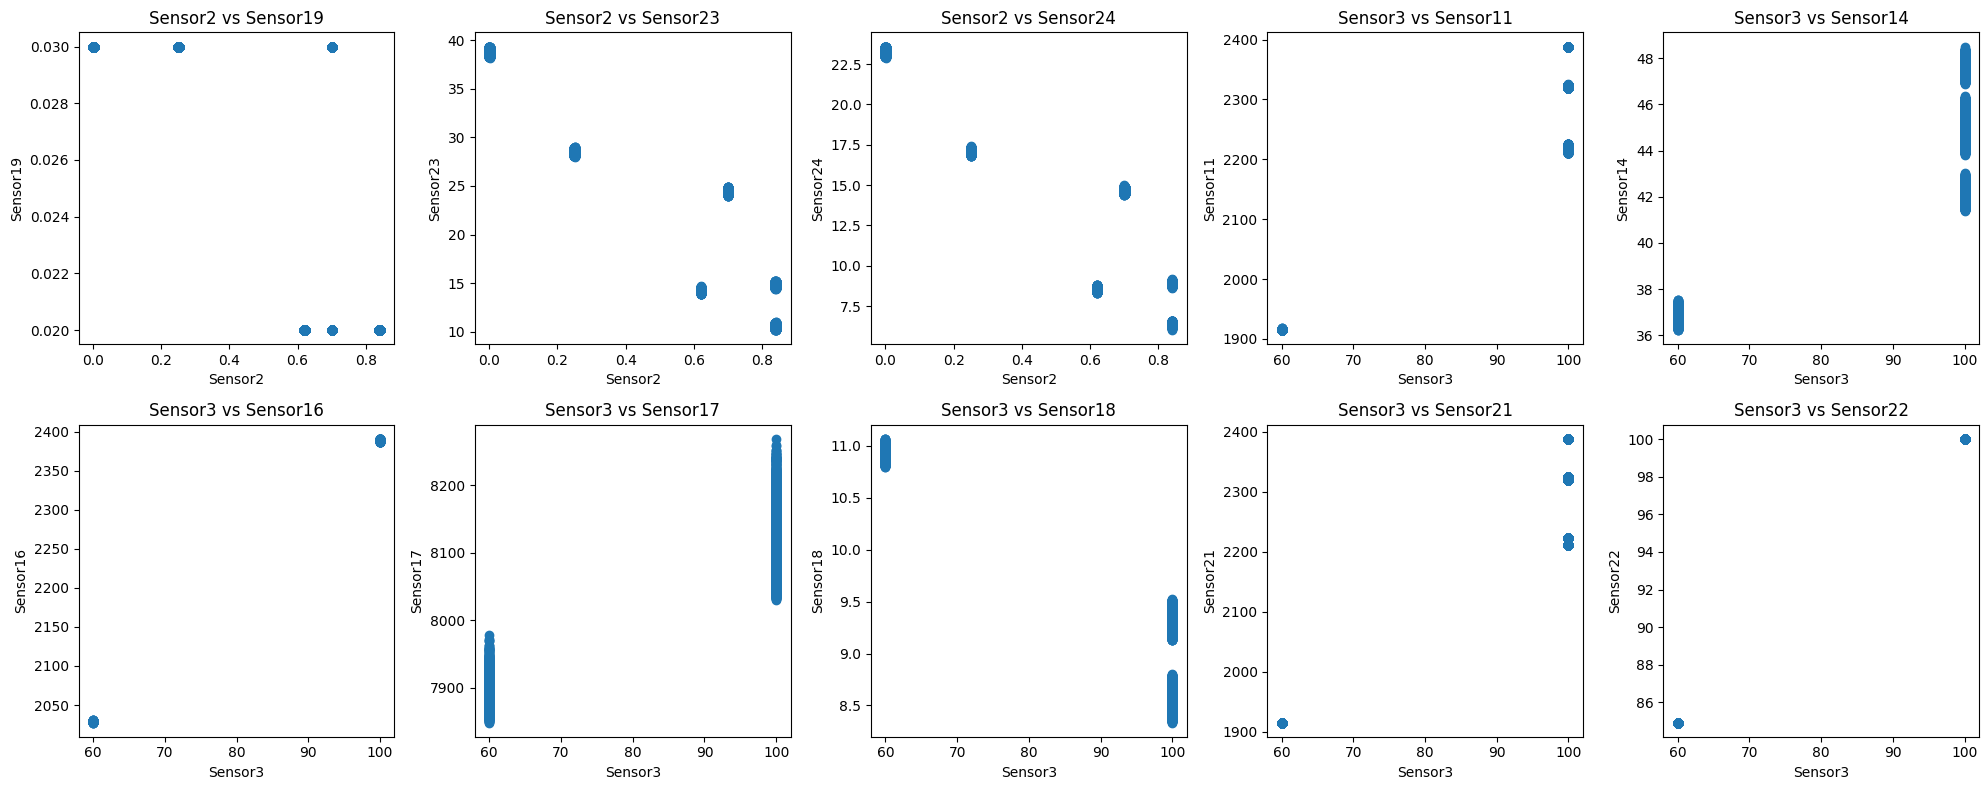

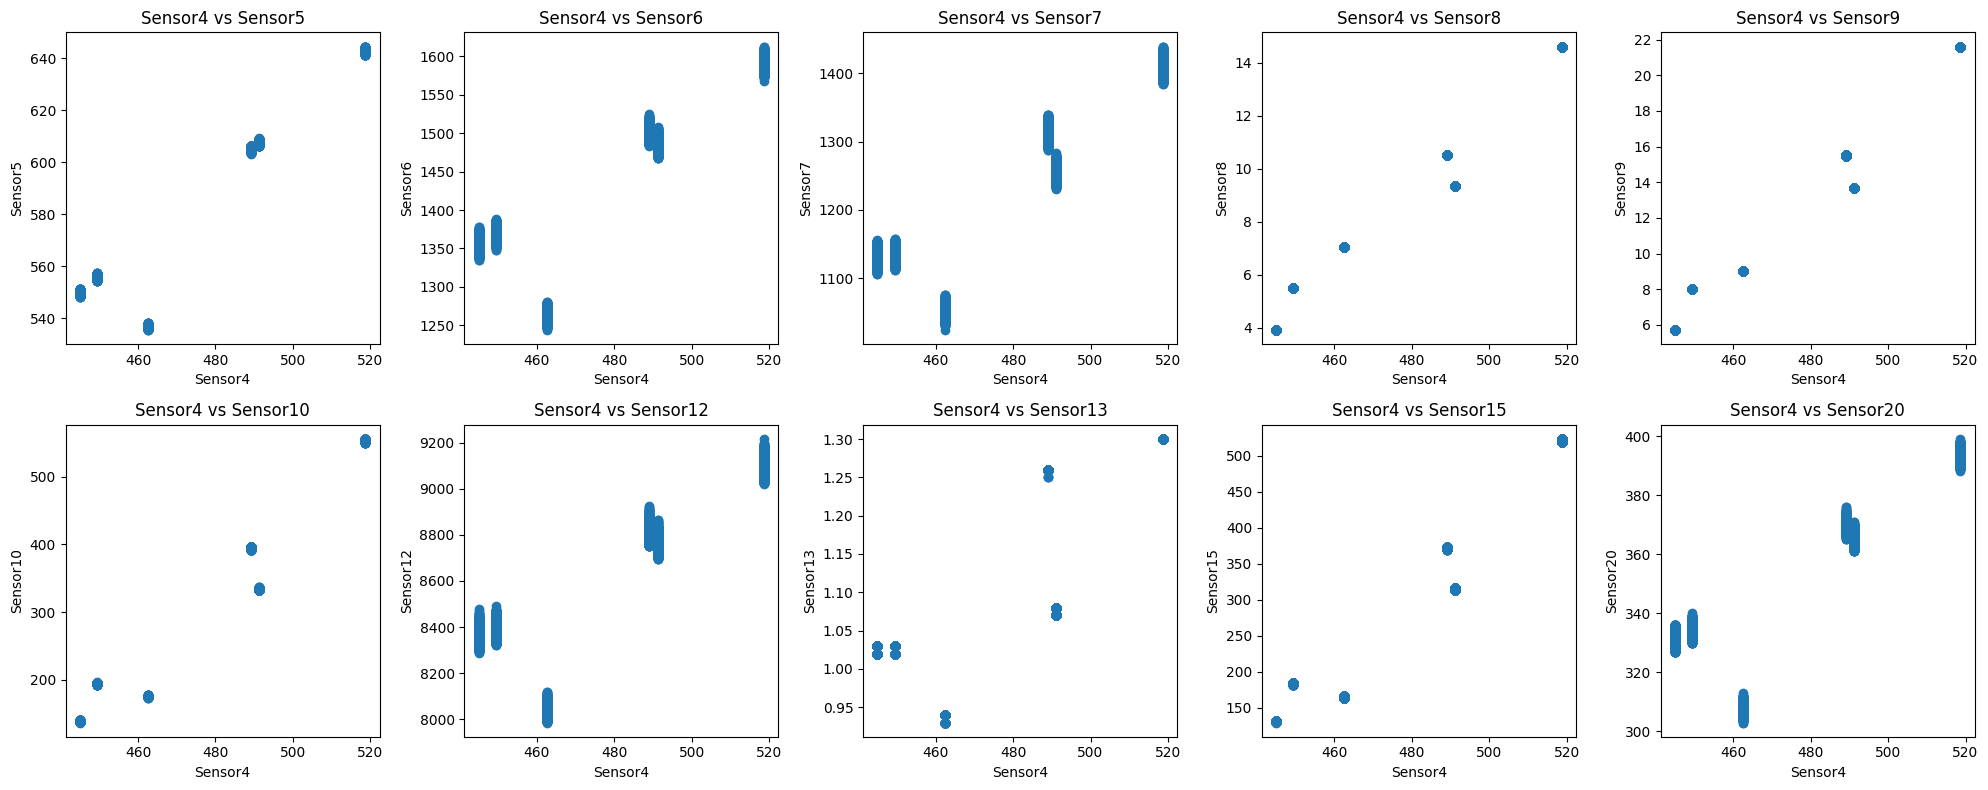

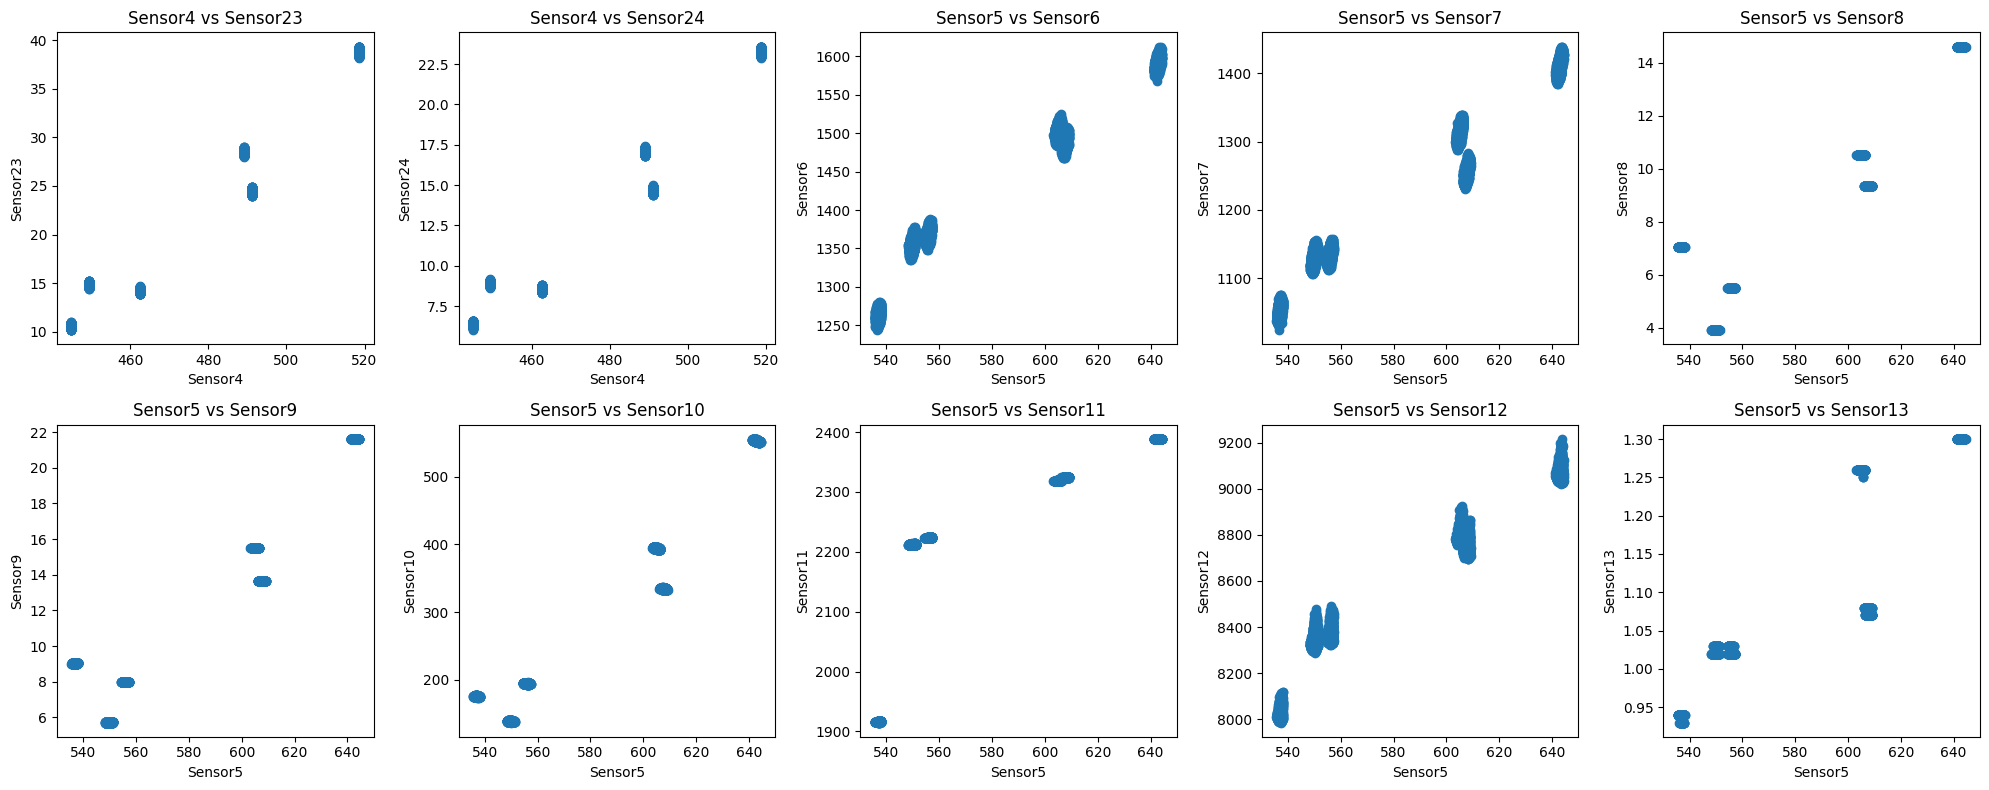

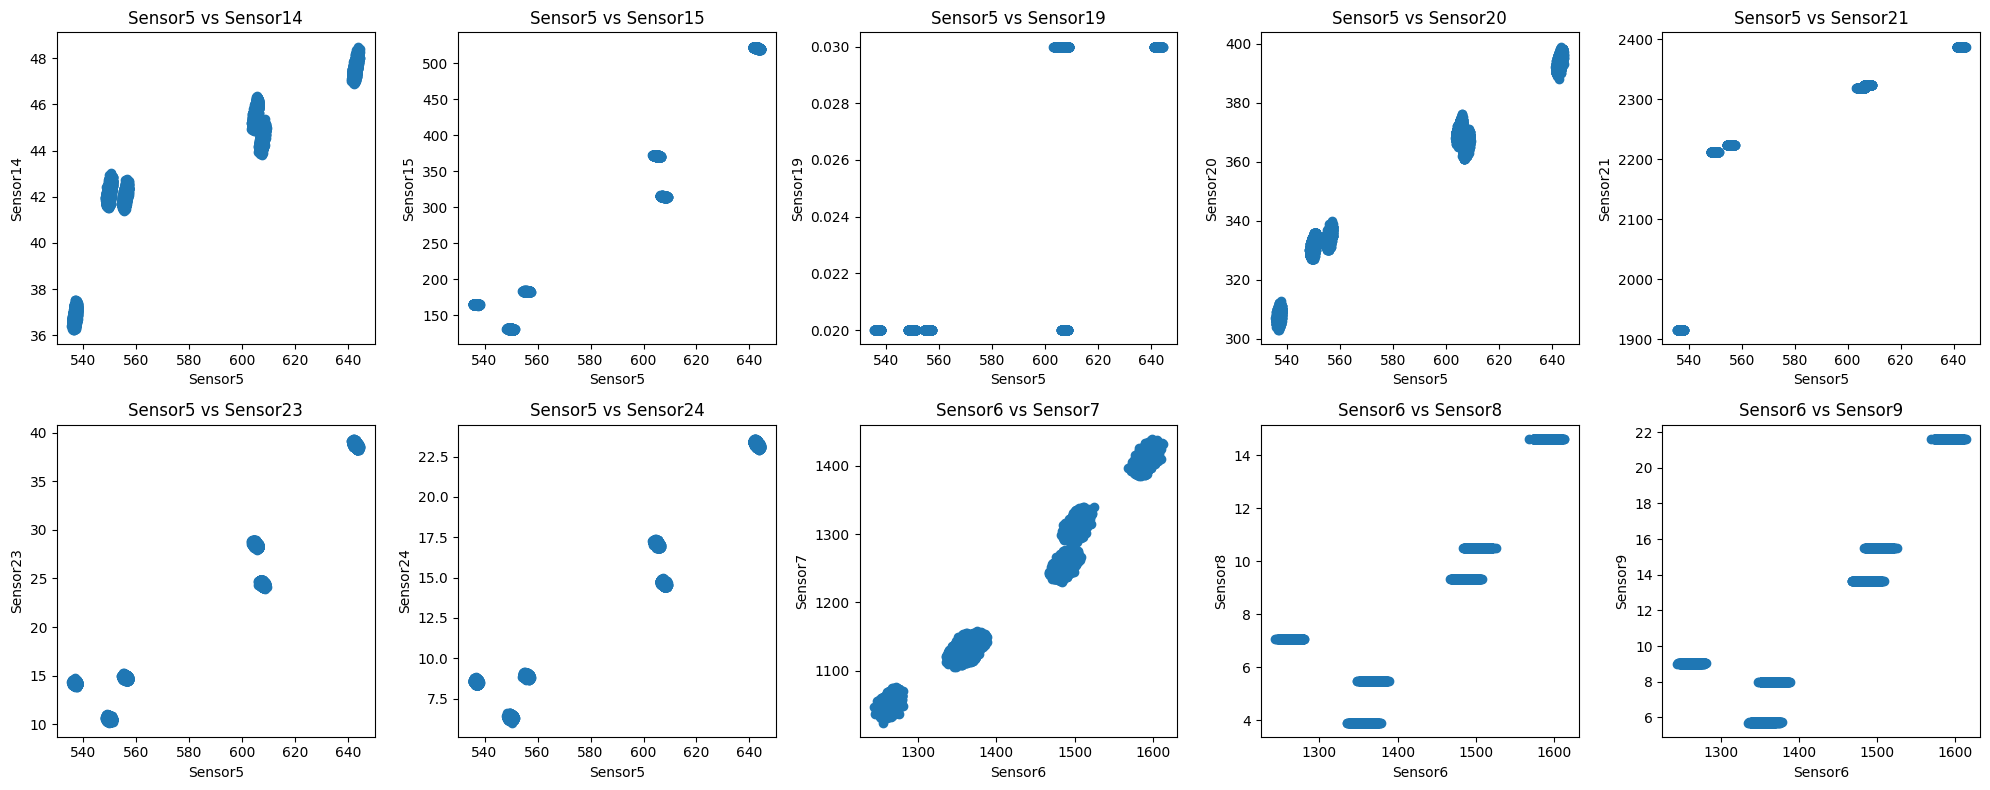

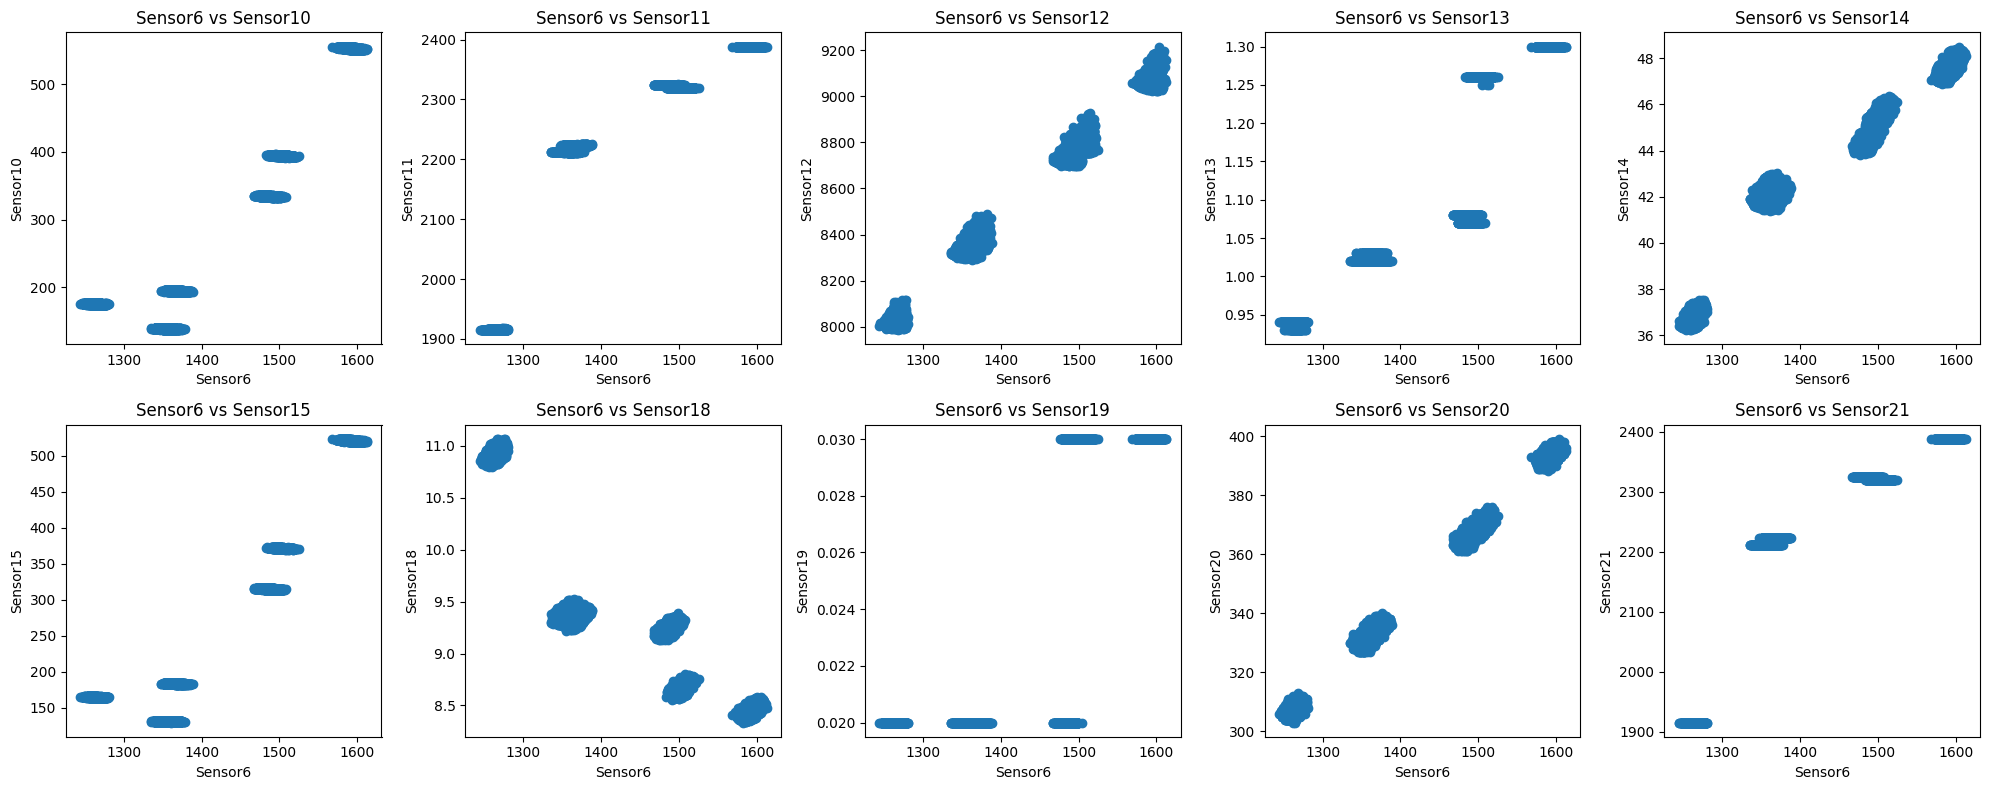

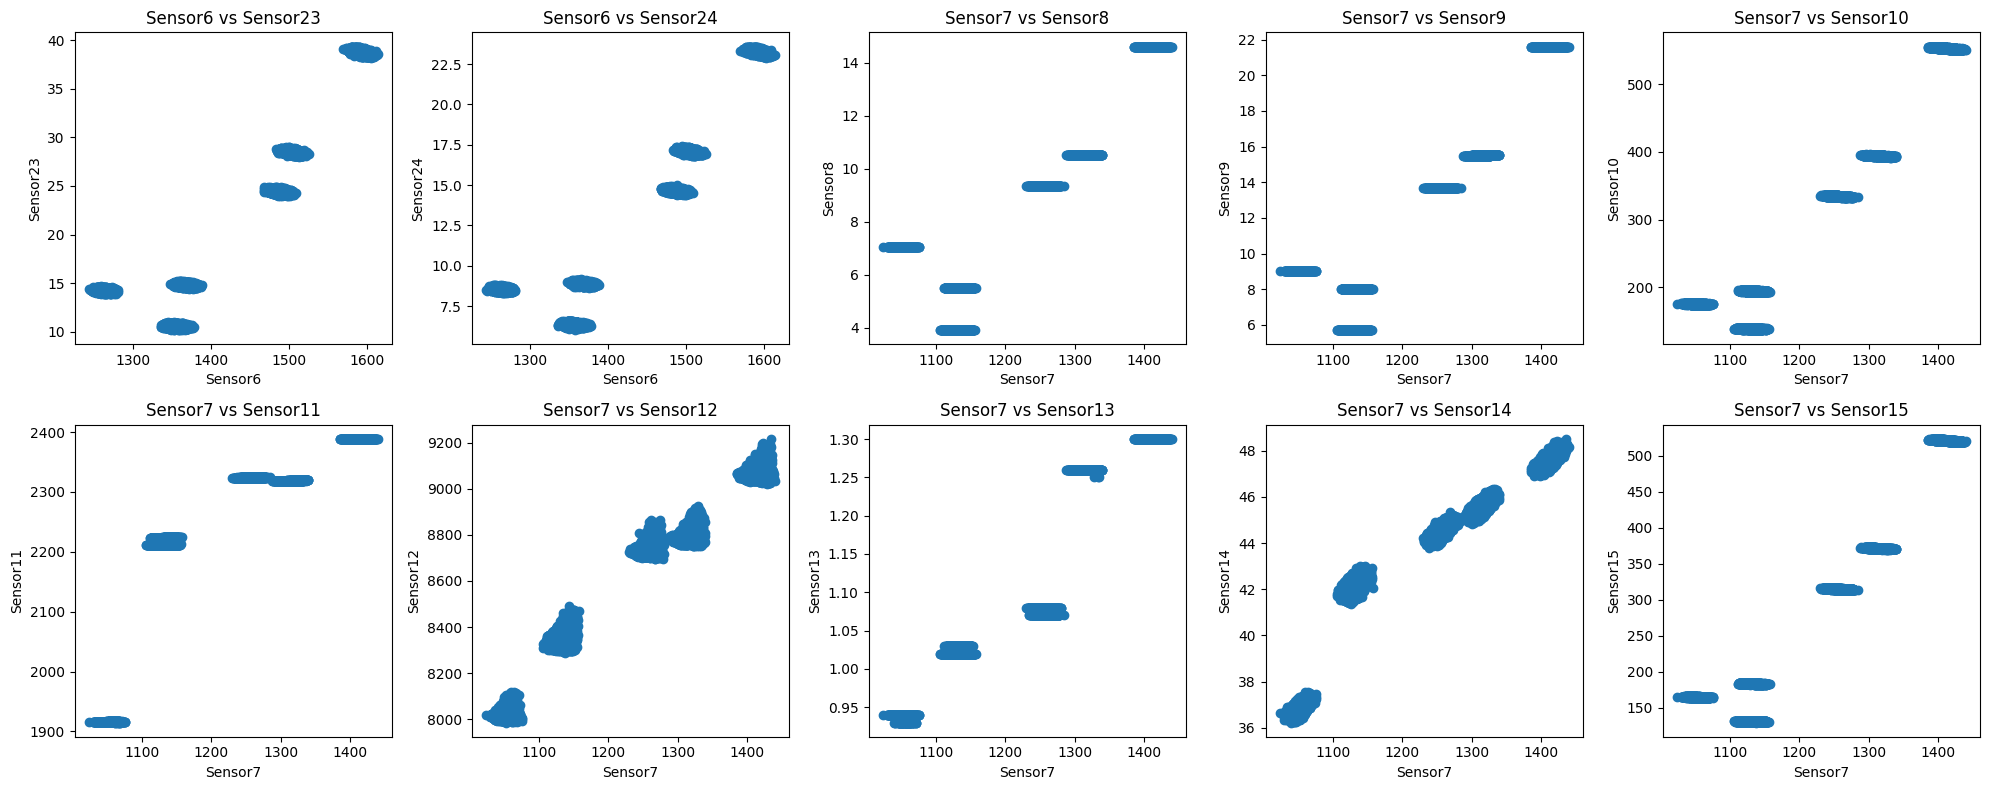

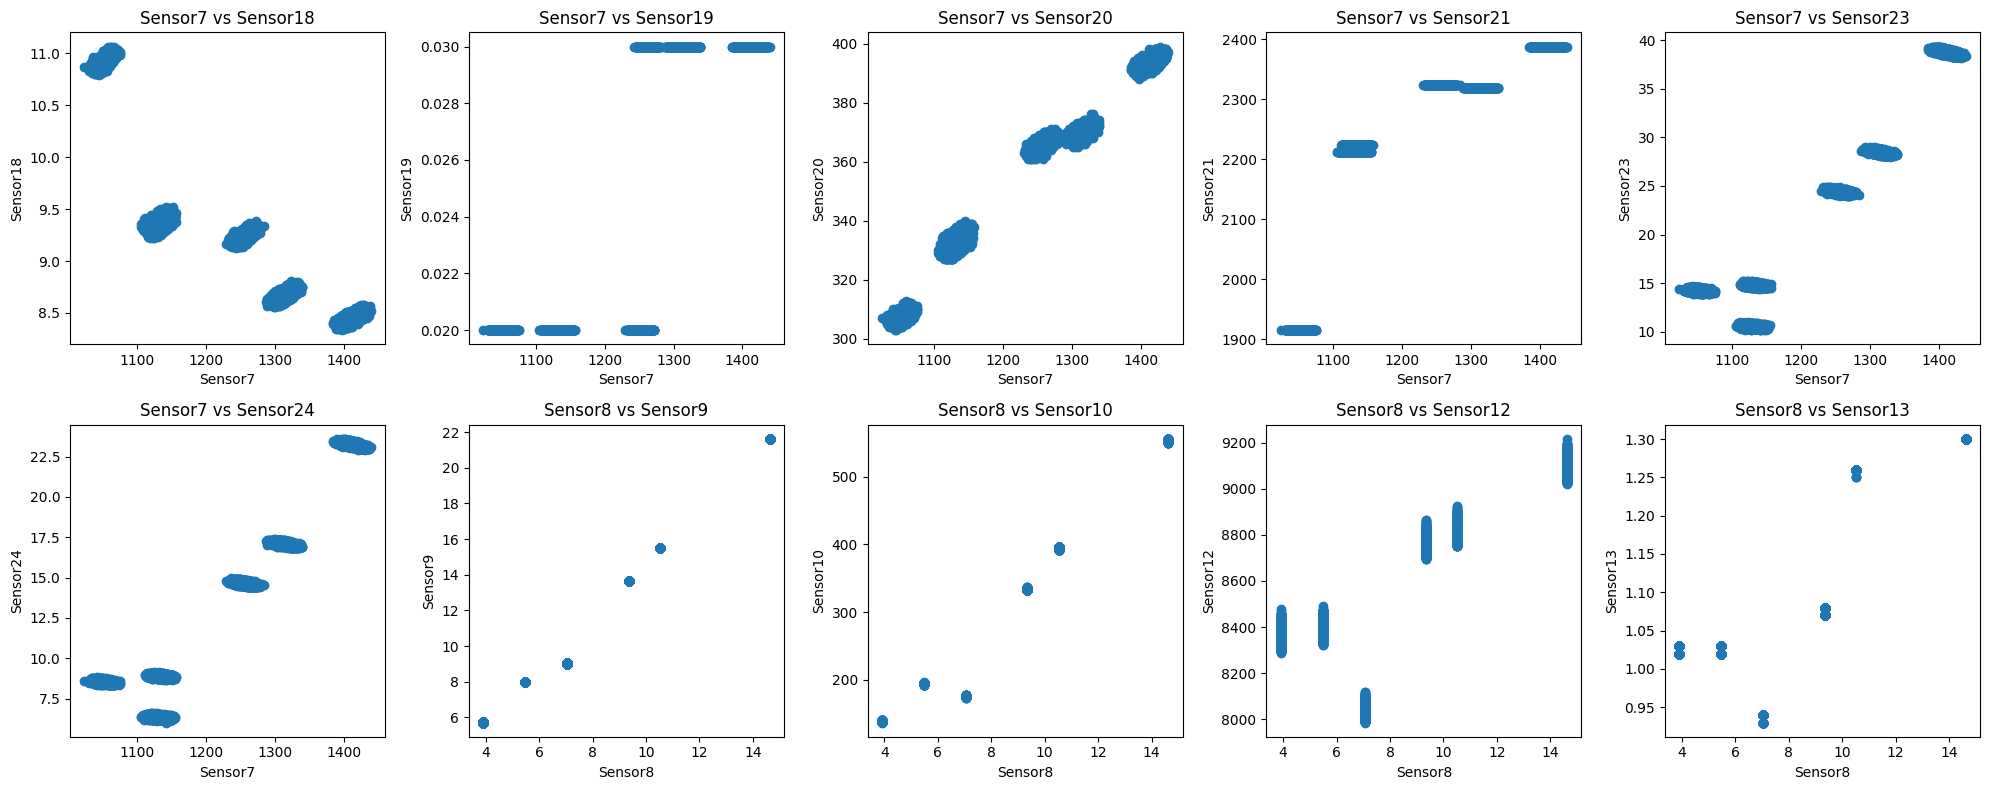

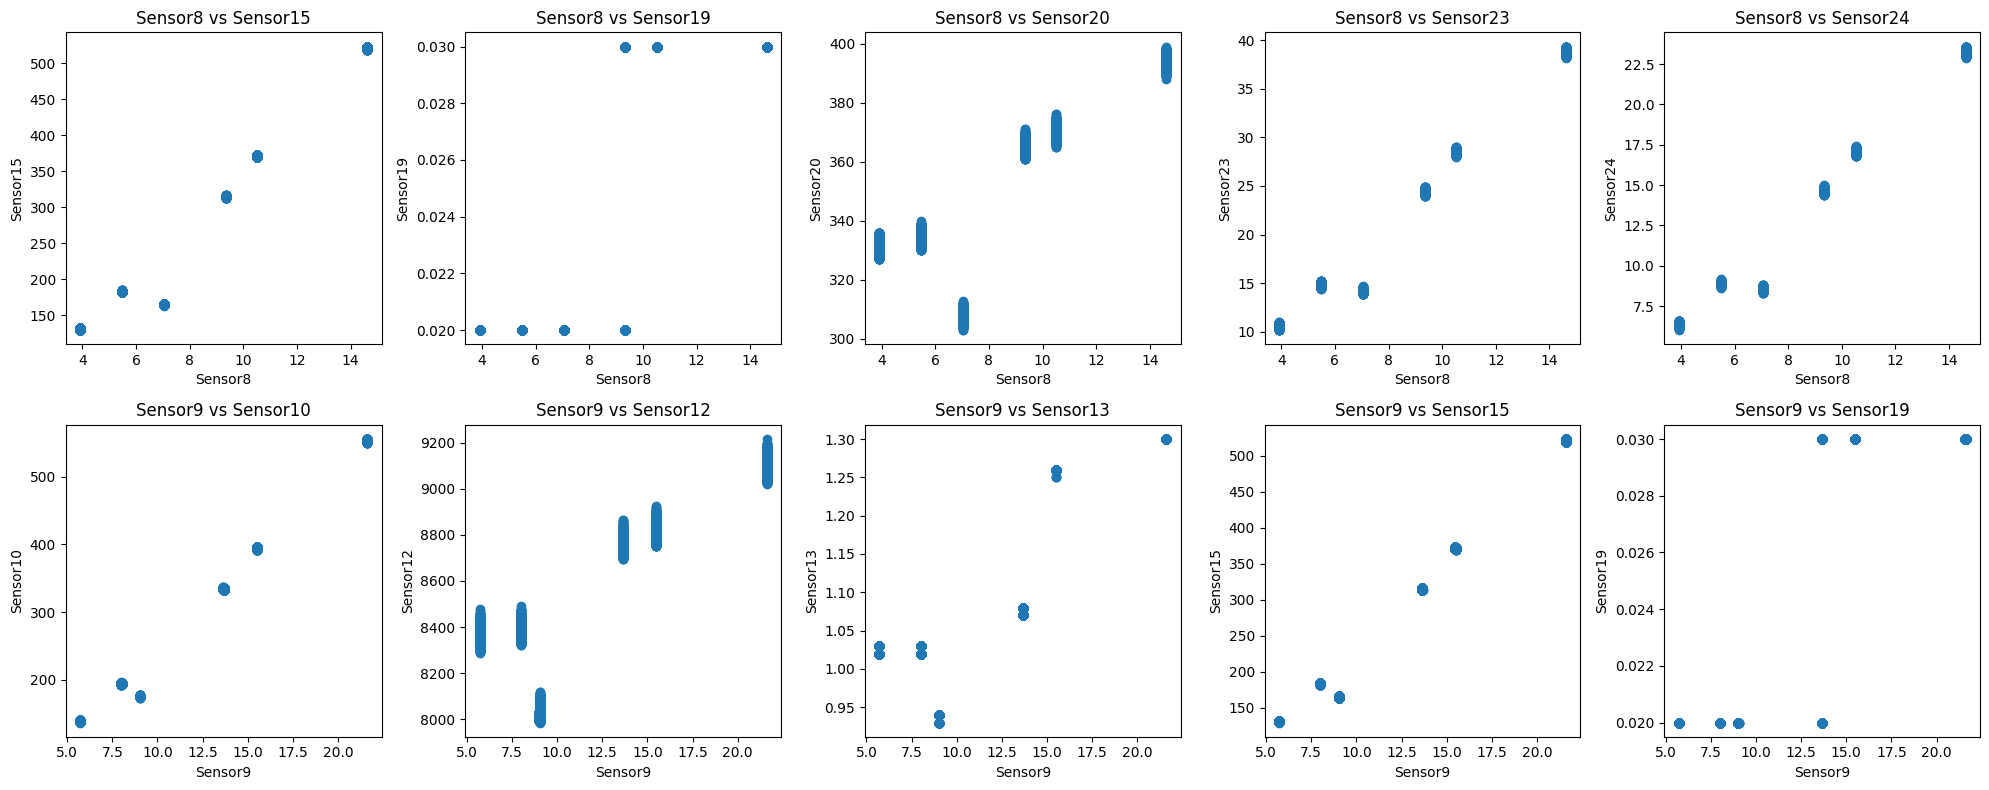

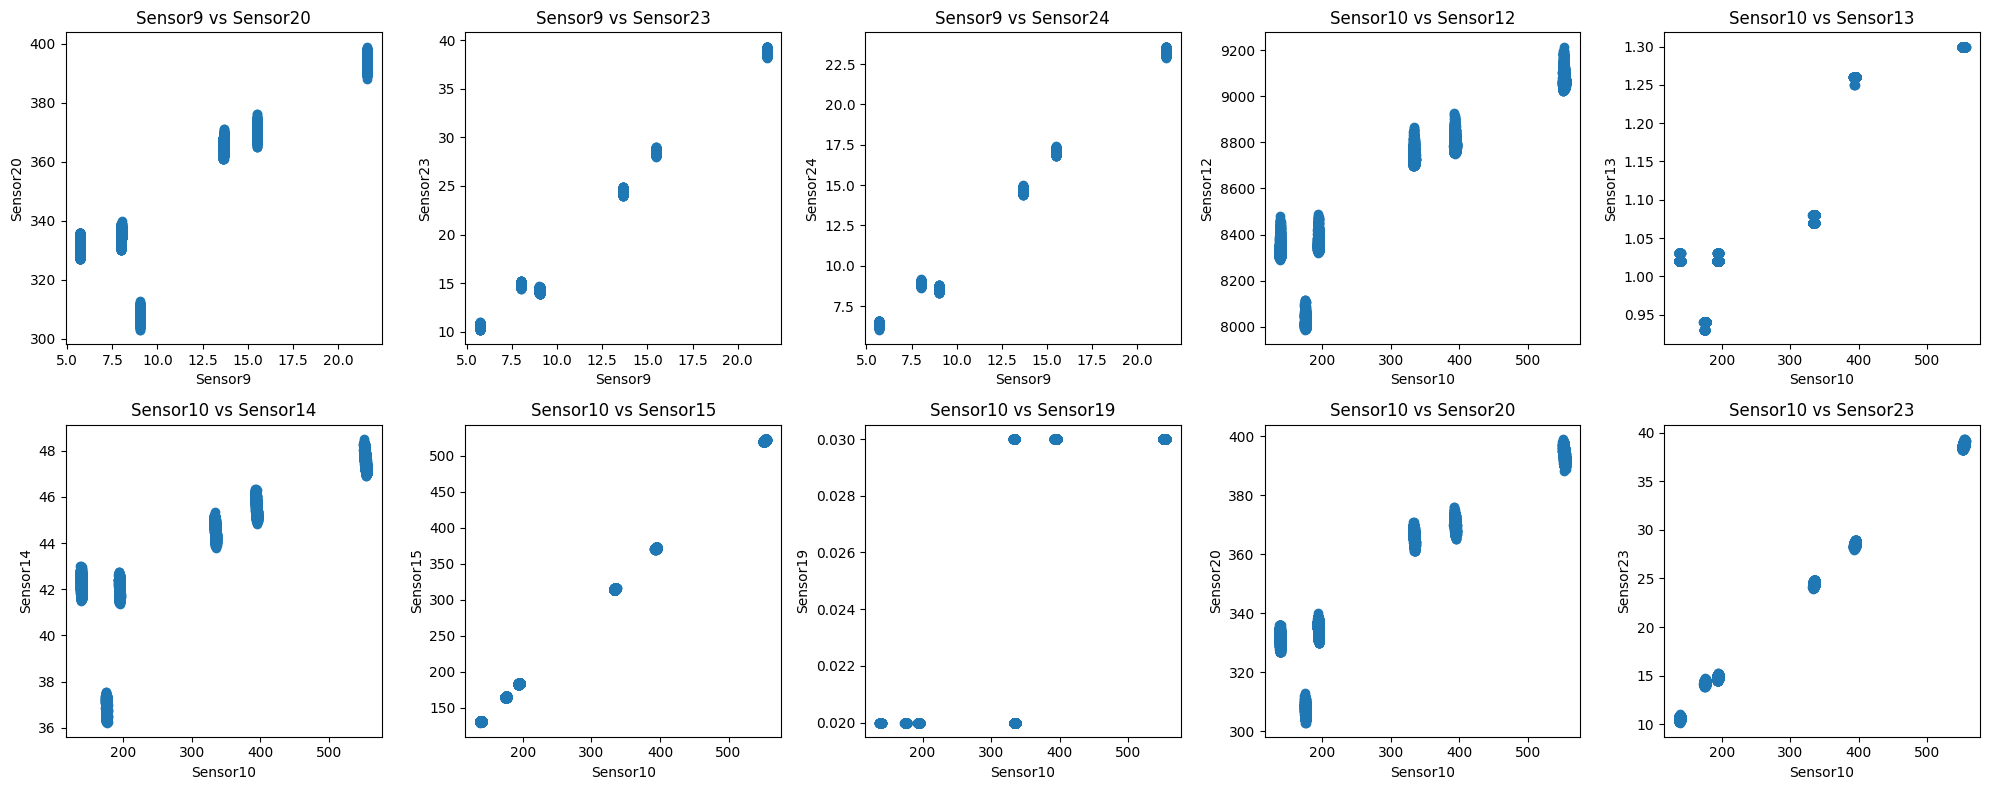

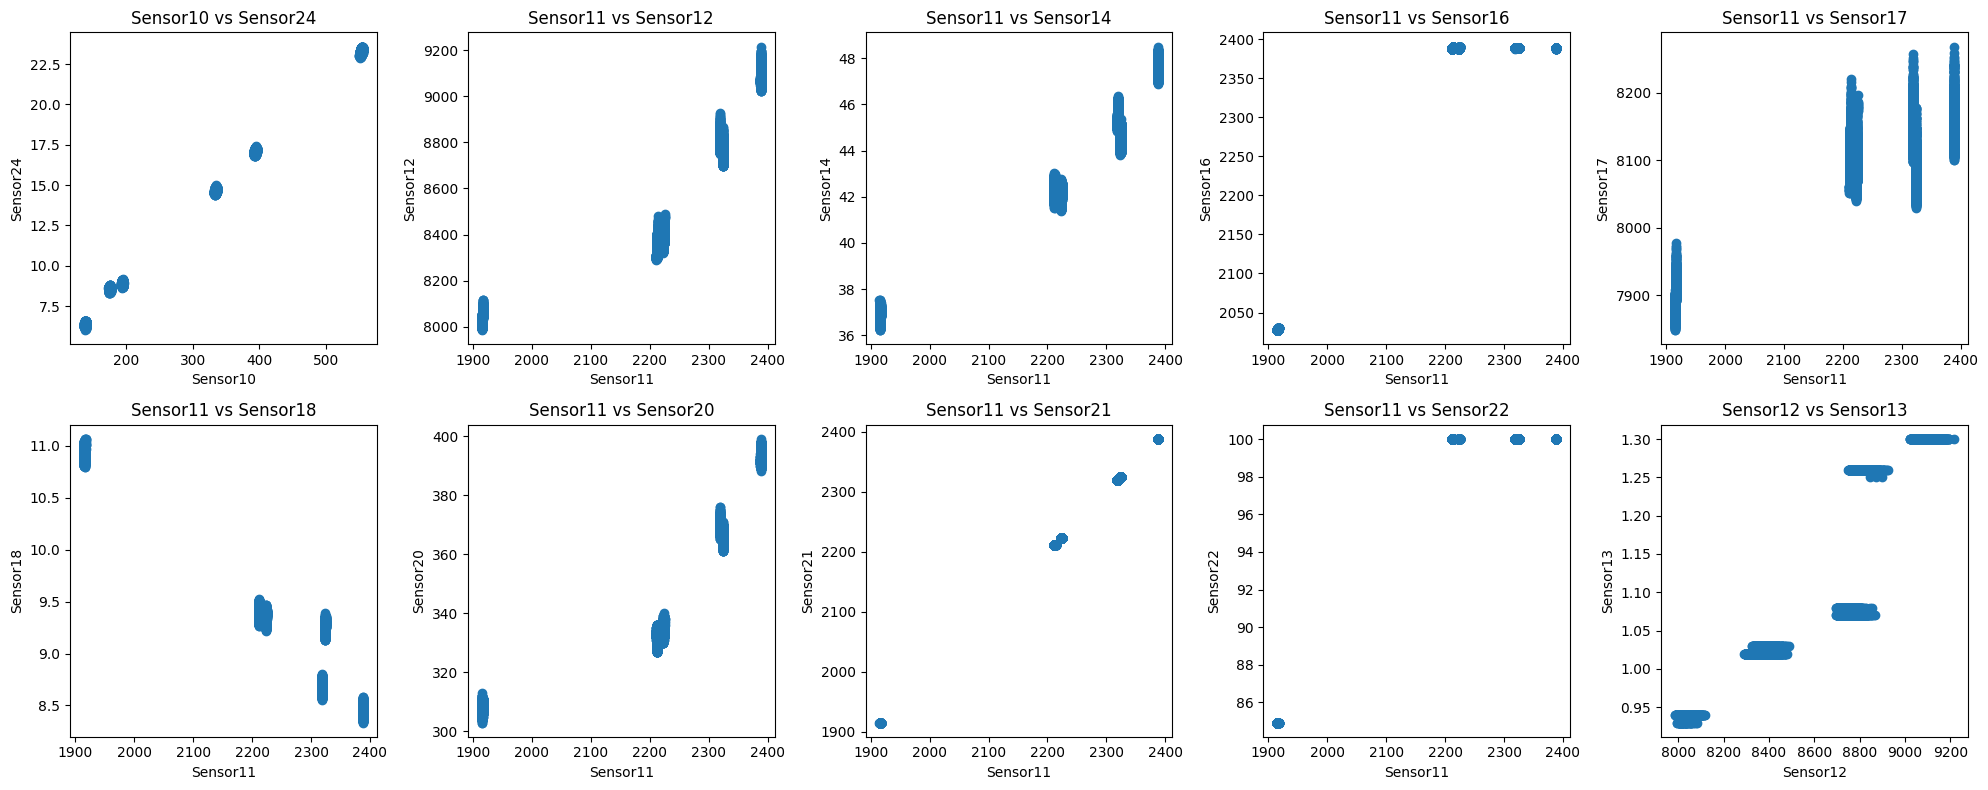

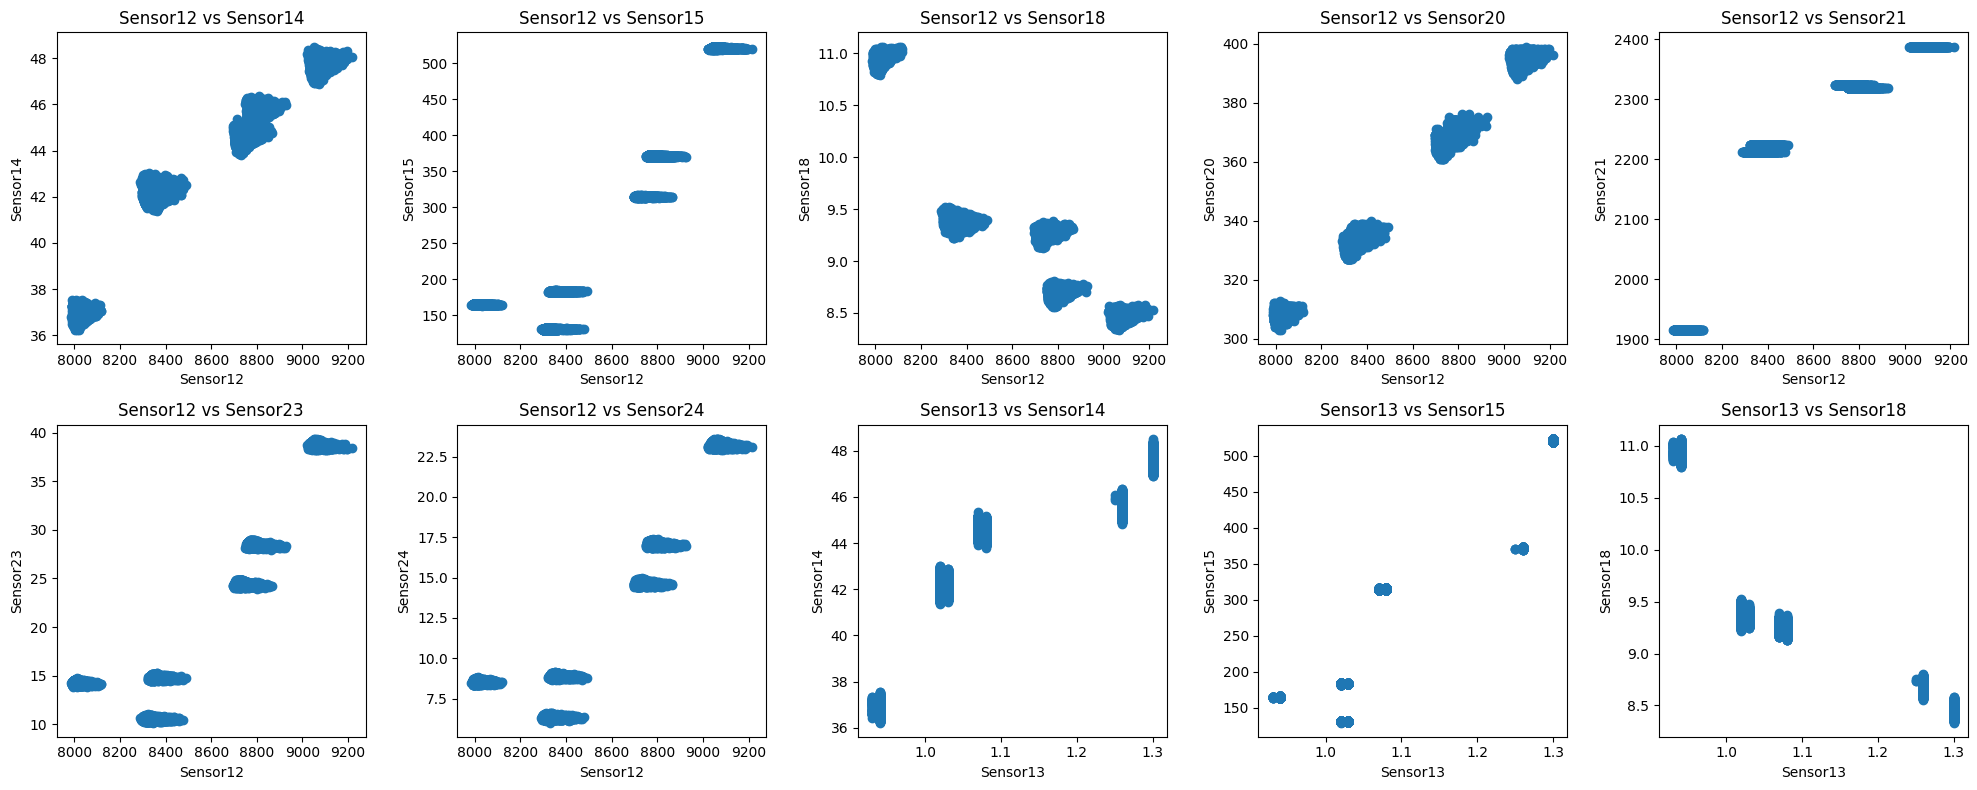

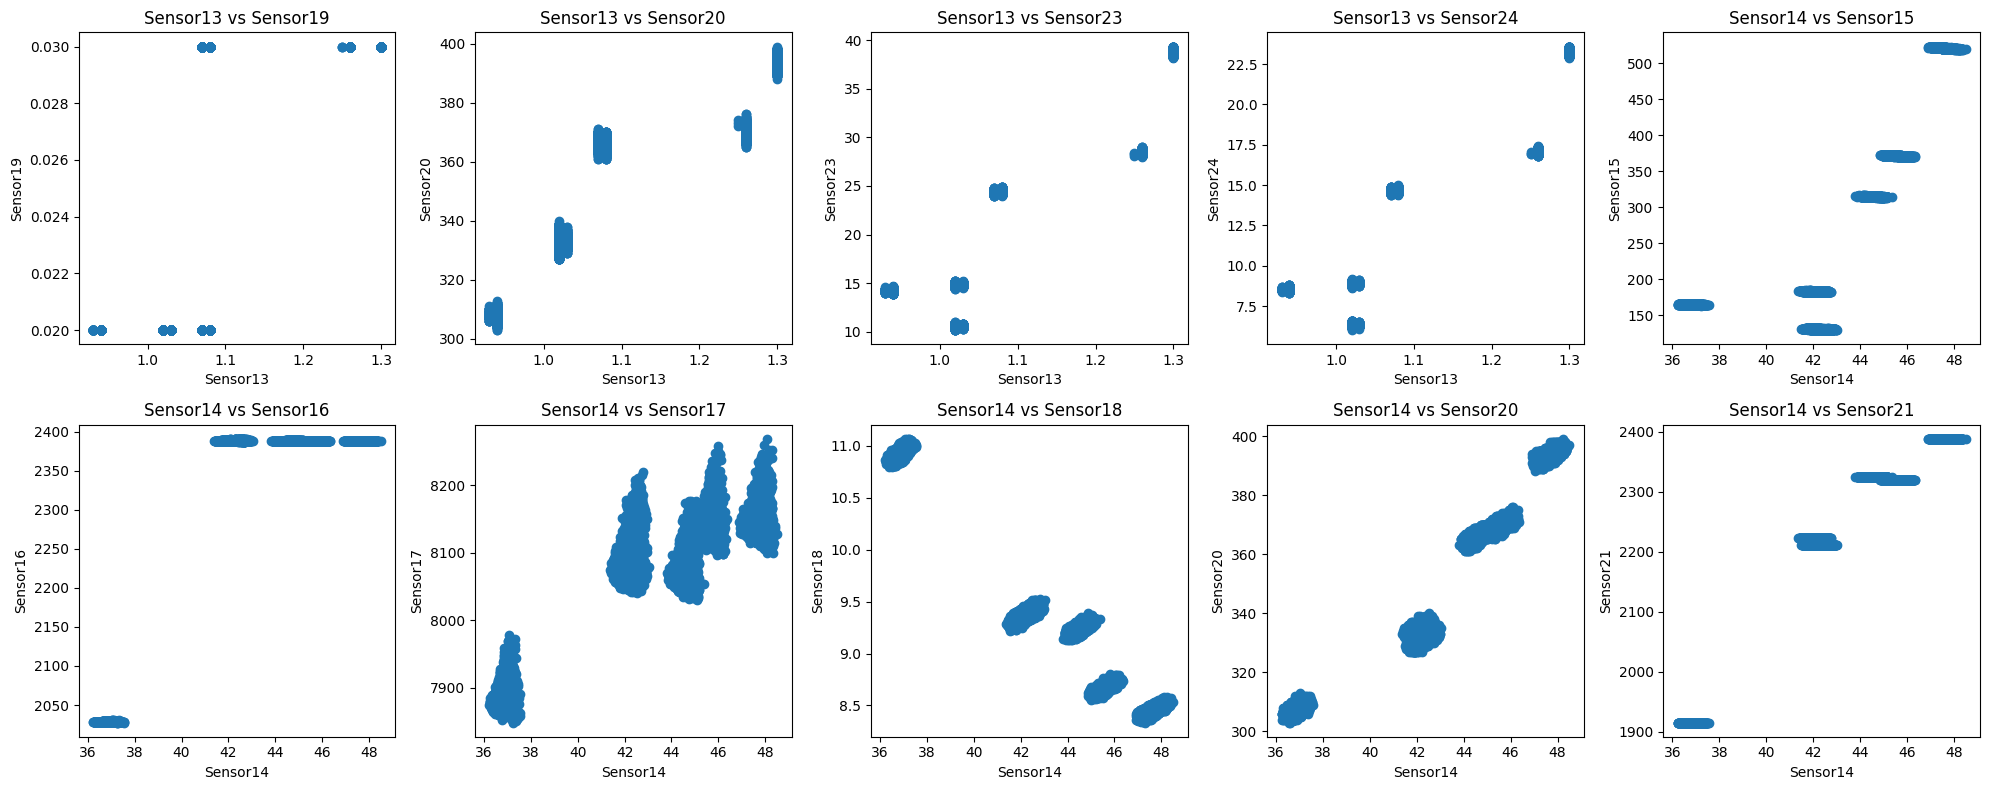

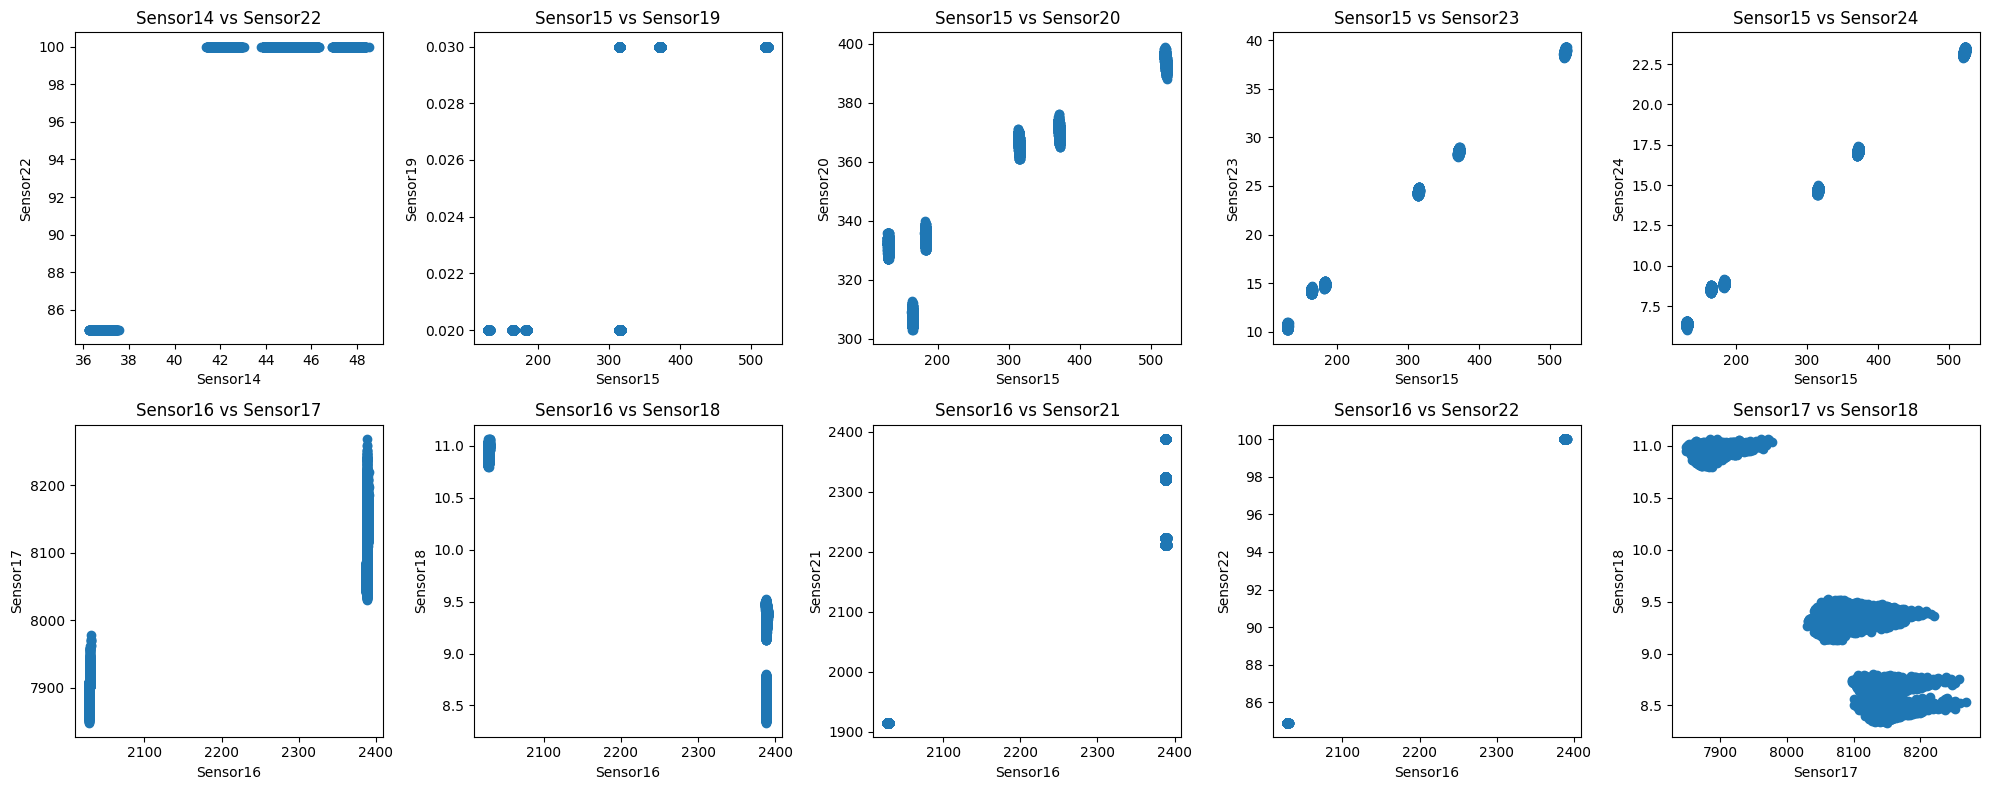

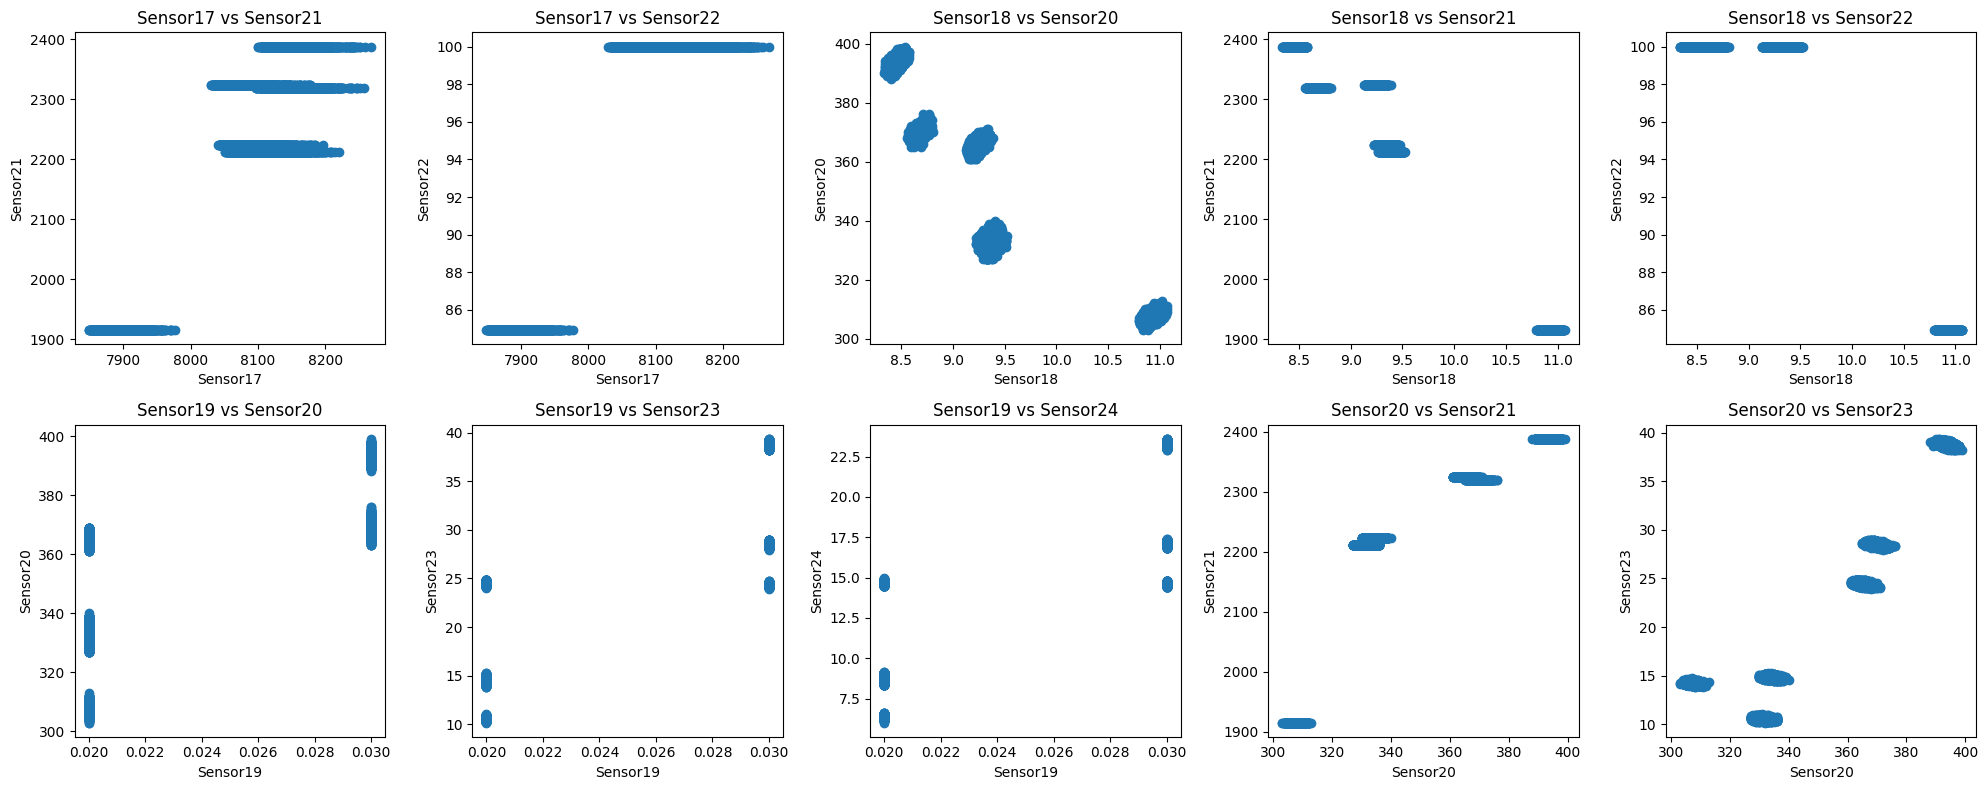

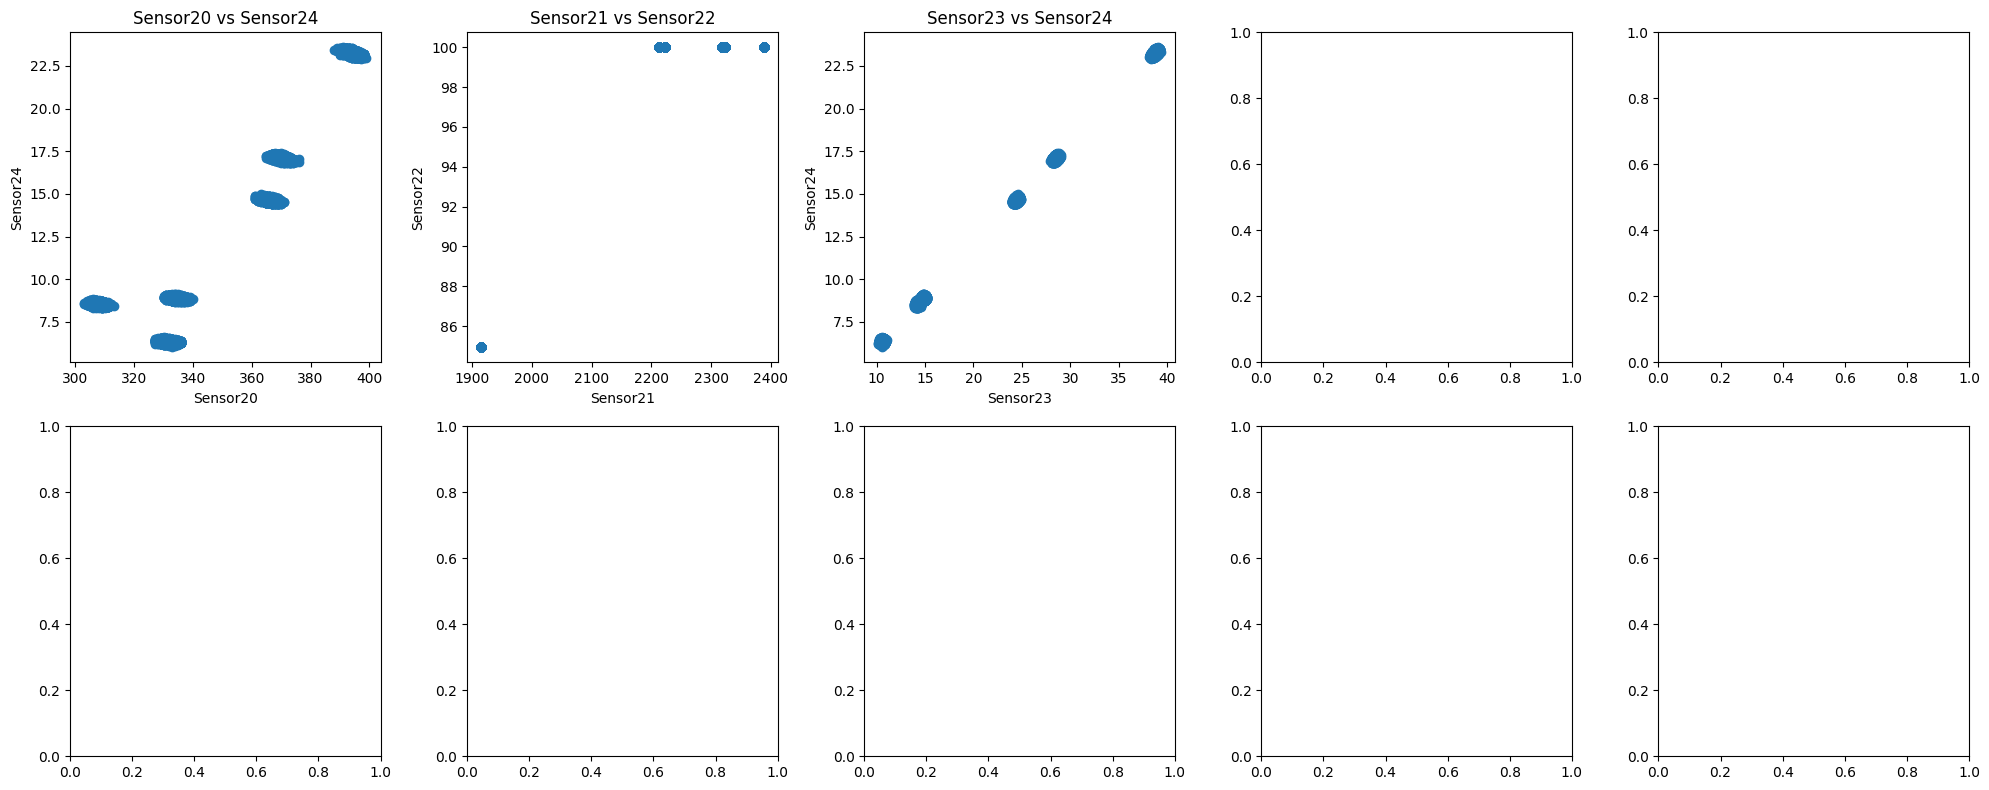

In [20]:
# Scatter plots for bivariate analysis based on Correlation Matrix Value.
corr_matrix = data.corr()
threshold = 0.8
sensors = data.columns[2:-1]  

# Pairs with correlation above threshold
pairs = [(sensor, other_sensor) for sensor in sensors for other_sensor in sensors if sensor != other_sensor and abs(corr_matrix.loc[sensor, other_sensor]) > threshold]

selected_pairs = []
for pair in pairs:
    if pair[::-1] not in selected_pairs:
        selected_pairs.append(pair)

# Scatter plots for sensor pairs
for j in range(0, len(selected_pairs), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, (sensor, other_sensor) in enumerate(selected_pairs[j:j+10]):
        axs[i].scatter(data[sensor], data[other_sensor])
        axs[i].set_title(f'{sensor} vs {other_sensor}')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel(other_sensor)
    plt.tight_layout()
    plt.show()

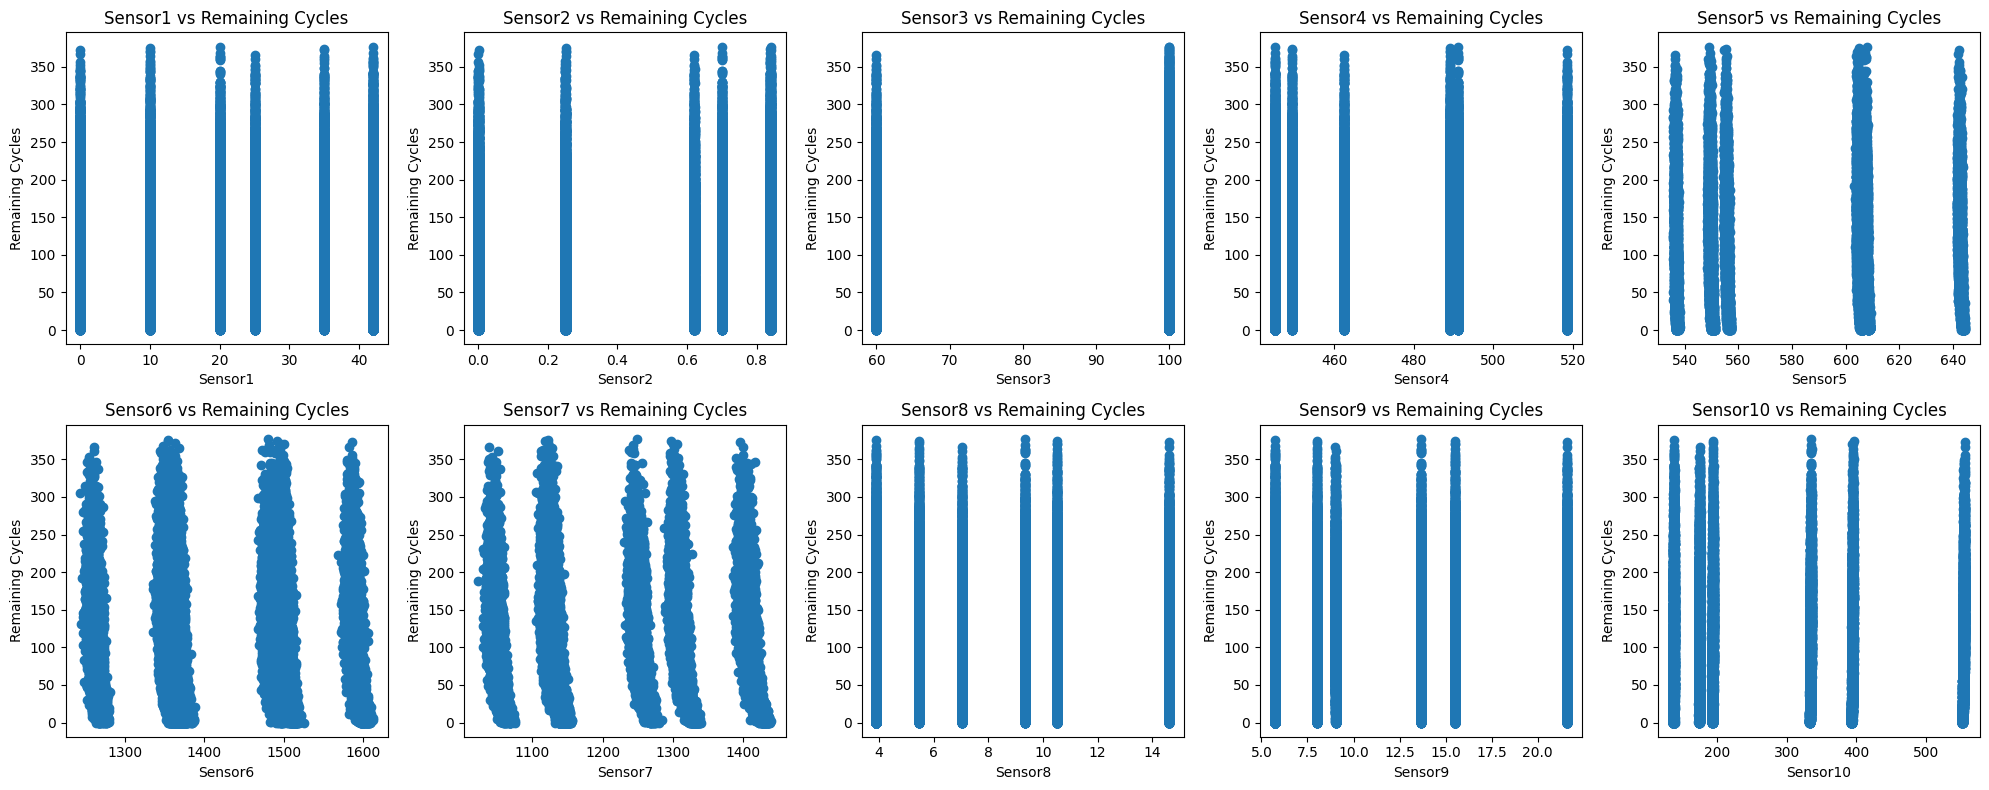

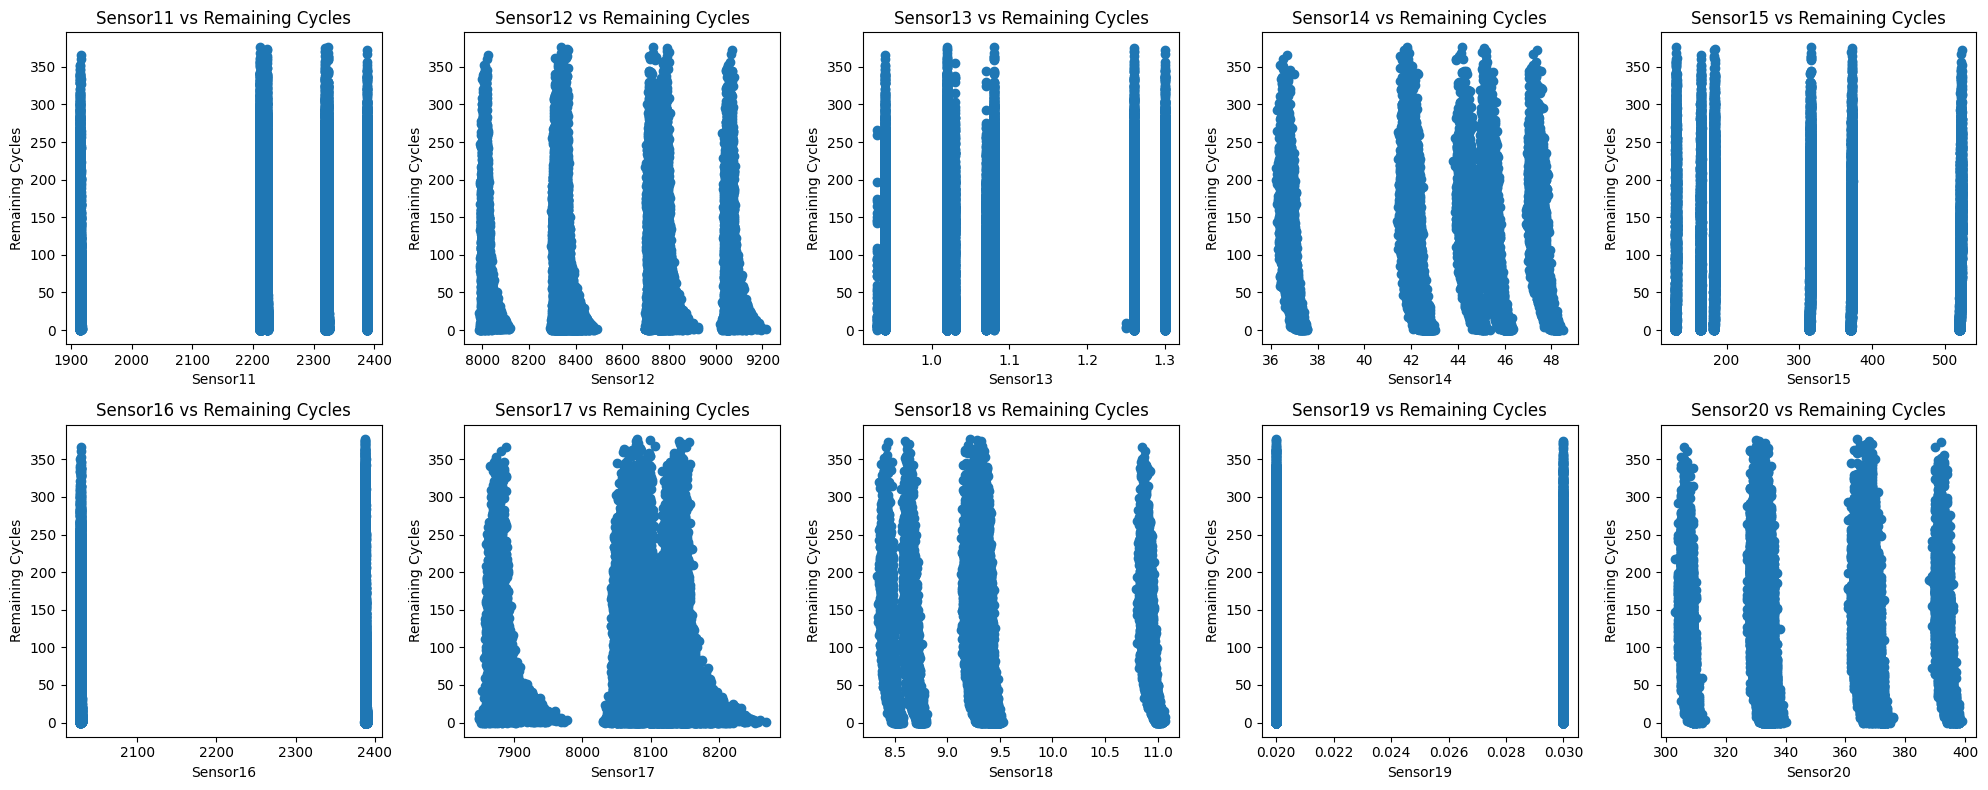

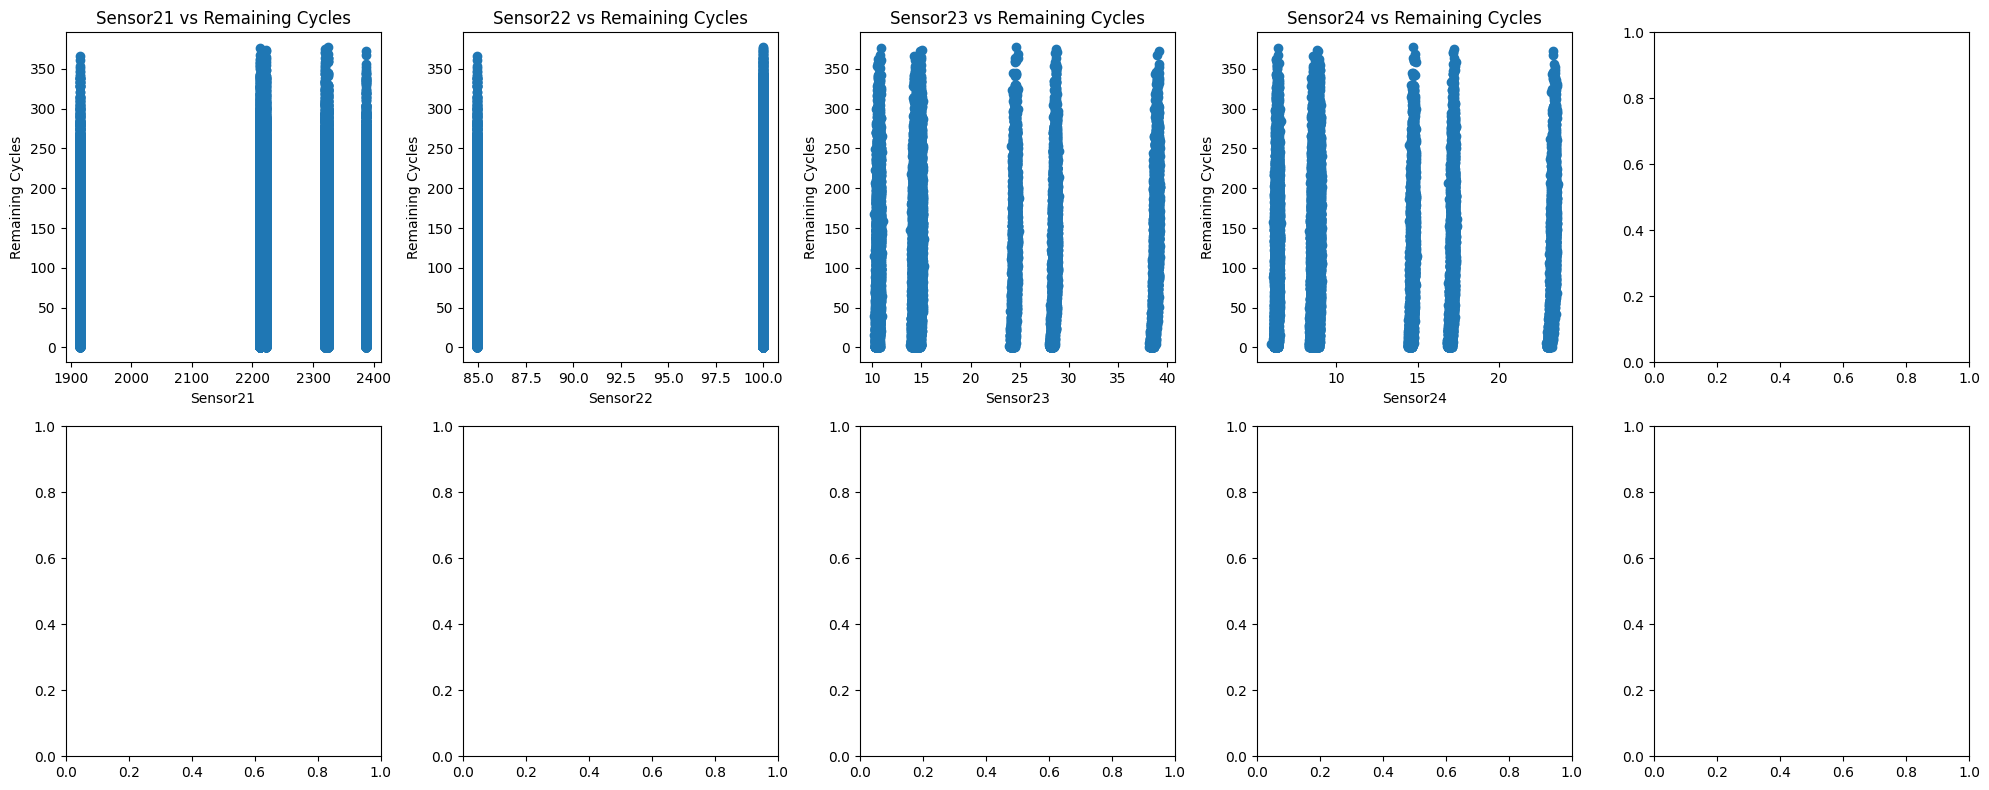

In [21]:
# Scatter plots for sensors vs remaining cycles
for j in range(0, len(sensors), 10):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    axs = axs.ravel()
    for i, sensor in enumerate(sensors[j:j+10]):
        axs[i].scatter(data[sensor], data['Remaining Cycles'])
        axs[i].set_title(f'{sensor} vs Remaining Cycles')
        axs[i].set_xlabel(sensor)
        axs[i].set_ylabel('Remaining Cycles')
    plt.tight_layout()
    plt.show()

Group: Remaining Cycles = 0, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  206.765385   27.937113    0.598383   97.384615  466.689346   
std     75.199734   46.782198   16.564435    0.324420    9.907202   27.479073   
min      1.000000  128.000000    0.000100    0.000000   60.000000  445.000000   
25%     65.750000  174.000000   10.003225    0.250650  100.000000  445.000000   
50%    130.500000  199.000000   41.998300    0.840000  100.000000  445.000000   
75%    195.250000  230.250000   42.002625    0.840100  100.000000  489.050000   
max    260.000000  378.000000   42.007900    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   575.619115  1425.801000  1218.674692    7.124231  ...  2364.920731   

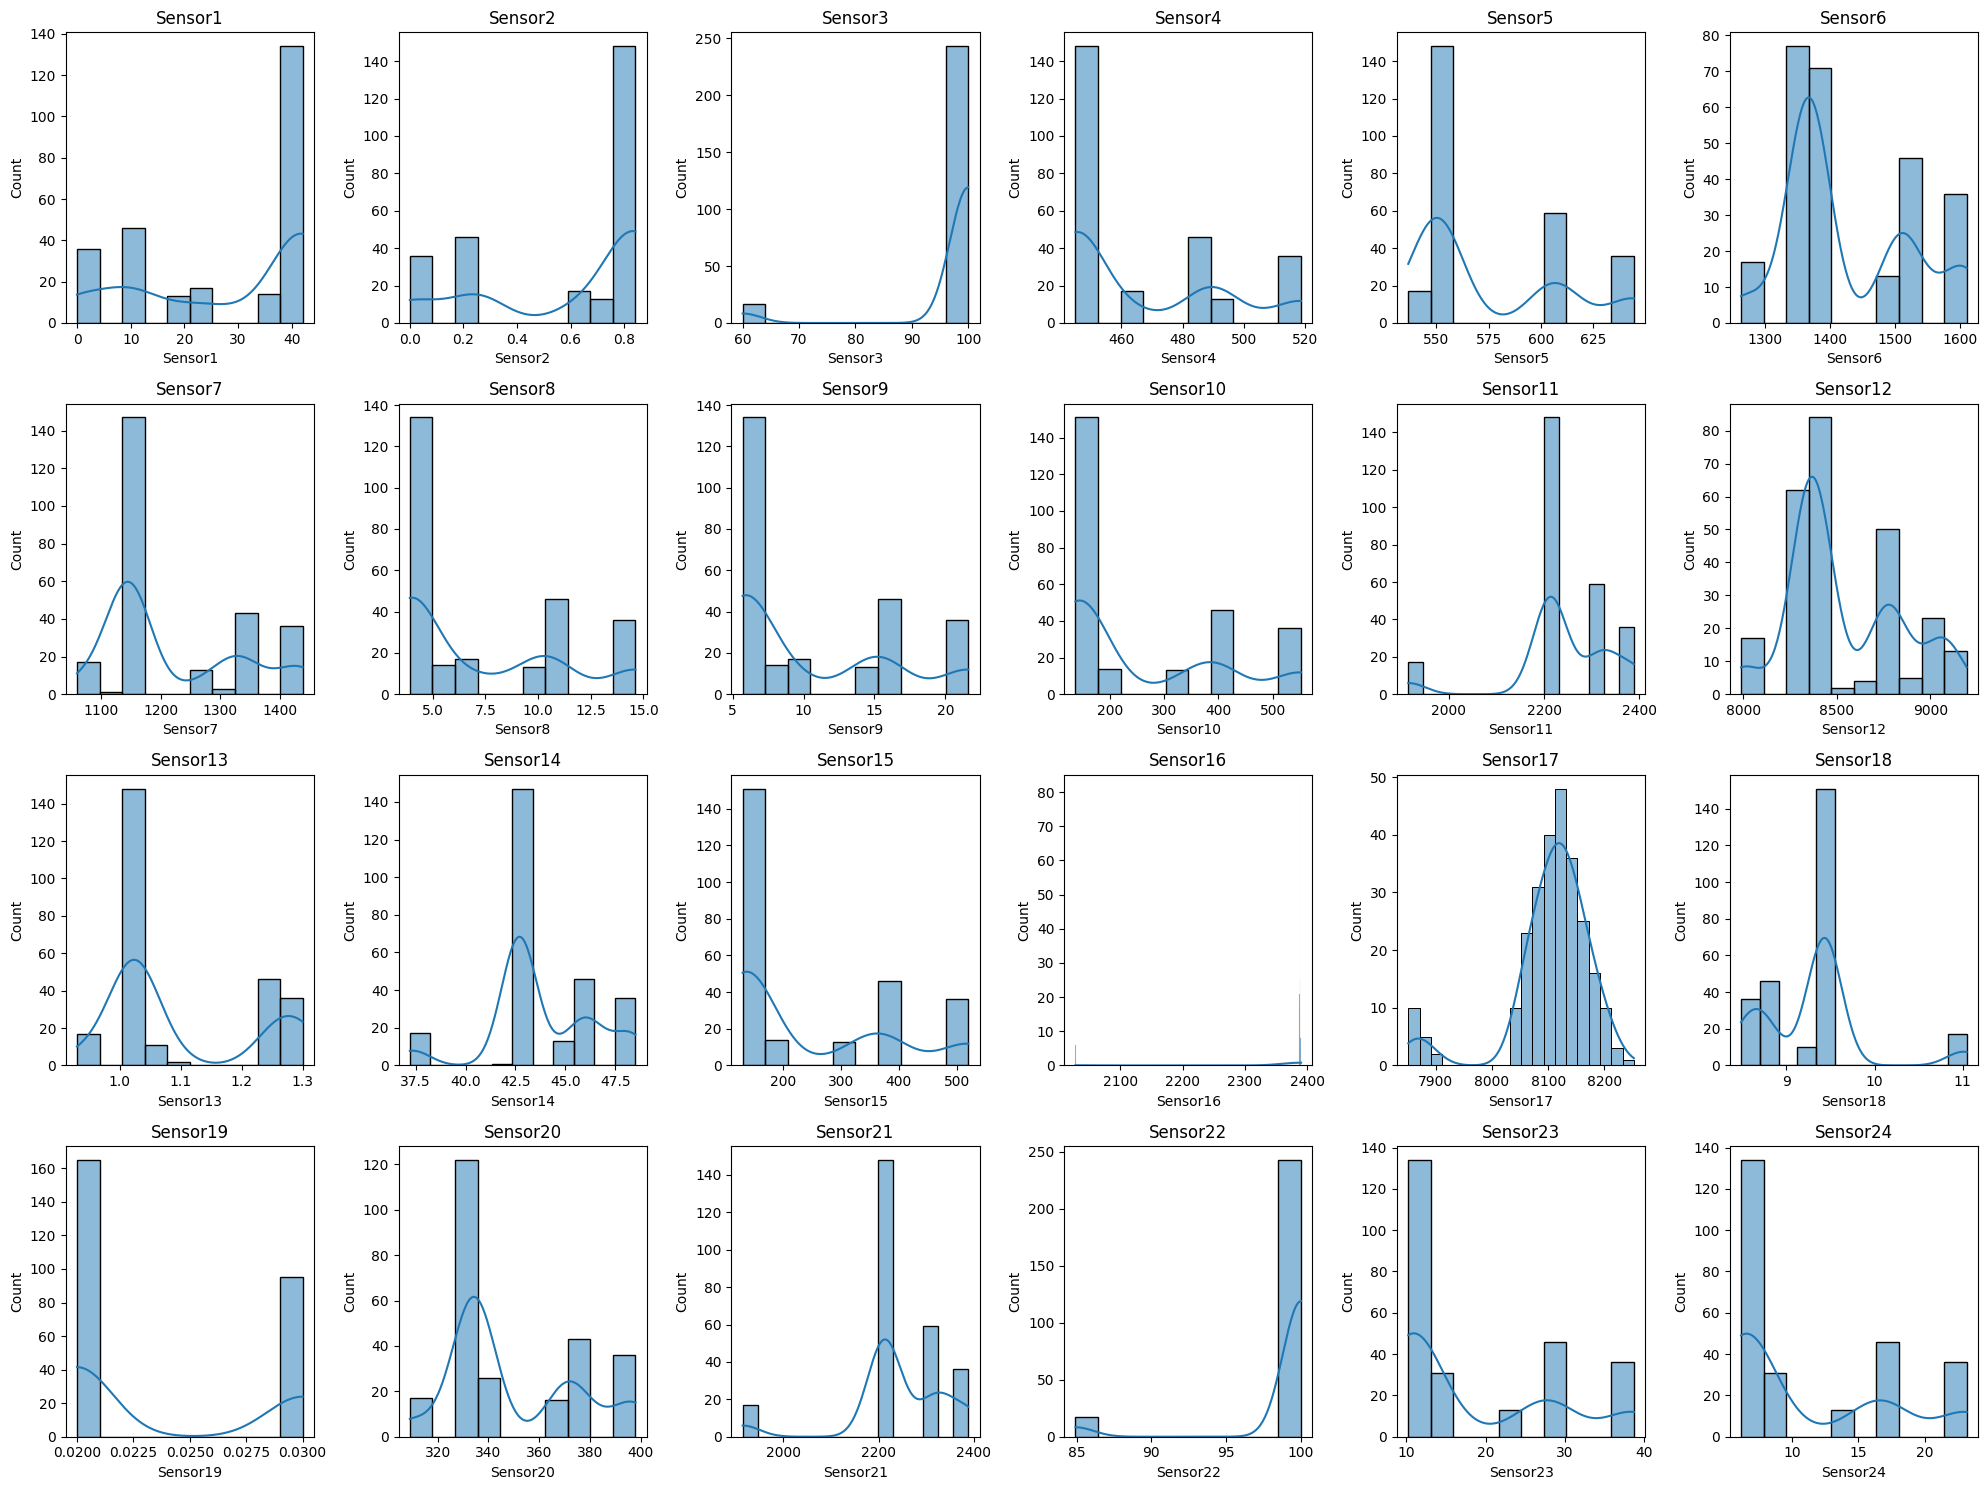

Enter 'c' to continue, 'q' to quit exploring group 0: c
Group: Remaining Cycles = 1, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  205.765385   22.545148    0.568075   94.461538  476.343962   
std     75.199734   46.782198   13.821556    0.300317   13.841995   25.412854   
min      1.000000  127.000000    0.000000    0.000000   60.000000  445.000000   
25%     65.750000  173.000000   10.006350    0.251075  100.000000  449.440000   
50%    130.500000  198.000000   20.006900    0.700000  100.000000  489.050000   
75%    195.250000  229.250000   35.002300    0.840000  100.000000  491.190000   
max    260.000000  377.000000   42.008000    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   585.119962  1

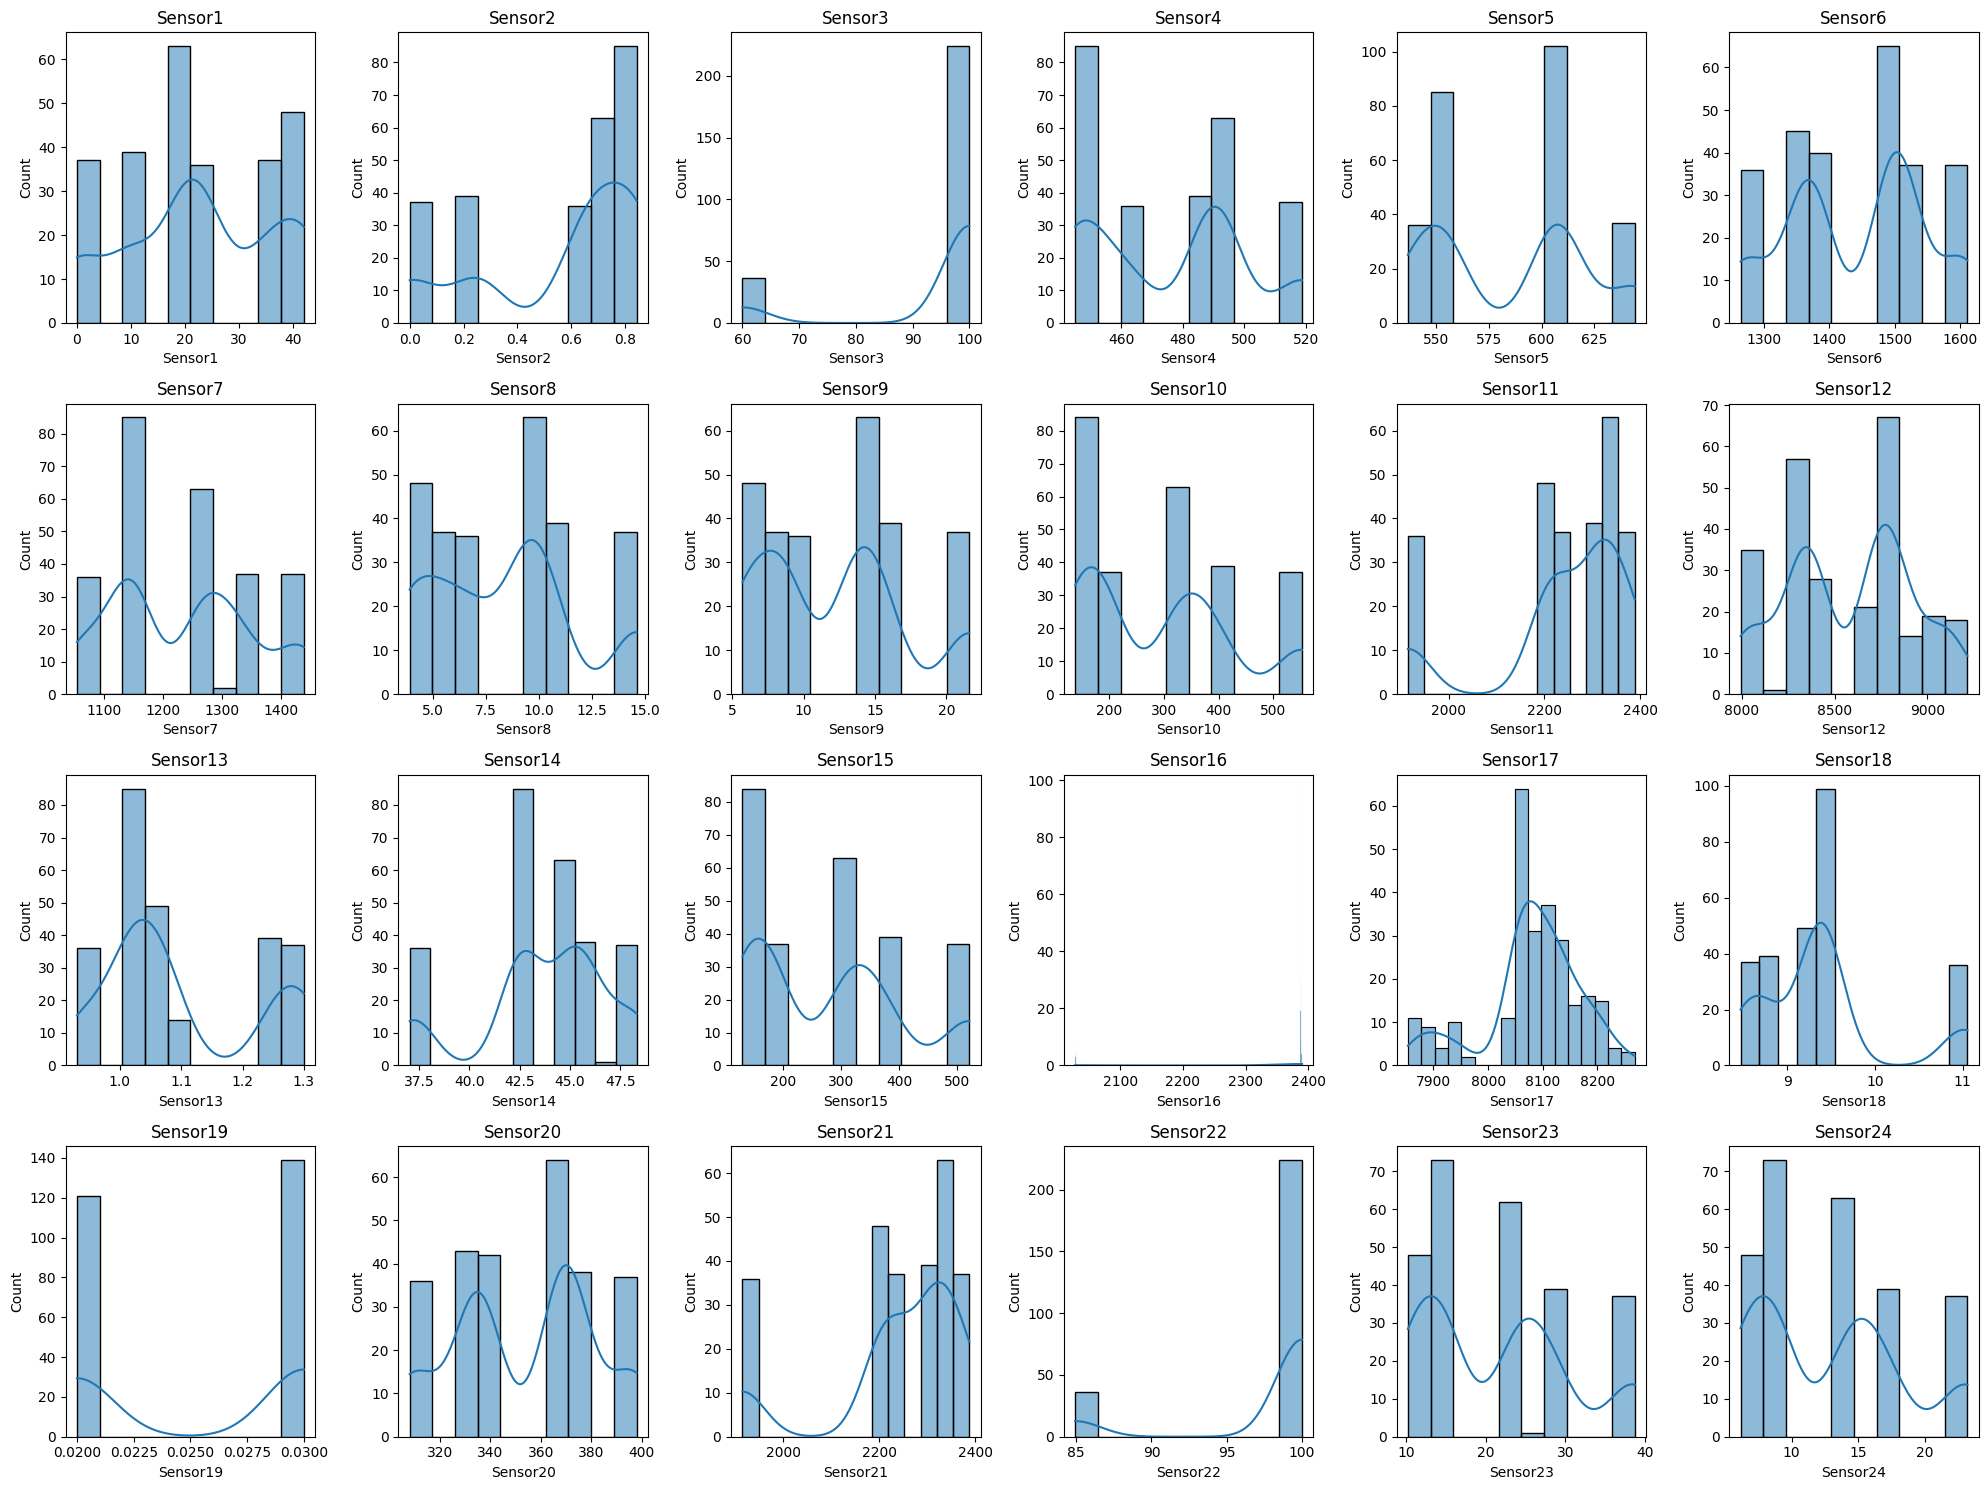

Enter 'c' to continue, 'q' to quit exploring group 1: c
Group: Remaining Cycles = 2, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  204.765385   22.964336    0.565882   93.538462  475.245231   
std     75.199734   46.782198   14.449123    0.314443   14.749467   26.842093   
min      1.000000  126.000000    0.000200    0.000000   60.000000  445.000000   
25%     65.750000  172.000000   10.006350    0.250825  100.000000  449.440000   
50%    130.500000  197.000000   24.999600    0.700000  100.000000  462.540000   
75%    195.250000  228.250000   35.005125    0.840000  100.000000  491.190000   
max    260.000000  376.000000   42.007900    0.841800  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   582.980038  1

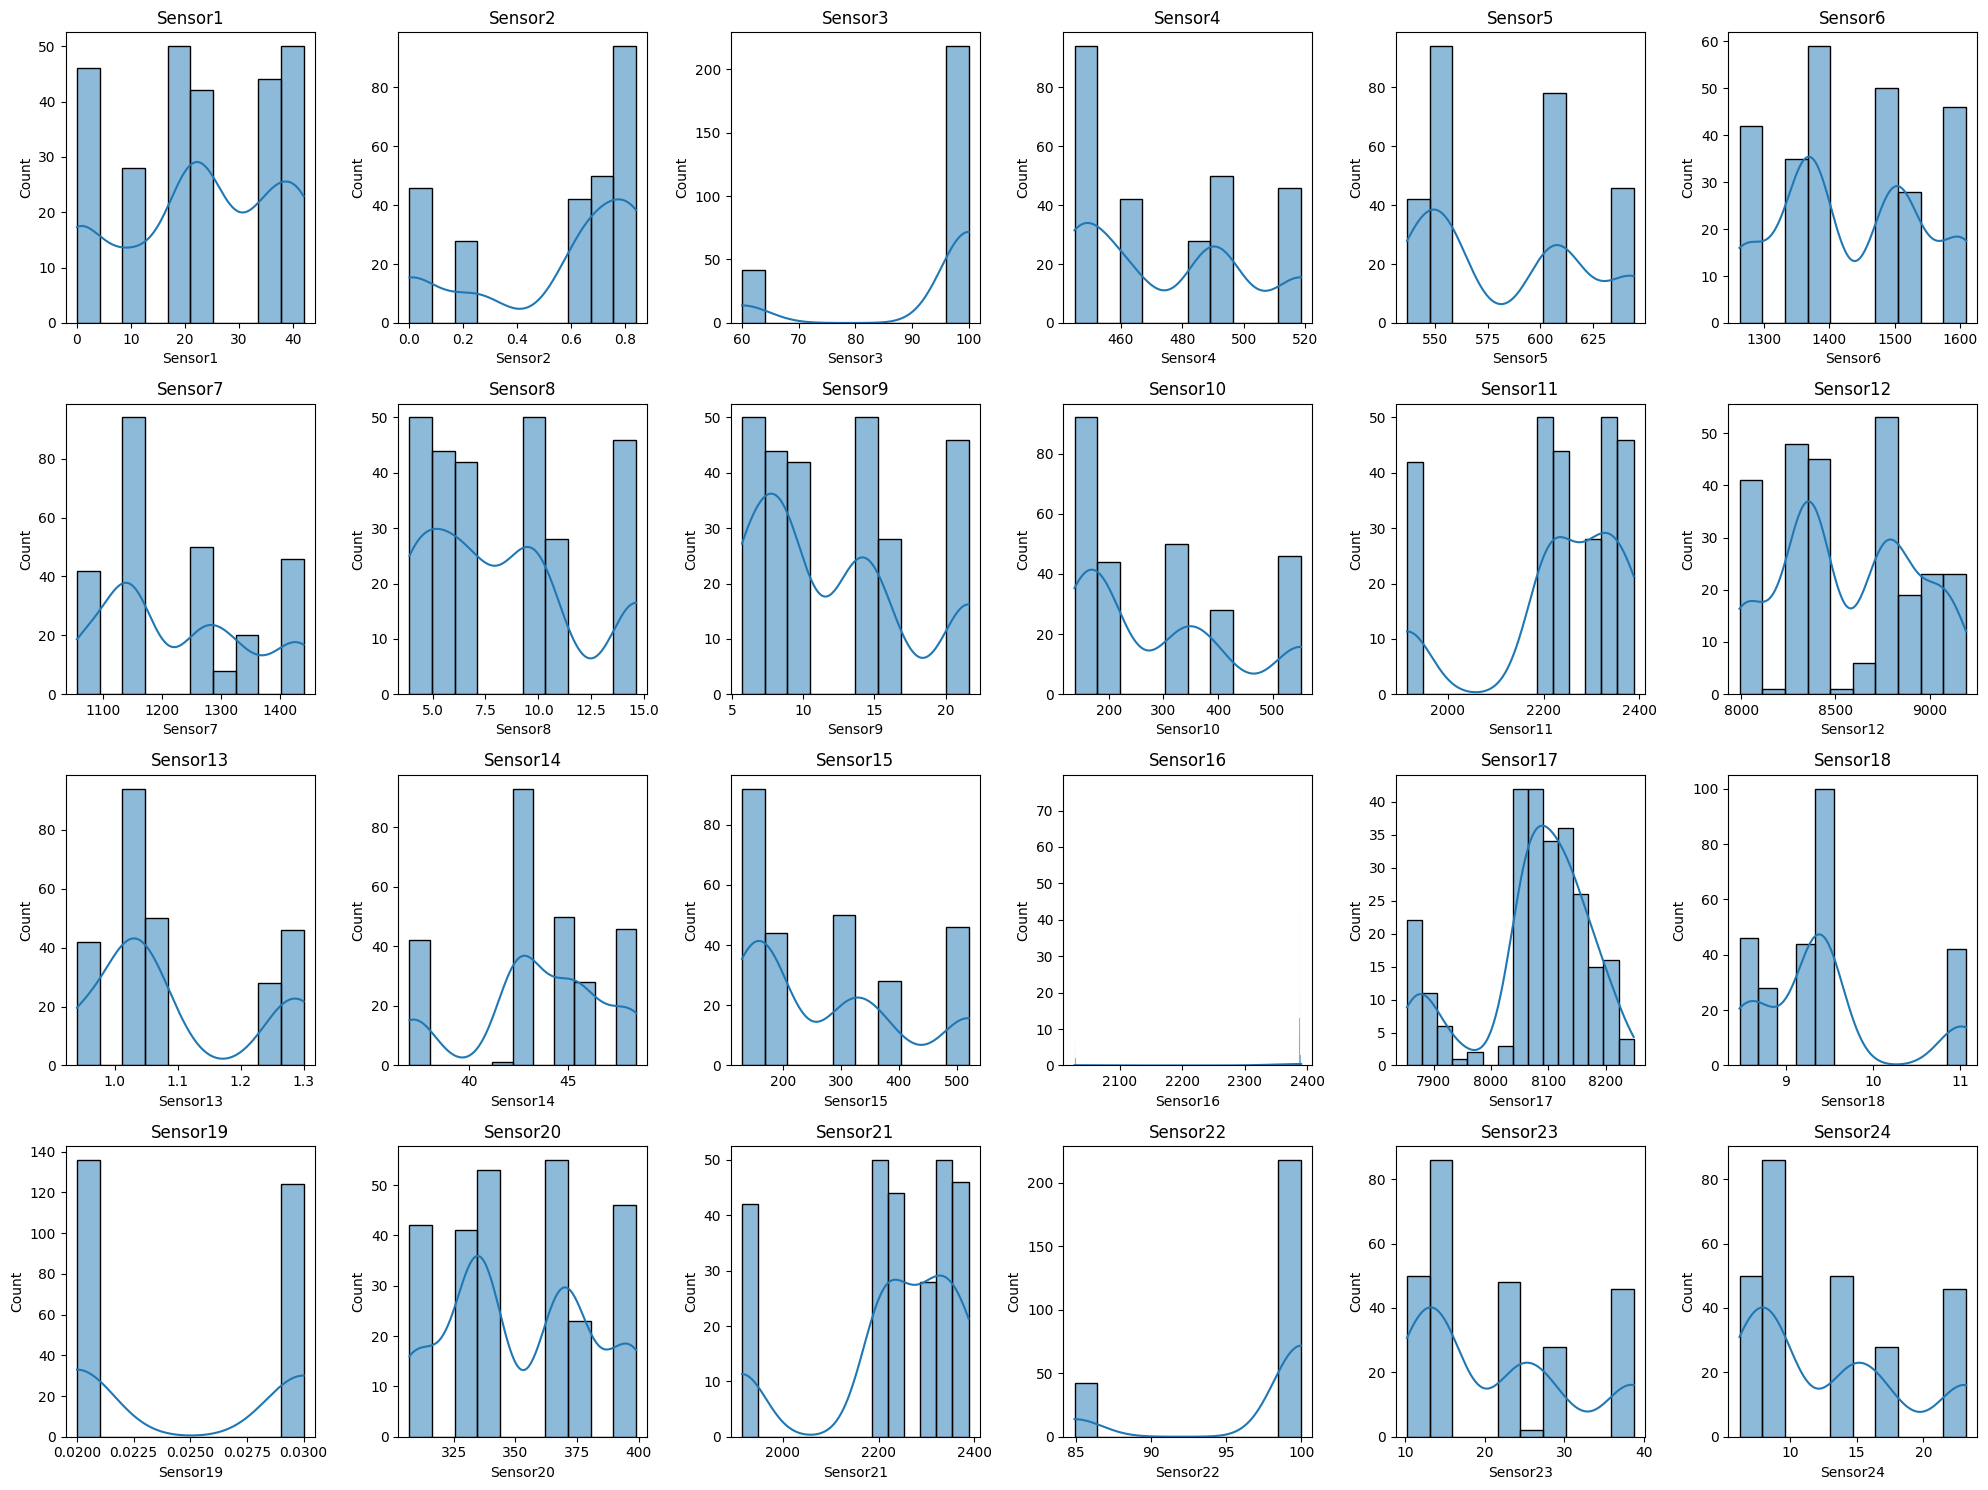

Enter 'c' to continue, 'q' to quit exploring group 2: c
Group: Remaining Cycles = 3, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  203.765385   23.675922    0.572619   92.615385  473.047577   
std     75.199734   46.782198   13.950994    0.291825   15.549341   24.756481   
min      1.000000  125.000000    0.000100    0.000000   60.000000  445.000000   
25%     65.750000  171.000000   10.006900    0.251075  100.000000  449.440000   
50%    130.500000  196.000000   24.999700    0.700000  100.000000  462.540000   
75%    195.250000  227.250000   35.005800    0.840000  100.000000  491.190000   
max    260.000000  375.000000   42.007700    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   579.299615  1

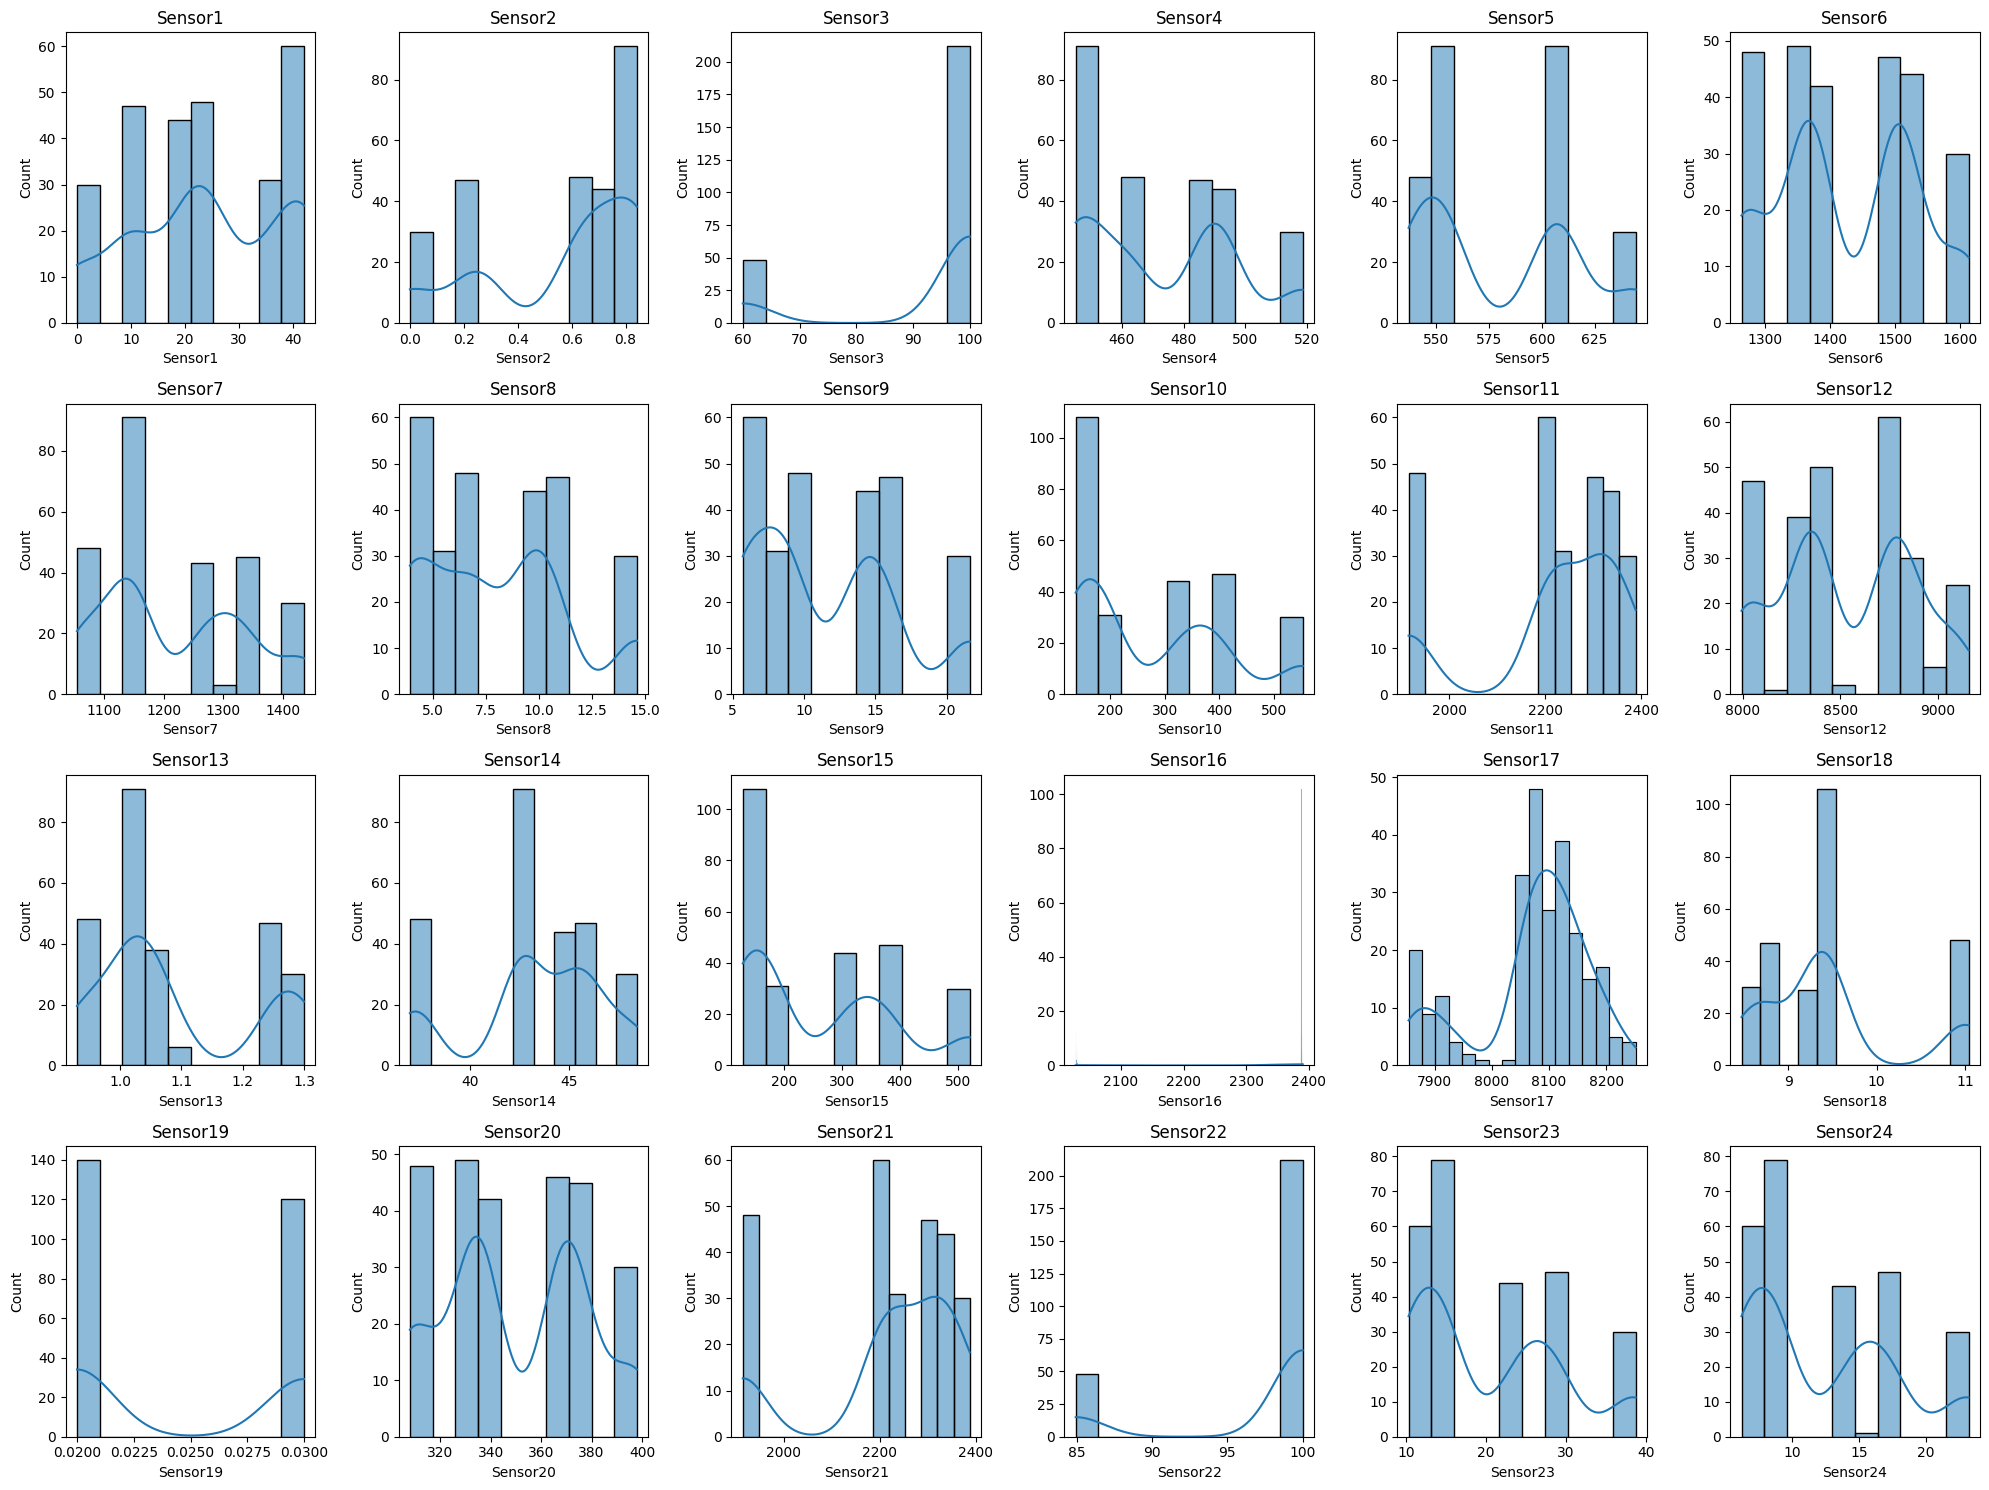

Enter 'c' to continue, 'q' to quit exploring group 3: c
Group: Remaining Cycles = 4, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  202.765385   24.064522    0.571431   94.153846  472.415731   
std     75.199734   46.782198   14.763932    0.311619   14.157668   26.328967   
min      1.000000  124.000000    0.000100    0.000000   60.000000  445.000000   
25%     65.750000  170.000000   10.004650    0.250375  100.000000  449.440000   
50%    130.500000  195.000000   25.002050    0.700000  100.000000  462.540000   
75%    195.250000  226.250000   35.006750    0.840000  100.000000  491.190000   
max    260.000000  374.000000   42.007800    0.841900  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   579.937731  1

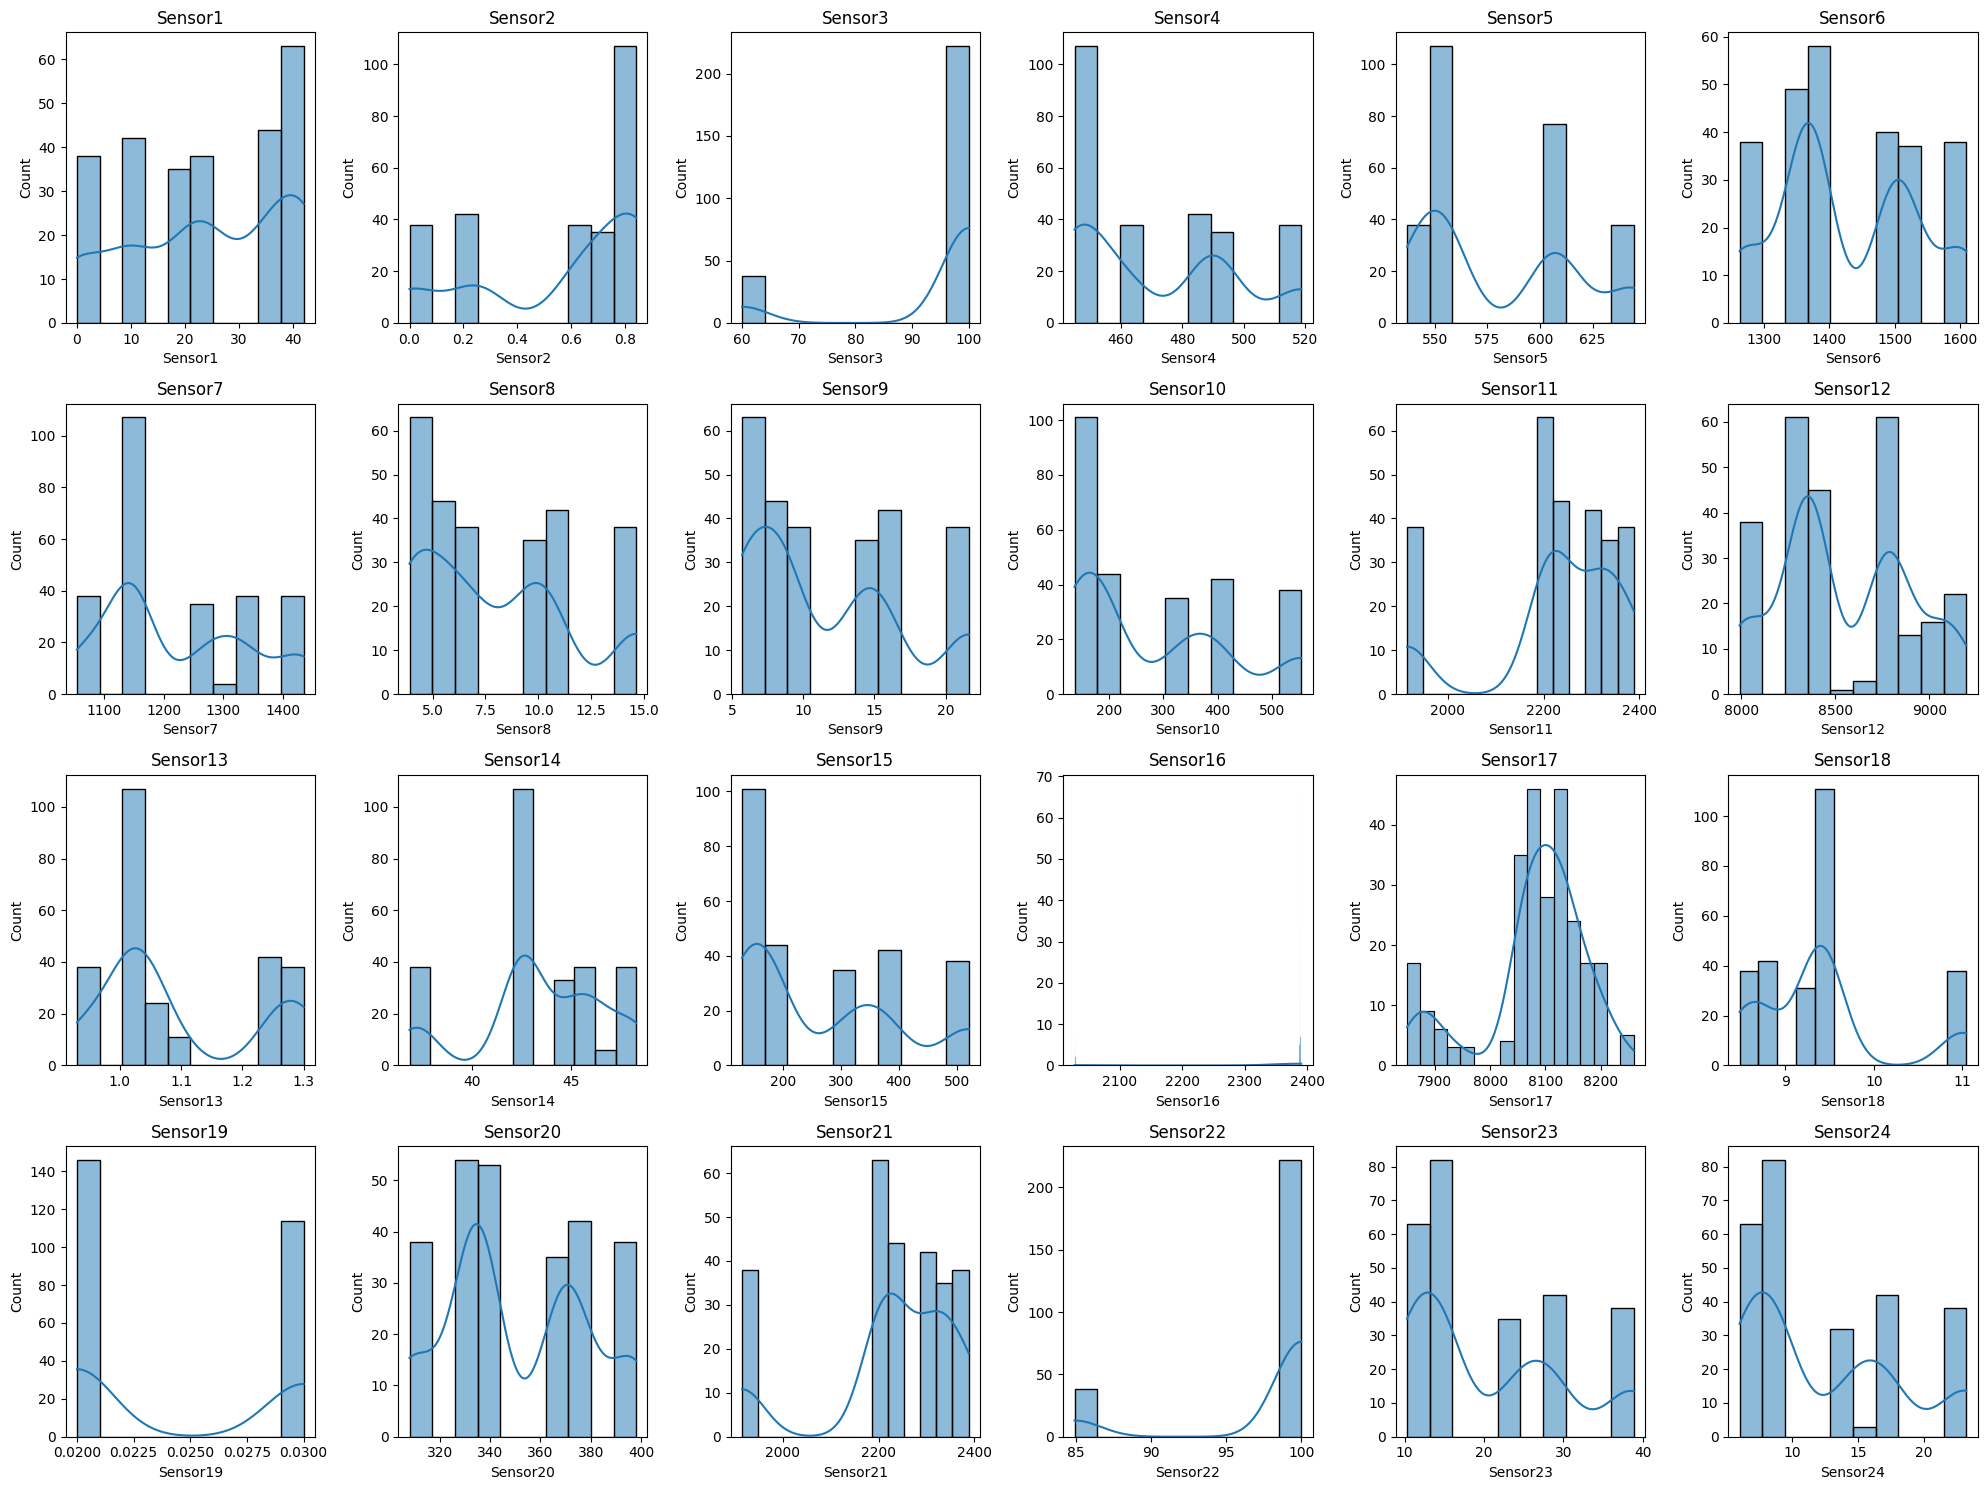

Enter 'c' to continue, 'q' to quit exploring group 4: c
Group: Remaining Cycles = 5, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  201.765385   22.944856    0.547911   94.769231  474.716731   
std     75.199734   46.782198   15.152574    0.323978   13.511921   27.209889   
min      1.000000  123.000000    0.000100    0.000000   60.000000  445.000000   
25%     65.750000  169.000000   10.001975    0.250175  100.000000  449.440000   
50%    130.500000  194.000000   24.999350    0.700000  100.000000  462.540000   
75%    195.250000  225.250000   35.006100    0.840000  100.000000  491.190000   
max    260.000000  373.000000   42.007900    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   583.341615  1

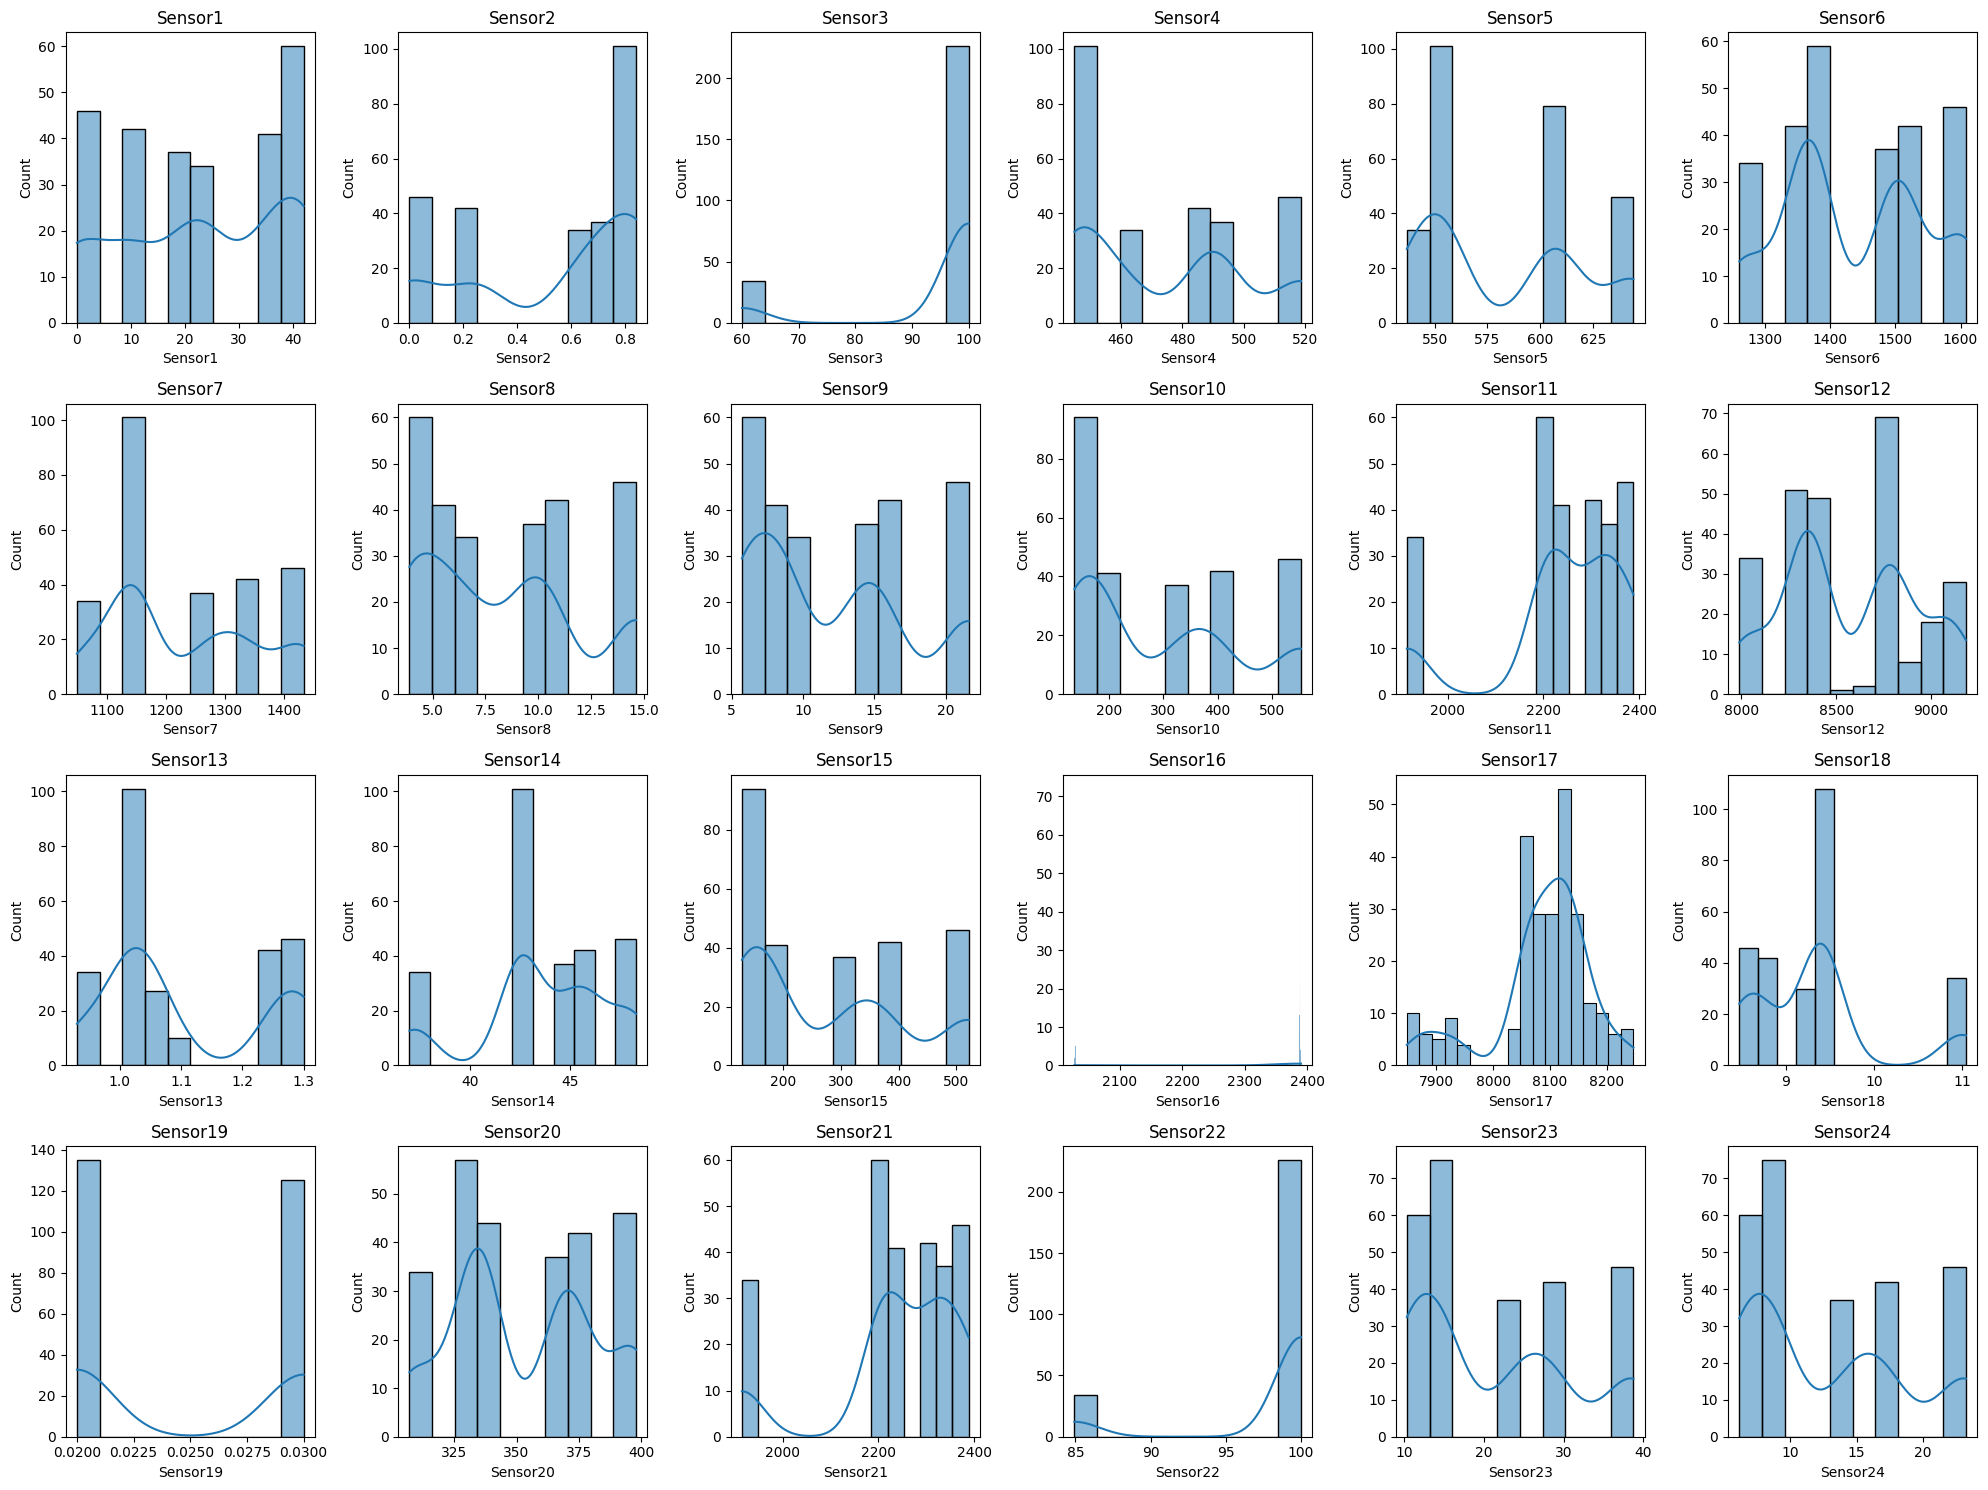

Enter 'c' to continue, 'q' to quit exploring group 5: c
Group: Remaining Cycles = 6, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  200.765385   22.456623    0.537748   94.615385  475.629654   
std     75.199734   46.782198   15.181446    0.325578   13.678823   27.268956   
min      1.000000  122.000000    0.000100    0.000000   60.000000  445.000000   
25%     65.750000  168.000000   10.002275    0.250000  100.000000  449.440000   
50%    130.500000  193.000000   24.998650    0.700000  100.000000  462.540000   
75%    195.250000  224.250000   35.006650    0.840000  100.000000  491.190000   
max    260.000000  372.000000   42.007900    0.841900  100.000000  518.670000   

          Sensor5     Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.00000   260.000000  260.000000  ...   260.000000   
mean   584.321962  144

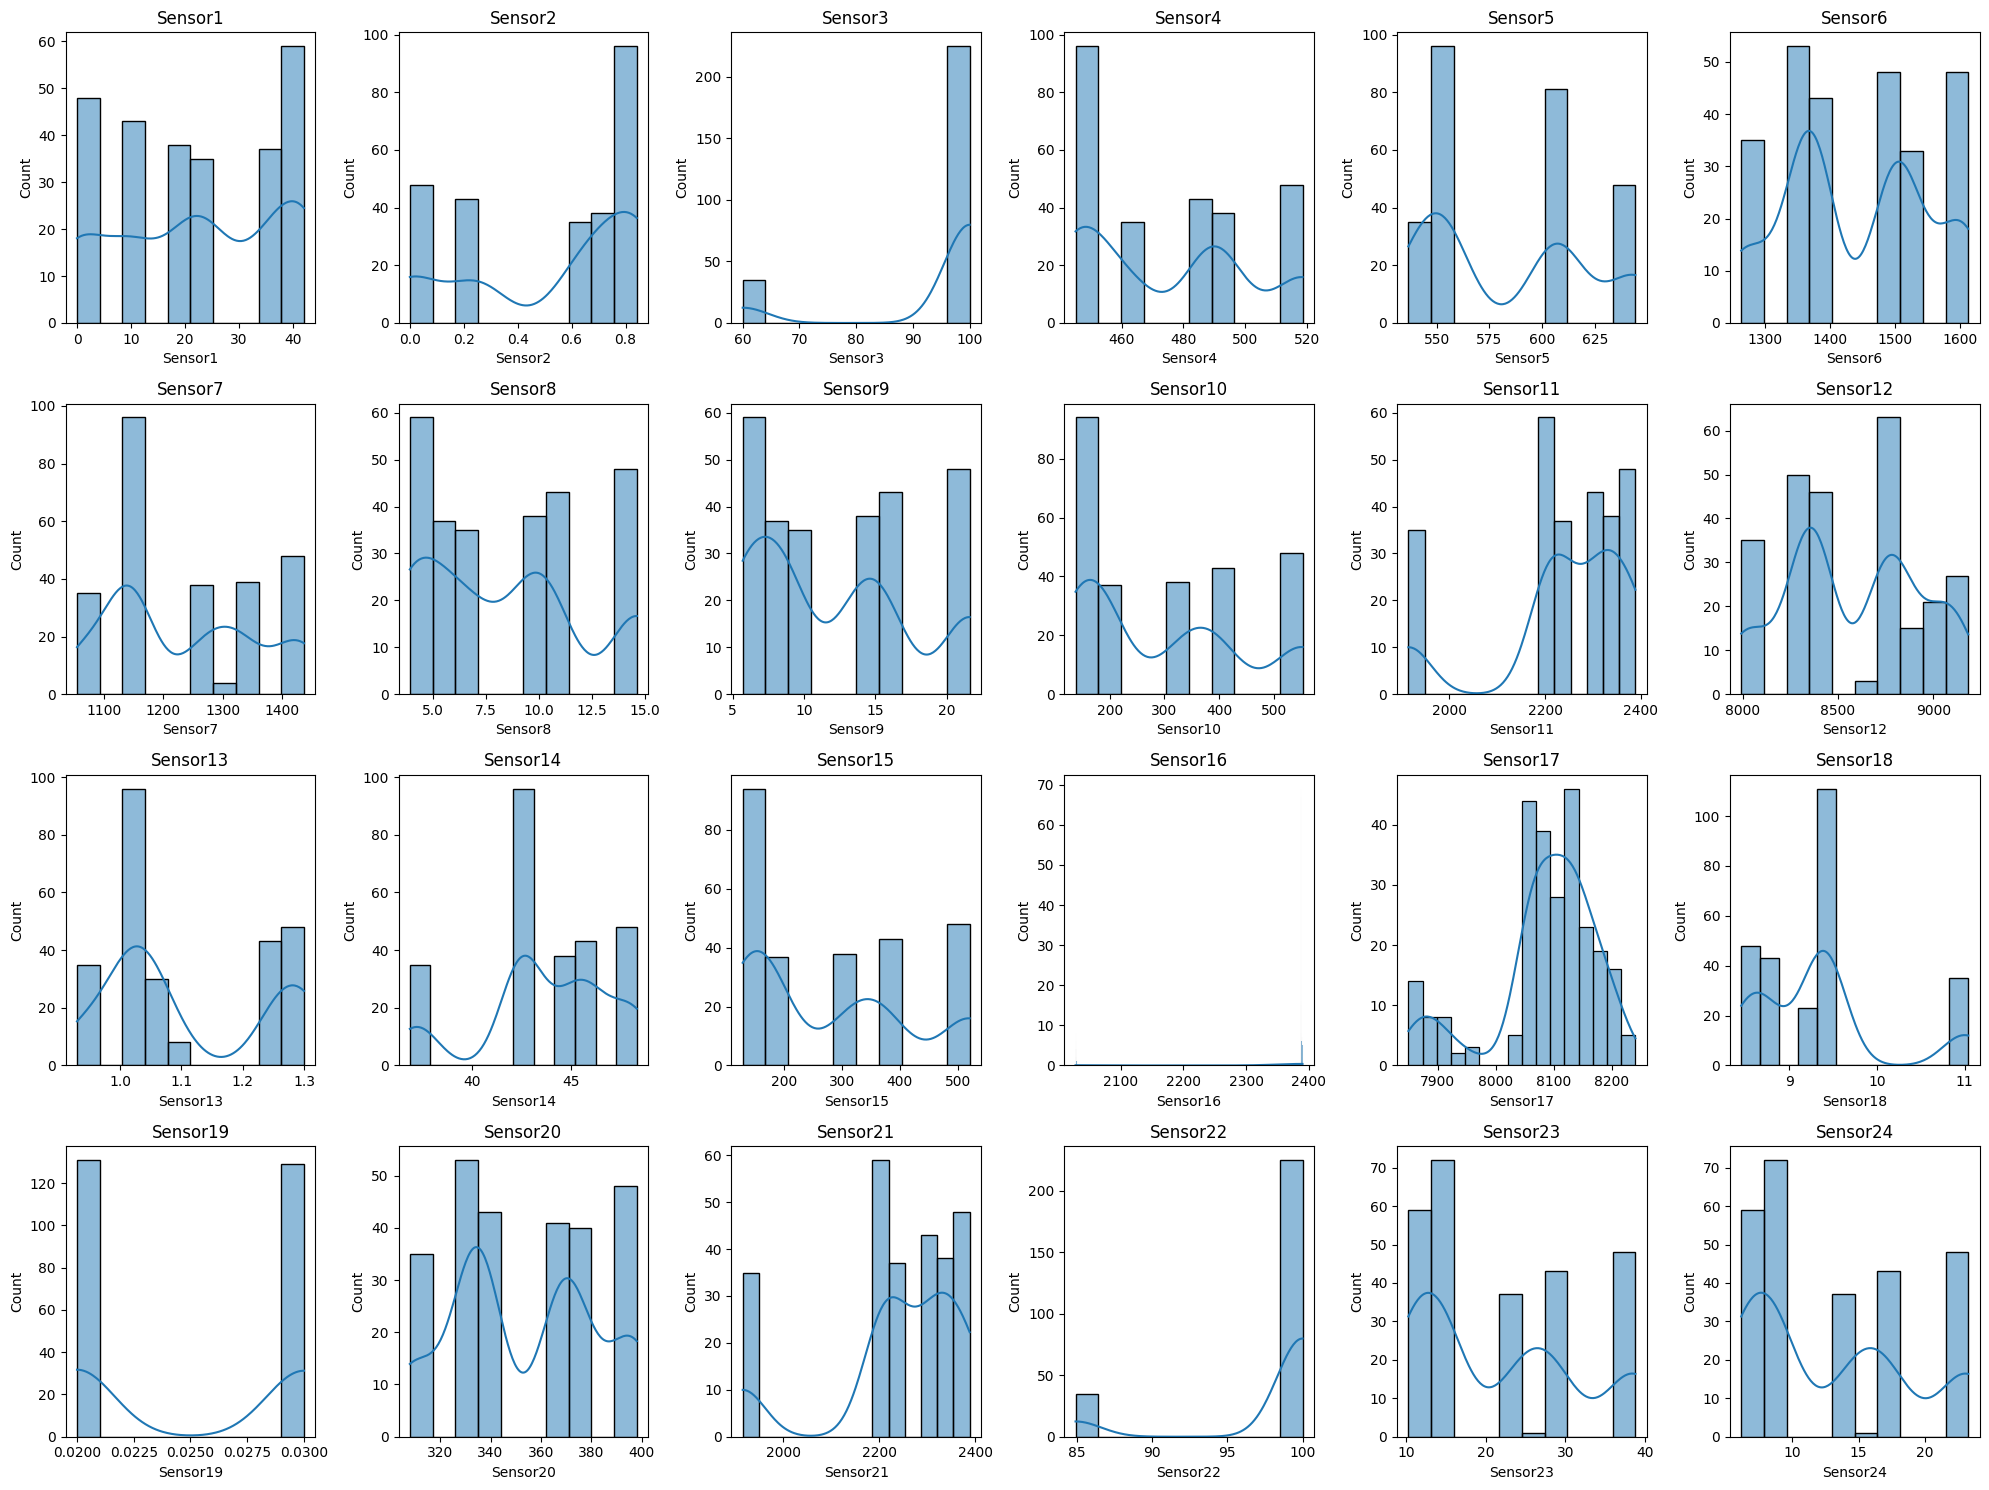

Enter 'c' to continue, 'q' to quit exploring group 6: c
Group: Remaining Cycles = 7, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  199.765385   26.314447    0.597238   94.153846  468.926538   
std     75.199734   46.782198   15.413730    0.312141   14.157668   26.877680   
min      1.000000  121.000000    0.000100    0.000000   60.000000  445.000000   
25%     65.750000  167.000000   10.006075    0.251375  100.000000  445.000000   
50%    130.500000  192.000000   25.006750    0.701300  100.000000  462.540000   
75%    195.250000  223.250000   42.001500    0.840000  100.000000  489.050000   
max    260.000000  371.000000   42.008000    0.841900  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   575.446038  1

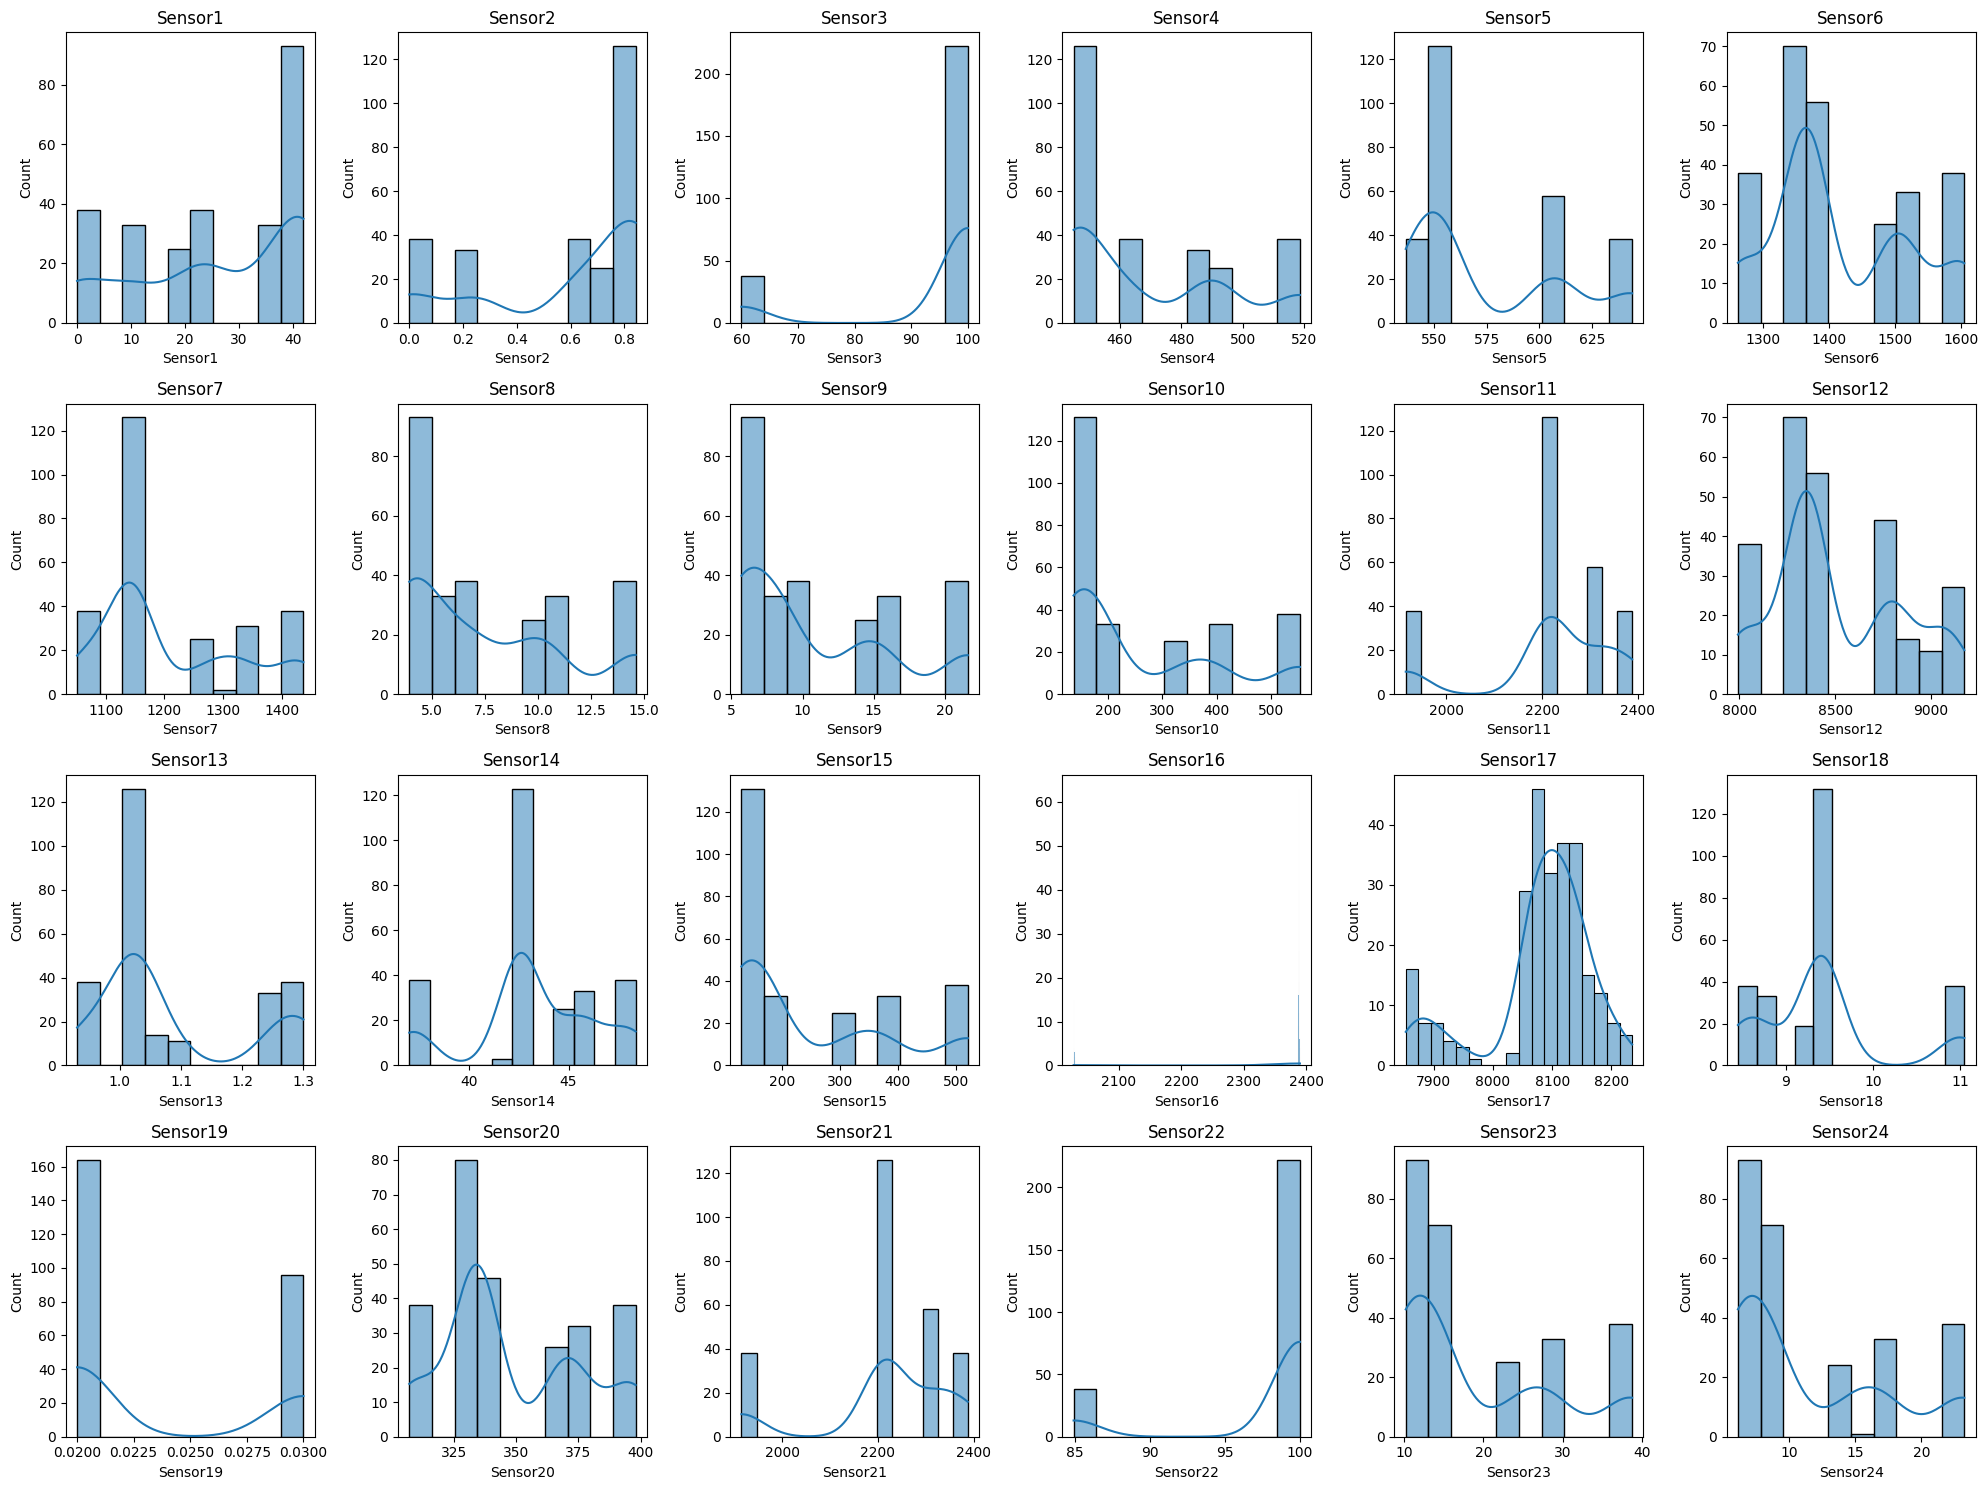

Enter 'c' to continue, 'q' to quit exploring group 7: c
Group: Remaining Cycles = 8, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  198.765385   24.252588    0.580580   93.076923  472.790538   
std     75.199734   46.782198   14.709782    0.309607   15.161736   26.774911   
min      1.000000  120.000000    0.000100    0.000000   60.000000  445.000000   
25%     65.750000  166.000000   10.005725    0.251350  100.000000  448.330000   
50%    130.500000  191.000000   25.001850    0.700000  100.000000  462.540000   
75%    195.250000  222.250000   36.754850    0.840000  100.000000  491.190000   
max    260.000000  370.000000   42.007800    0.841900  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   579.322923  1

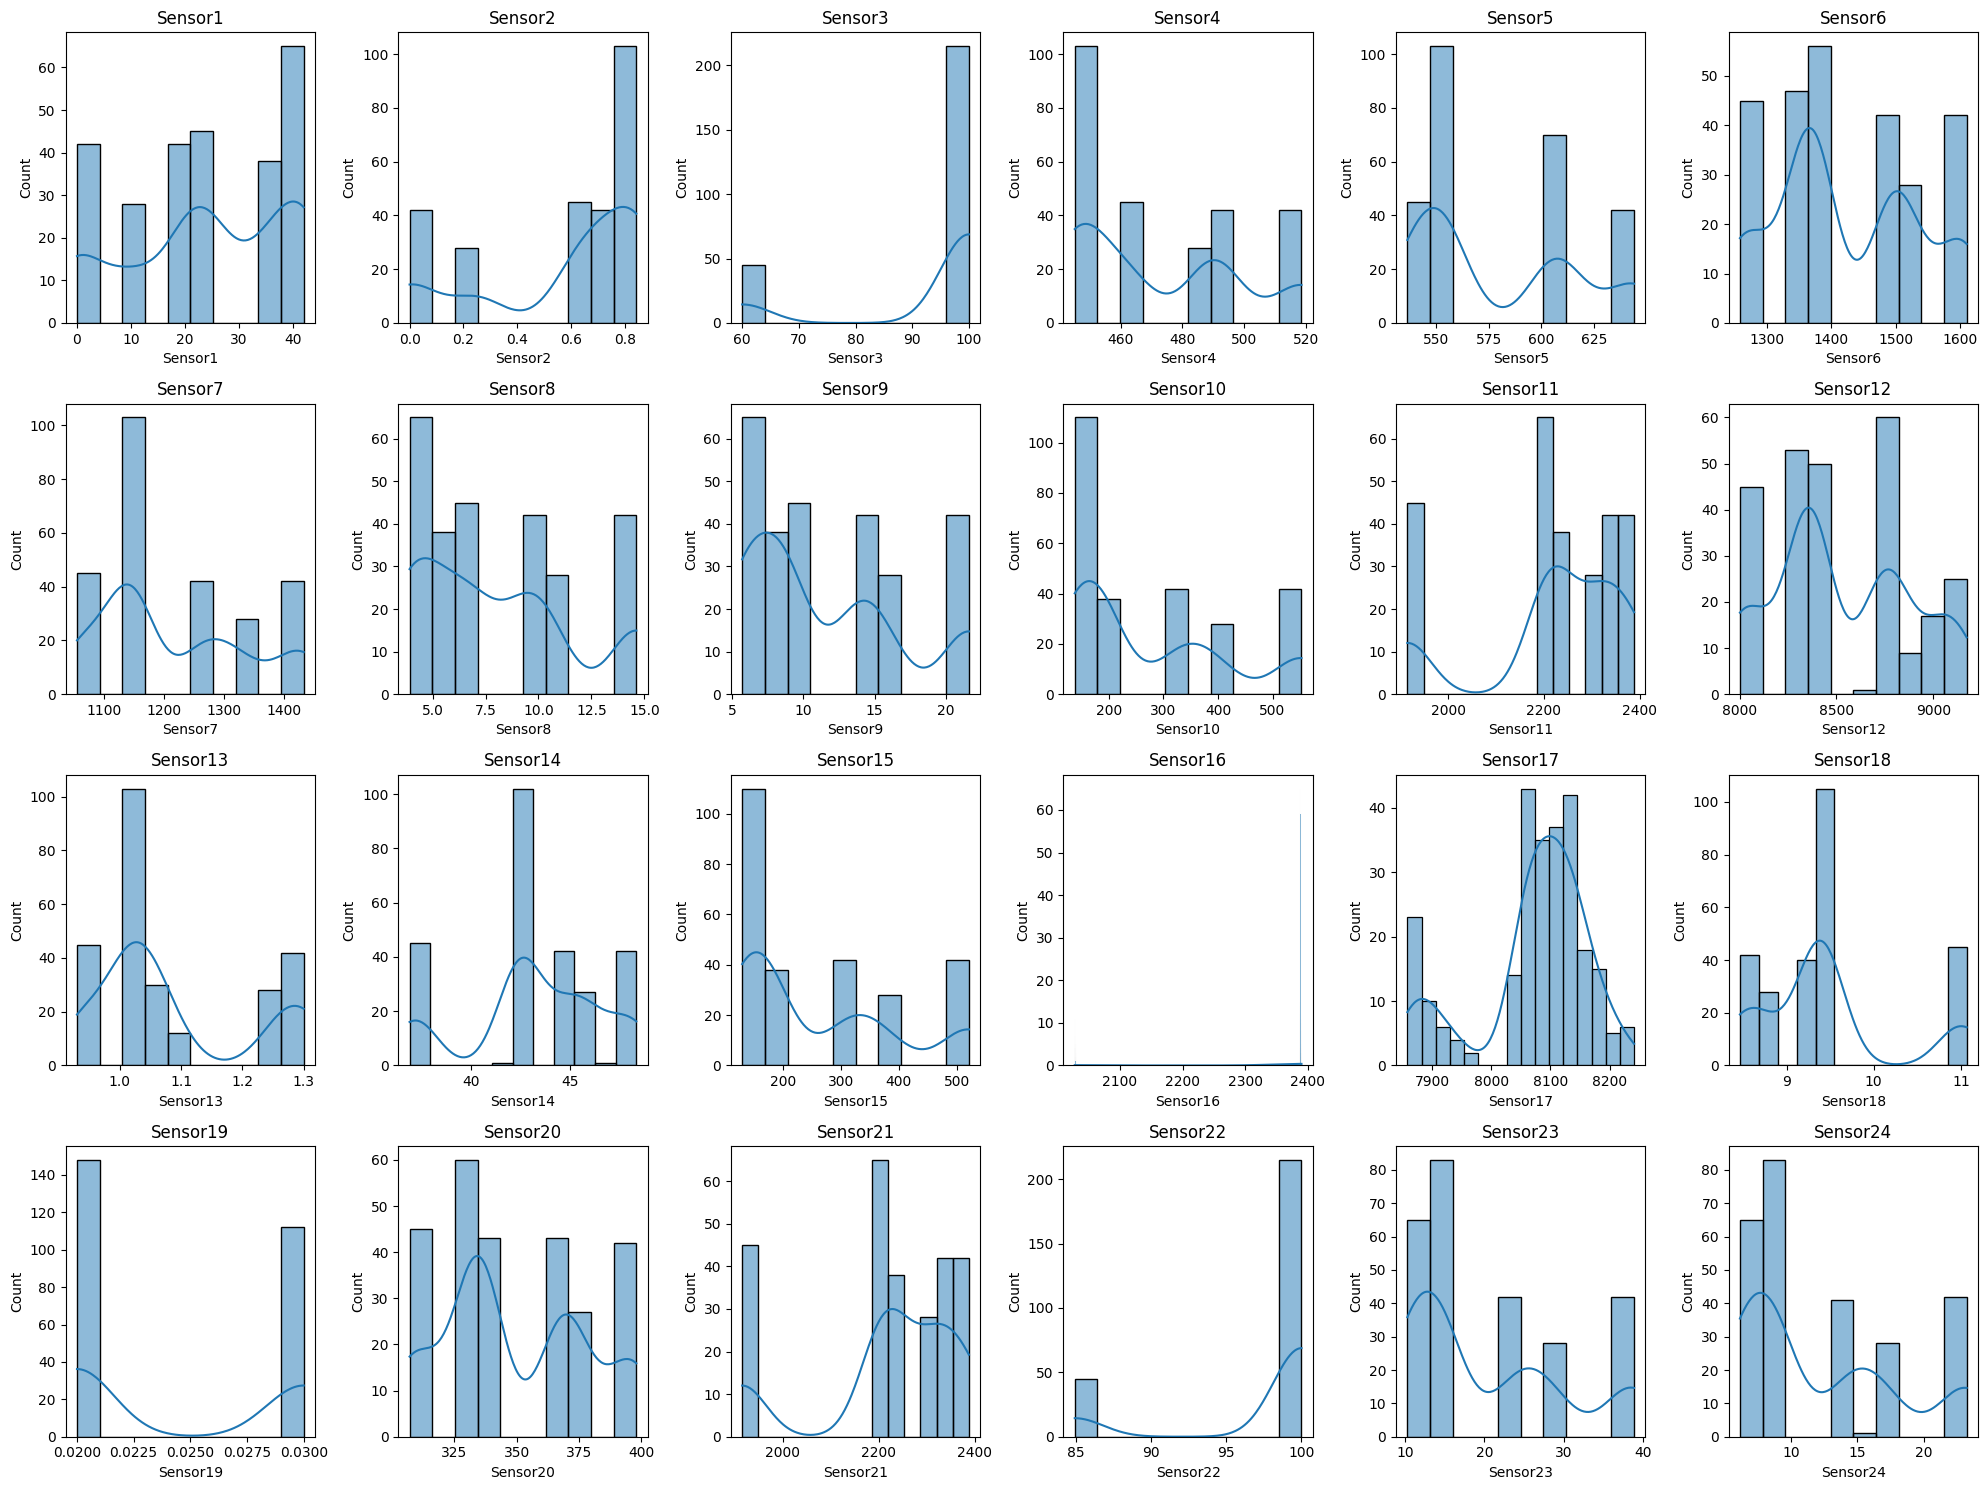

Enter 'c' to continue, 'q' to quit exploring group 8: c
Group: Remaining Cycles = 9, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  197.765385   23.652797    0.562907   94.769231  473.153577   
std     75.199734   46.782198   14.831204    0.313726   13.511921   26.323452   
min      1.000000  119.000000    0.000100    0.000000   60.000000  445.000000   
25%     65.750000  165.000000   10.004600    0.250700  100.000000  449.440000   
50%    130.500000  190.000000   25.001200    0.700000  100.000000  462.540000   
75%    195.250000  221.250000   35.006925    0.840000  100.000000  491.190000   
max    260.000000  369.000000   42.007500    0.841900  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   581.279731  1

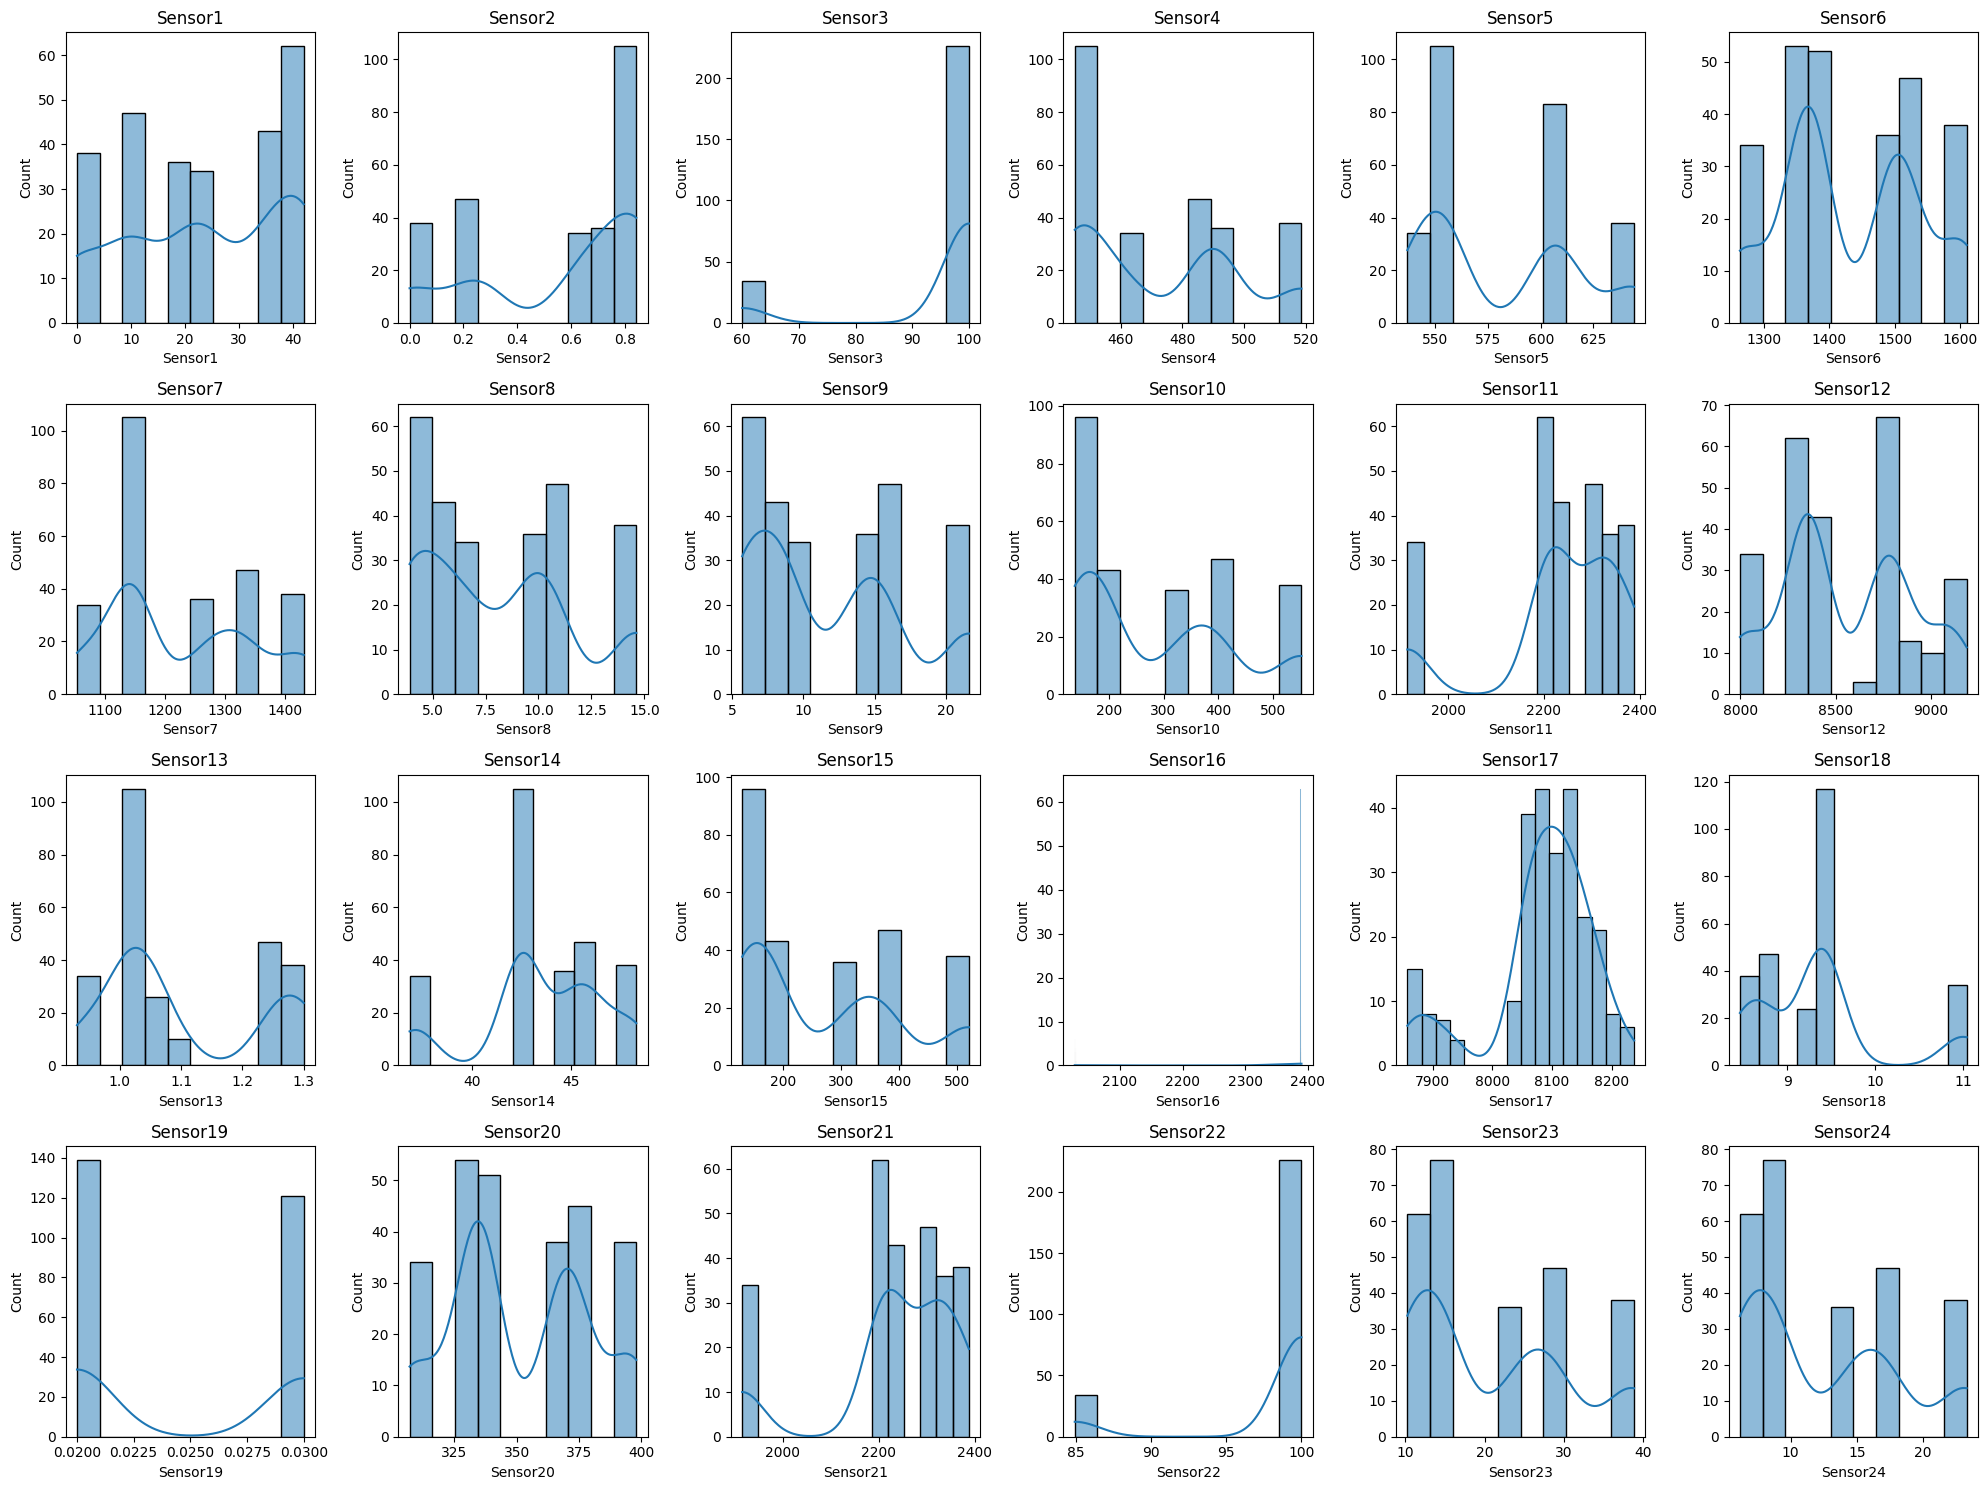

Enter 'c' to continue, 'q' to quit exploring group 9: c
Group: Remaining Cycles = 10, Size = 260
           Engine      Cycles     Sensor1     Sensor2     Sensor3     Sensor4  \
count  260.000000  260.000000  260.000000  260.000000  260.000000  260.000000   
mean   130.500000  196.765385   24.656697    0.578133   94.307692  471.724308   
std     75.199734   46.782198   15.195211    0.318993   14.001570   27.245455   
min      1.000000  118.000000    0.000000    0.000000   60.000000  445.000000   
25%     65.750000  164.000000   10.004675    0.250925  100.000000  445.000000   
50%    130.500000  189.000000   25.003750    0.700050  100.000000  462.540000   
75%    195.250000  220.250000   41.998450    0.840000  100.000000  491.190000   
max    260.000000  368.000000   42.007700    0.842000  100.000000  518.670000   

          Sensor5      Sensor6      Sensor7     Sensor8  ...     Sensor16  \
count  260.000000   260.000000   260.000000  260.000000  ...   260.000000   
mean   579.079462  

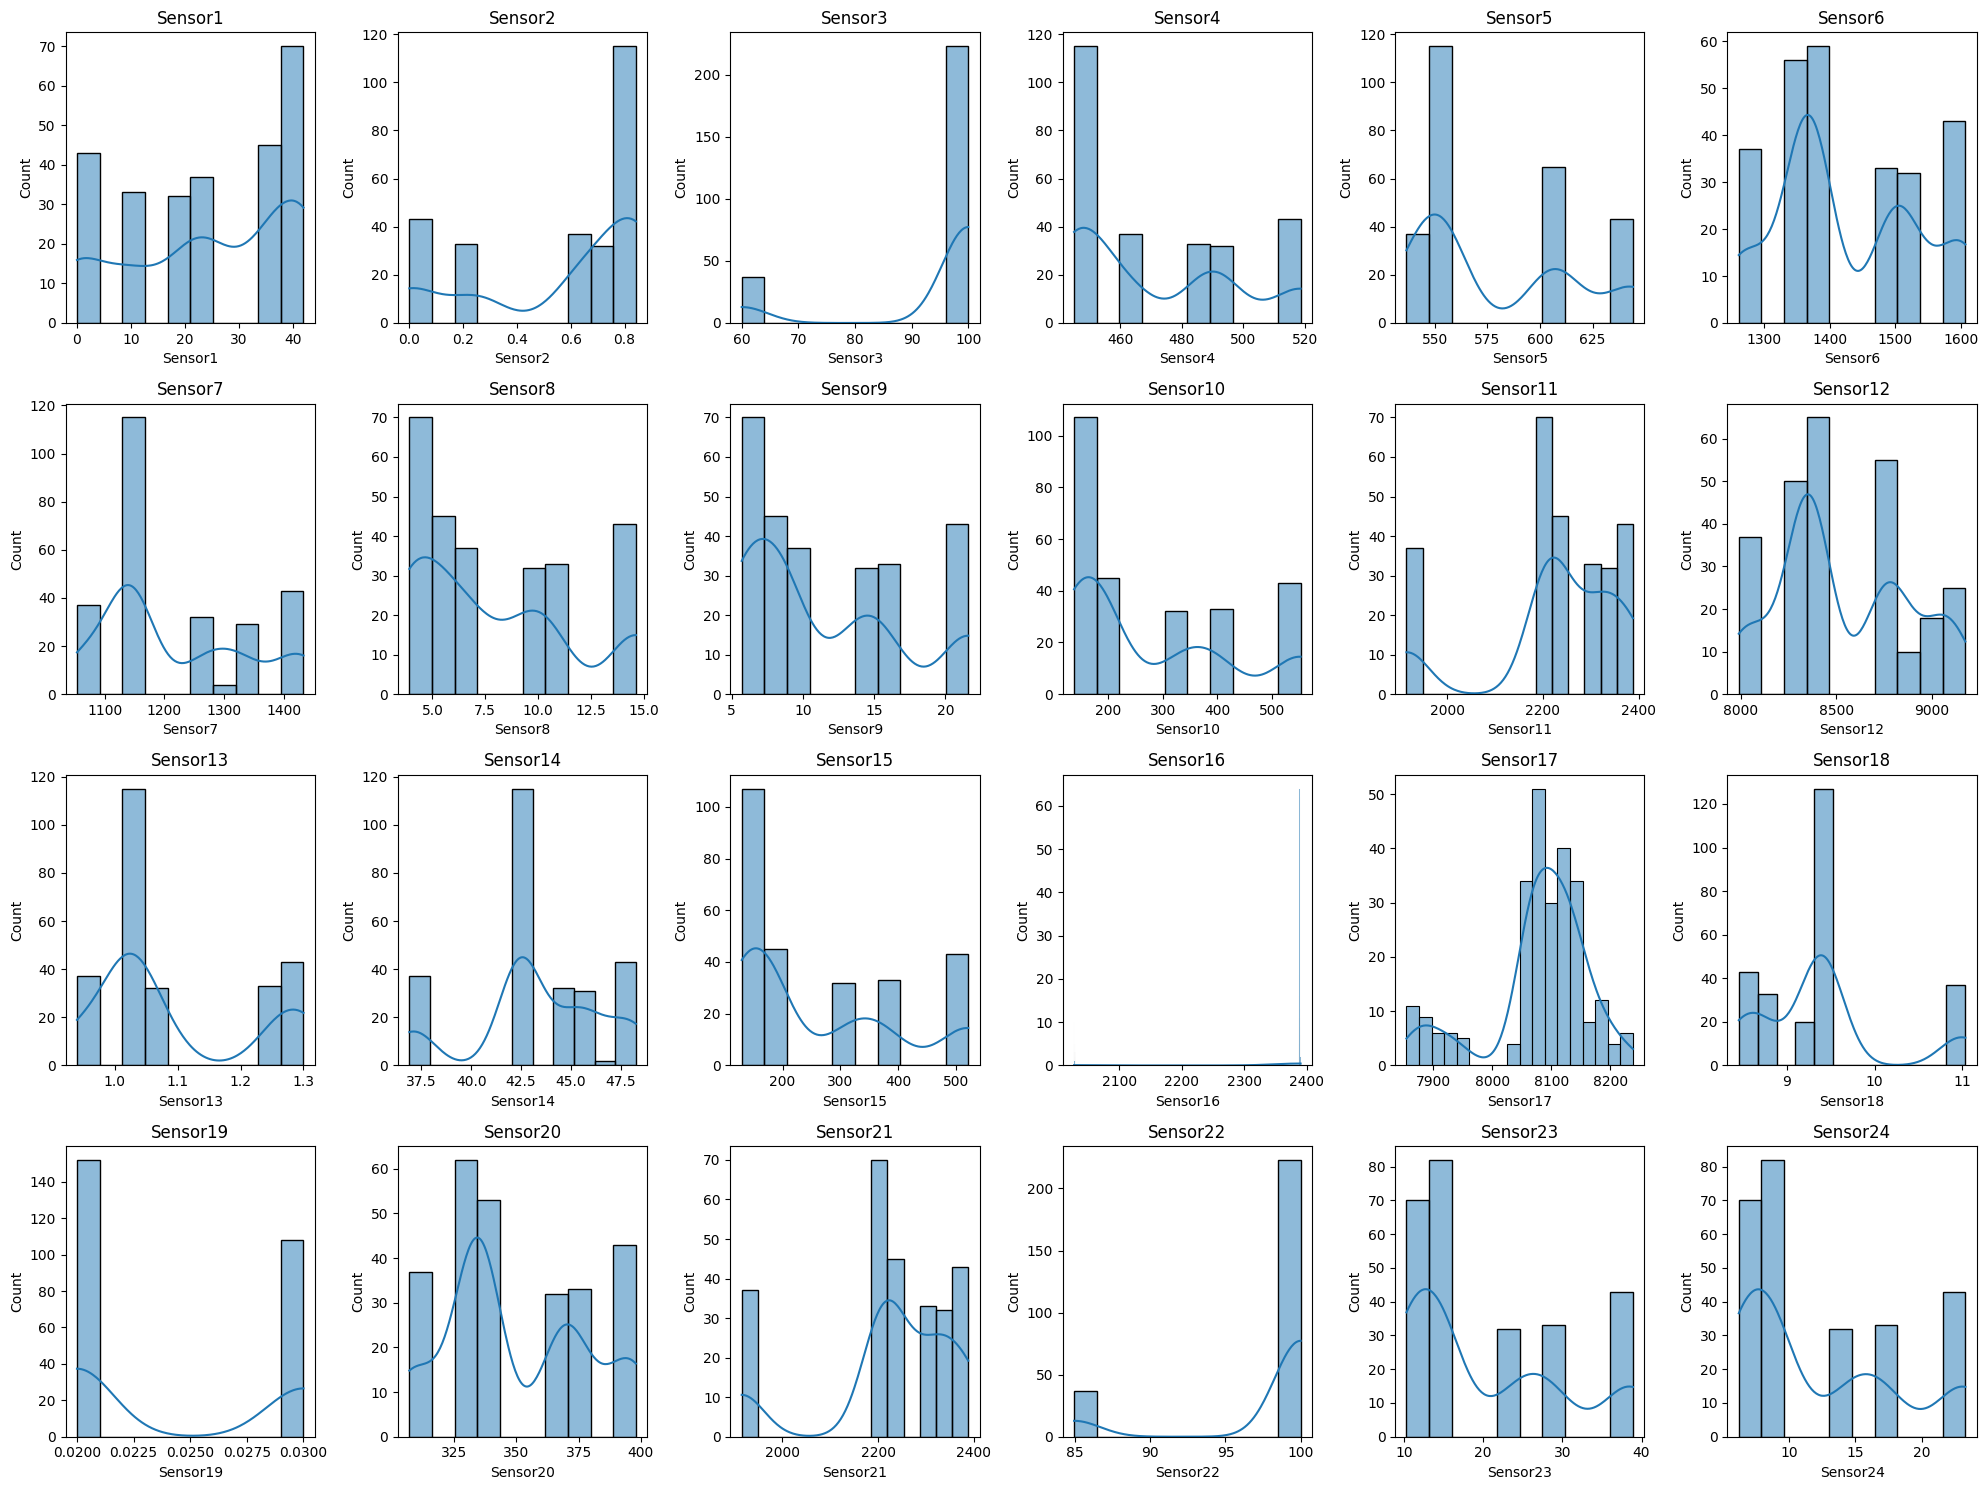

Enter 'c' to continue, 'q' to quit exploring group 10: q


In [22]:
# Group data by Remaining Cycles & explore sensor distributions
remaining_cycles_groups = data.groupby('Remaining Cycles')

# Threshold for selecting groups
threshold = 10 

# Filter groups based on the threshold
selected_groups = [(group_name, group_data) for group_name, group_data in remaining_cycles_groups if len(group_data) >= threshold]

# Explore the selected groups
for group_name, group_data in selected_groups:
    print(f"Group: Remaining Cycles = {group_name}, Size = {len(group_data)}")
    print(group_data.describe())

    plt.figure(figsize=(20, 15))
    for i, col in enumerate(group_data.columns[2:-1]):
        plt.subplot(4, 6, i+1)
        sns.histplot(group_data[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

    user_input = input(f"Enter 'c' to continue, 'q' to quit exploring group {group_name}: ")
    if user_input.lower() == 'q':
        break